In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
select_label0 = pd.read_csv('./Data/5df_6.6w_features_AIC_EN.csv')
select_label0.head(10)

formula  hse_fold0  hse_fold1  hse_fold2  hse_fold3  hse_fold4  \
0  Cs0.47Rb0.53Ca1Cl3   5.809389   5.248012   6.039049   5.751761   5.965189   
1  Cs0.47Rb0.53Sr1Cl3   5.700661   5.061179   5.825304   5.644604   5.909904   
2  Cs0.47Rb0.53Mn1Cl3   2.738756   2.699255   2.715833   2.640517   2.822403   
3  Cs0.47Rb0.53Fe1Cl3   2.821851   2.349560   3.023580   2.866029   0.000000   
4  Cs0.47Rb0.53Pd1Cl3   0.000000   2.958490   0.000000   3.009616   3.122243   
5  Cs0.47Rb0.53Pt1Cl3   0.000000   3.309010   0.502307   3.370877   3.192706   
6  Cs0.47Rb0.53Cd1Cl3   4.818494   4.329827   4.140045   4.472024   4.840196   
7  Cs0.47Rb0.53Hg1Cl3   4.092998   3.656323   3.746147   3.698263   4.206794   
8  Cs0.47Rb0.53Sn1Cl3   3.993833   4.049449   3.729289   4.041748   4.366934   
9  Cs0.47Rb0.53Eu1Cl3   0.000000   0.000000   0.000000   0.412698   1.538603   

   mean_hse   mean_eh  A_Density  B_Density  ...  \
0  5.762680  0.107727     1.6898       1.54  ...   
1  5.628331  0.057384     1.6898       2.64  ...   
2  2.723353  0.013267     1.6898       7.44  ...   
3  2.212204  0.080834     1.6898       7.87  ...   
4  1.818070  0.034107     1.6898      12.00  ...   
5  2.074980  0.119962     1.6898      21.50  ...   
6  4.520117  0.031510     1.6898       8.69  ...   
7  3.880105  0.017129     1.6898      13.50  ...   
8  4.036251  0.007619     1.6898       7.29  ...   
9  0.390260  0.064391     1.6898       5.24  ...   

   A_number of Valence Electrons  X_number of Valence Electrons  B_number  \
0                            1.0                           21.0      20.0   
1                            1.0                           21.0      38.0   
2                            1.0                           21.0      25.0   
3                            1.0                           21.0      26.0   
4                            1.0                           21.0      46.0   
5                            1.0                           21.0      78.0   
6                            1.0                           21.0      48.0   
7                            1.0                           21.0      80.0   
8                            1.0                           21.0      50.0   
9                            1.0                           21.0      63.0   

   A_number of s+p Electrons  B_number of s+p Electrons  \
0                        1.0                        2.0   
1                        1.0                        2.0   
2                        1.0                        2.0   
3                        1.0                        2.0   
4                        1.0                        0.0   
5                        1.0                        1.0   
6                        1.0                        2.0   
7                        1.0                        2.0   
8                        1.0                        4.0   
9                        1.0                        2.0   

   X_number of s+p Electrons  A_number of d Electrons  \
0                       21.0                      0.0   
1                       21.0                      0.0   
2                       21.0                      0.0   
3                       21.0                      0.0   
4                       21.0                      0.0   
5                       21.0                      0.0   
6                       21.0                      0.0   
7                       21.0                      0.0   
8                       21.0                      0.0   
9                       21.0                      0.0   

   X_number of d Electrons  avg ionic char  B_Electronegativity  
0                      0.0        0.172973                 1.00  
1                      0.0        0.174792                 0.95  
2                      0.0        0.152377                 1.55  
3                      0.0        0.142088                 1.83  
4                      0.0        0.130062                 2.20  
5                      0.0        0.12

In [3]:
data = select_label0[['hse_fold0','hse_fold1','hse_fold2','hse_fold3','hse_fold4']]
data.head(10)

hse_fold0  hse_fold1  hse_fold2  hse_fold3  hse_fold4
0   5.809389   5.248012   6.039049   5.751761   5.965189
1   5.700661   5.061179   5.825304   5.644604   5.909904
2   2.738756   2.699255   2.715833   2.640517   2.822403
3   2.821851   2.349560   3.023580   2.866029   0.000000
4   0.000000   2.958490   0.000000   3.009616   3.122243
5   0.000000   3.309010   0.502307   3.370877   3.192706
6   4.818494   4.329827   4.140045   4.472024   4.840196
7   4.092998   3.656323   3.746147   3.698263   4.206794
8   3.993833   4.049449   3.729289   4.041748   4.366934
9   0.000000   0.000000   0.000000   0.412698   1.538603

In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
def exclude_diff_hsedata(data:pd.Series):
    tmp_df = data.copy(deep = True)
    mean_Eg_list = []
    for index,row in tmp_df.iterrows():
        if :
            mean_Eg_list.append(0)
        else:
            try:
                kmeans.fit(np.array(row).reshape(-1,1))
                labels = kmeans.labels_
                res = pd.DataFrame({'value': row, 'label': labels})
                class0 = res[res['label']==0]
                class1 = res[res['label']==1]
                if len(class0) < len(class1):
                    mean_Eg_list.append(class0['value'].mean())
                else:
                    mean_Eg_list.append(class1['value'].mean())
            except:
                pass
    return mean(mean_Eg_list)

In [24]:
def exclude_diff_hsedata(tmp:pd.Series):
    if np.sum(np.array(tmp) == 0) >= 4:
        return 0
    else:
        kmeans.fit(np.array(tmp).reshape(-1,1))
        labels = kmeans.labels_
        res = pd.DataFrame({'value': tmp, 'label': labels})
        class0 = res[res['label']==0]
        class1 = res[res['label']==1]
        if len(class0) > len(class1):
            return class0['value'].mean()
        else:
            return class1['value'].mean()

In [ ]:
# select_label0['mean'] = data.apply(lambda x: exclude_diff_hsedata(x), axis=1)
# select_label0
from time import time
start = time()
select_label0['mean'] = data.iloc[:,:].apply(lambda x: exclude_diff_hsedata(x), axis=1)
end = time()
print(end - start)

In [31]:
select_label0

formula  hse_fold0  hse_fold1  hse_fold2  hse_fold3  \
0      Cs0.47Rb0.53Ca1Cl3   5.809389   5.248012   6.039049   5.751761   
1      Cs0.47Rb0.53Sr1Cl3   5.700661   5.061179   5.825304   5.644604   
2      Cs0.47Rb0.53Mn1Cl3   2.738756   2.699255   2.715833   2.640517   
3      Cs0.47Rb0.53Fe1Cl3   2.821851   2.349560   3.023580   2.866029   
4      Cs0.47Rb0.53Pd1Cl3   0.000000   2.958490   0.000000   3.009616   
...                   ...        ...        ...        ...        ...   
65956   Rb1V0.49Sn0.51Br3   0.000000   0.000000   0.000000   0.000000   
65957   Rb1V0.49Pb0.51Br3   0.000000   0.000000   0.000000   0.000000   
65958   Rb1Eu0.51V0.49Br3   0.000000   0.000000   0.000000   0.000000   
65959   Rb1Tm0.51V0.49Br3   0.000000   0.000000   0.000000   0.000000   
65960   Rb1Yb0.51V0.49Br3   0.000000   0.000000   0.000000   0.000000   

       hse_fold4  mean_hse   mean_eh  A_Density  B_Density  ...  \
0       5.965189  5.762680  0.107727     1.6898     1.5400  ...   
1       5.909904  5.628331  0.057384     1.6898     2.6400  ...   
2       2.822403  2.723353  0.013267     1.6898     7.4400  ...   
3       0.000000  2.212204  0.080834     1.6898     7.8700  ...   
4       3.122243  1.818070  0.034107     1.6898    12.0000  ...   
...          ...       ...       ...        ...        ...  ...   
65956   0.000000  0.000000  0.070500     1.5300     6.7118  ...   
65957   0.000000  0.000000  0.063449     1.5300     8.7569  ...   
65958   0.000000  0.000000  0.064295     1.5300     5.6663  ...   
65959   0.000000  0.000000  0.036594     1.5300     7.7471  ...   
65960   0.000000  0.000000  0.076049     1.5300     6.5486  ...   

       X_number of Valence Electrons  B_number  A_number of s+p Electrons  \
0                               21.0     20.00                        1.0   
1                               21.0     38.00                        1.0   
2                               21.0     25.00                        1.0   
3                               21.0     26.00                        1.0   
4                               21.0     46.00                        1.0   
...                              ...       ...                        ...   
65956                           21.0     36.77                        1.0   
65957                           21.0     53.09                        1.0   
65958                           21.0     43.40                        1.0   
65959                           21.0     46.46                        1.0   
65960                           21.0     46.97                        1.0   

       B_number of s+p Electrons  X_number of s+p Electrons  \
0                           2.00                       21.0   
1                           2.00                       21.0   
2                           2.00                       21.0   
3                           2.00                       21.0   
4                           0.00                       21.0   
...                          ...                        ...   
65956                       3.02                       21.0   
65957                       3.02                       21.0   
65958                       2.00                       21.0   
65959                       2.00                       21.0   
65960                       2.00                       21.0   

       A_number of d Electrons  X_number of d Electrons  avg ionic char  \
0                          0.0                      0.0        0.172973   
1                          0.0                      0.0        0.174792   
2                          0.0                      0.0        0.152377   
3                          0.0                      0.0        0.142088   
4                          0.0                      0.0        0.130062   
...                        ...                      ...             ...   
65956                      0.0                      0.0        0.125254   
65957                      0.0                      0.

In [34]:
select_label0.to_csv('./Data/New_Eg_6.6w.csv',index= False)

In [4]:
select_label0 = pd.read_csv('./Data/New_Eg_6.6w.csv')

In [5]:
from pymatgen.core import Composition

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns

# Splitting data into training and testing
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

config = {
    "mathtext.fontset":'stix',
    "font.family":'serif',
    "font.serif": ['Times New Roman'],
    "font.size": 24,
    'axes.unicode_minus': False 
}
rcParams.update(config)
plt.rcParams['axes.unicode_minus'] = False  
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (8, 6),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.rcParams['figure.dpi'] = 300 

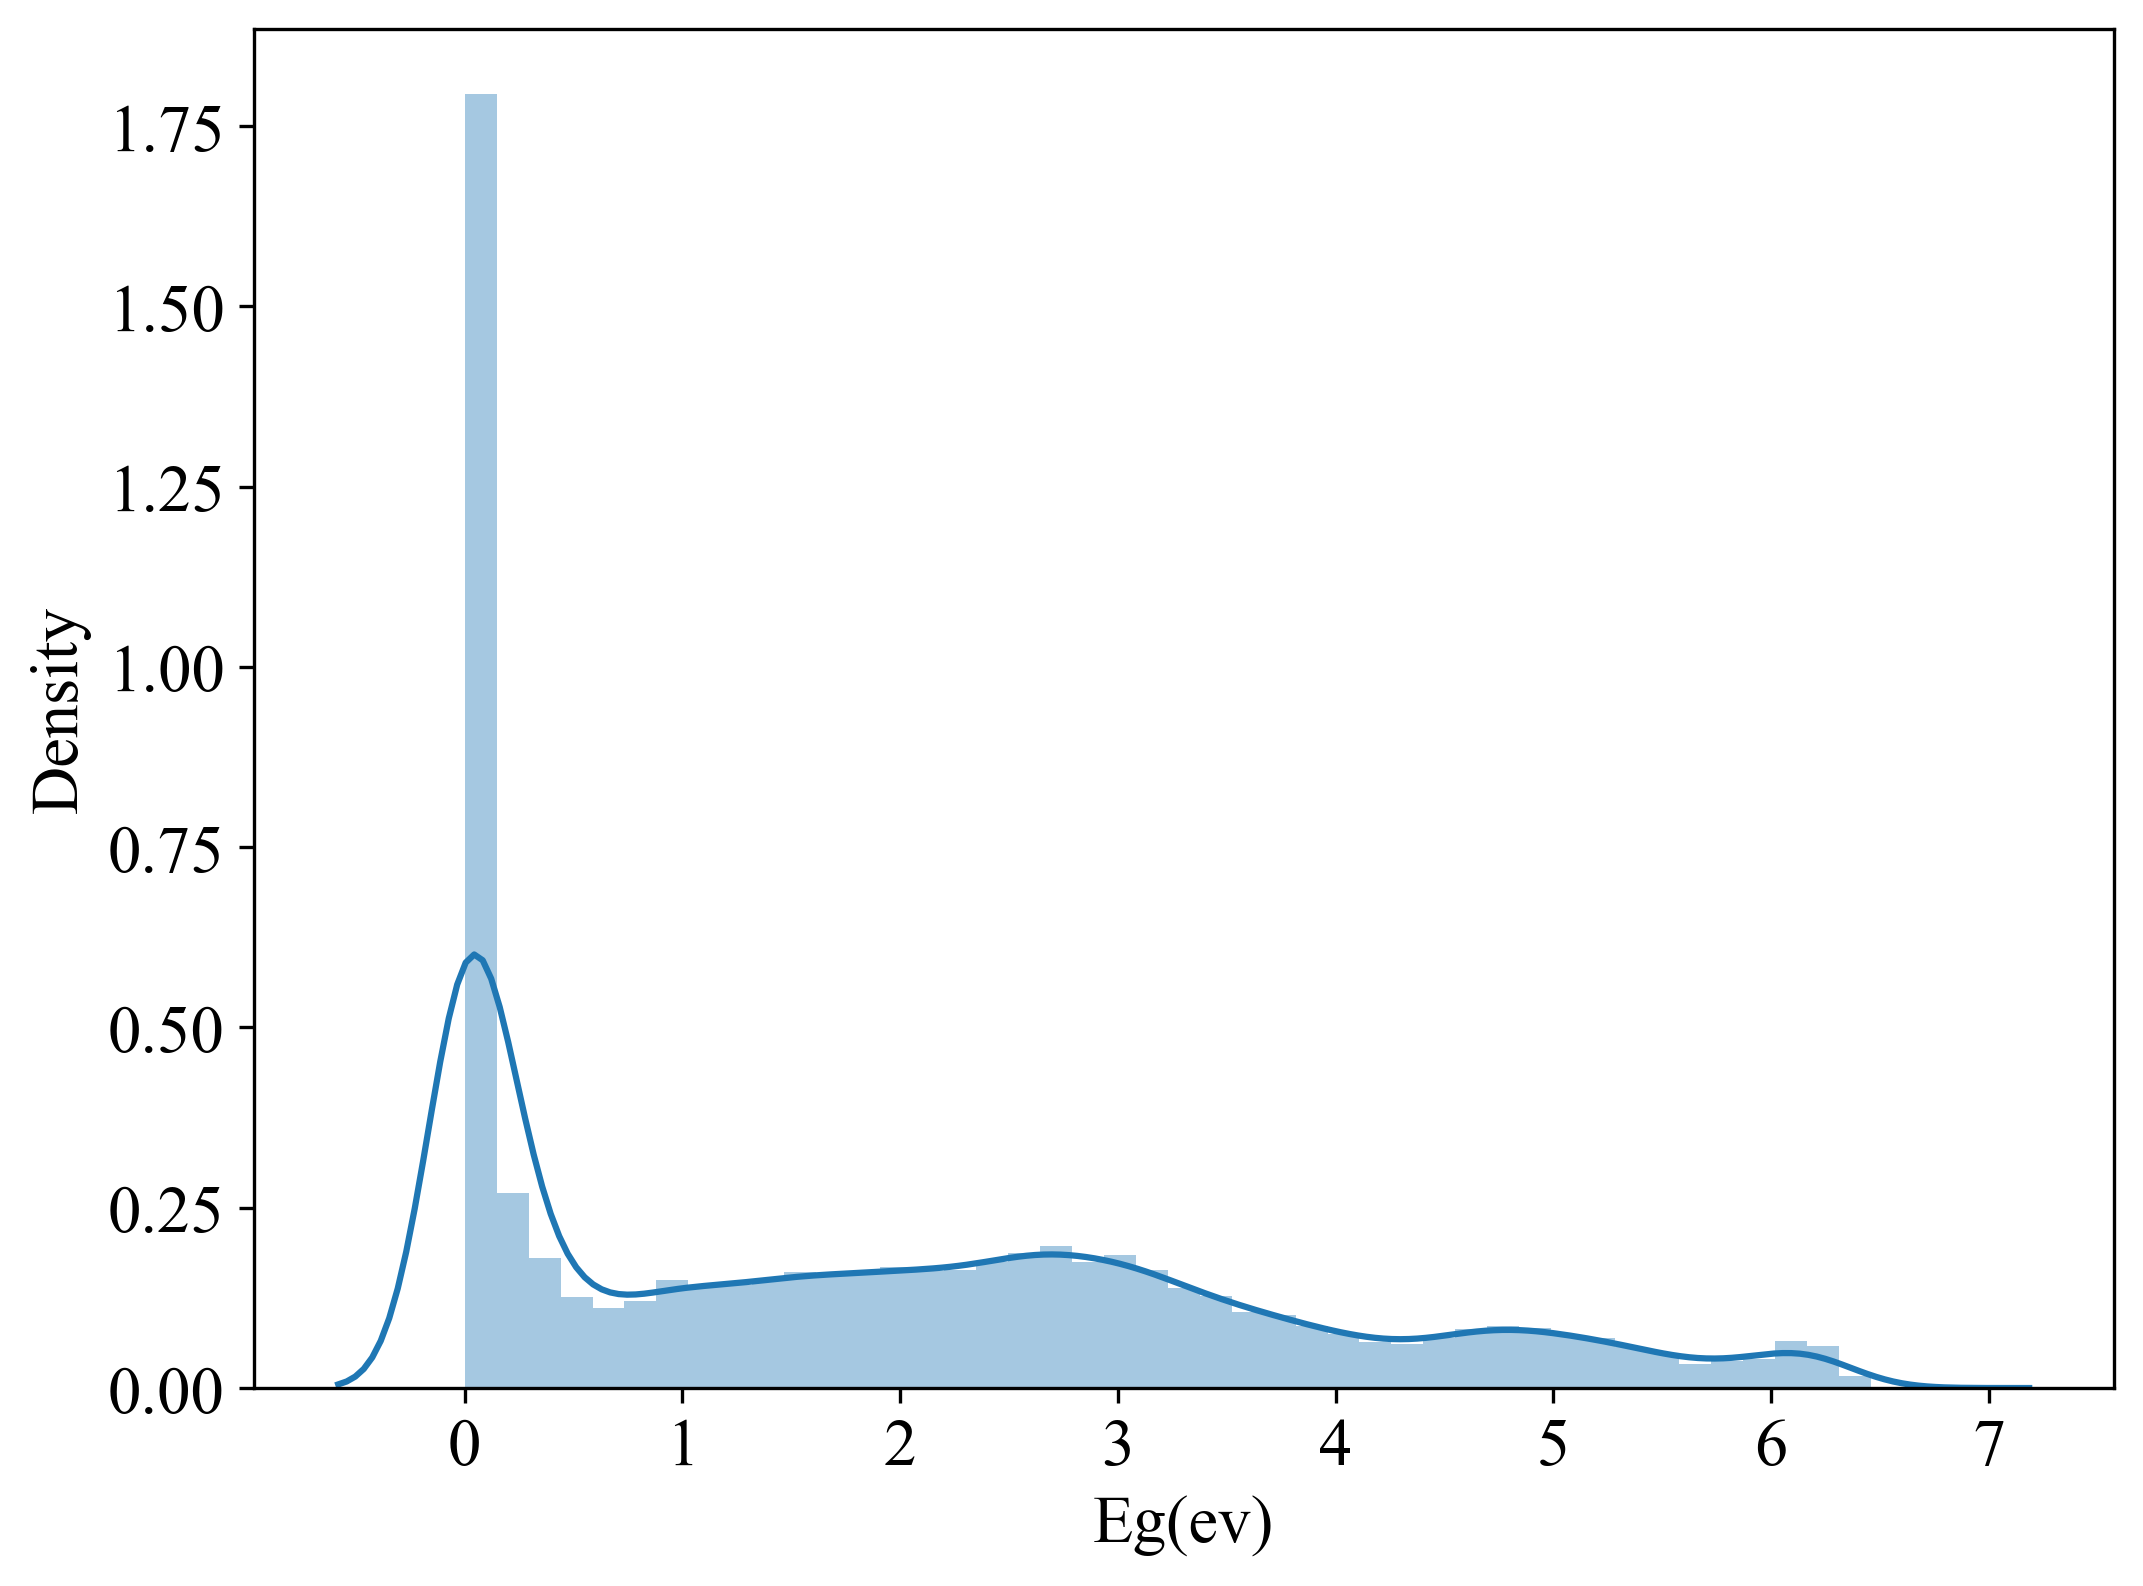

In [6]:
sns.distplot(select_label0['mean'])
plt.xlabel('Eg(ev)')
plt.savefig('./figures/6.6w_Eg.png')

### 认为0带隙过多影响到带隙回归性能，所以先做个分类判断是否为0带隙，然后对非0带隙进行带隙回归预测：

In [7]:
select_label0['Metal_or_not'] = select_label0['mean'].apply(lambda x: 0 if x <= 0.1 else 1)
select_label0

formula  hse_fold0  hse_fold1  hse_fold2  hse_fold3  \
0      Cs0.47Rb0.53Ca1Cl3   5.809389   5.248012   6.039049   5.751761   
1      Cs0.47Rb0.53Sr1Cl3   5.700661   5.061179   5.825304   5.644604   
2      Cs0.47Rb0.53Mn1Cl3   2.738756   2.699255   2.715833   2.640517   
3      Cs0.47Rb0.53Fe1Cl3   2.821851   2.349560   3.023580   2.866029   
4      Cs0.47Rb0.53Pd1Cl3   0.000000   2.958490   0.000000   3.009616   
...                   ...        ...        ...        ...        ...   
65956   Rb1V0.49Sn0.51Br3   0.000000   0.000000   0.000000   0.000000   
65957   Rb1V0.49Pb0.51Br3   0.000000   0.000000   0.000000   0.000000   
65958   Rb1Eu0.51V0.49Br3   0.000000   0.000000   0.000000   0.000000   
65959   Rb1Tm0.51V0.49Br3   0.000000   0.000000   0.000000   0.000000   
65960   Rb1Yb0.51V0.49Br3   0.000000   0.000000   0.000000   0.000000   

       hse_fold4  mean_hse   mean_eh  A_Density  B_Density  X_Density  \
0       5.965189  5.762680  0.107727     1.6898     1.5400    0.00963   
1       5.909904  5.628331  0.057384     1.6898     2.6400    0.00963   
2       2.822403  2.723353  0.013267     1.6898     7.4400    0.00963   
3       0.000000  2.212204  0.080834     1.6898     7.8700    0.00963   
4       3.122243  1.818070  0.034107     1.6898    12.0000    0.00963   
...          ...       ...       ...        ...        ...        ...   
65956   0.000000  0.000000  0.070500     1.5300     6.7118    9.36000   
65957   0.000000  0.000000  0.063449     1.5300     8.7569    9.36000   
65958   0.000000  0.000000  0.064295     1.5300     5.6663    9.36000   
65959   0.000000  0.000000  0.036594     1.5300     7.7471    9.36000   
65960   0.000000  0.000000  0.076049     1.5300     6.5486    9.36000   

       B_dipole Polarizability  A_number of Valence Electrons  \
0                       160.80                            1.0   
1                       197.20                            1.0   
2                        68.00                            1.0   
3                        62.00                            1.0   
4                        26.14                            1.0   
...                        ...                            ...   
65956                    69.66                            1.0   
65957                    66.60                            1.0   
65958                   136.47                            1.0   
65959                   116.07                            1.0   
65960                   113.52                            1.0   

       X_number of Valence Electrons  B_number  A_number of s+p Electrons  \
0                               21.0     20.00                        1.0   
1                               21.0     38.00                        1.0   
2                               21.0     25.00                        1.0   
3                               21.0     26.00                        1.0   
4                               21.0     46.00                        1.0   
...                              ...       ...                        ...   
65956                           21.0     36.77                        1.0   
65957                           21.0     53.09                        1.0   
65958                           21.0     43.40                        1.0   
65959                           21.0     46.46                        1.0   
65960                           21.0     46.97                        1.0   

       B_number of s+p Electrons  X_number of s+p Electrons  \
0                           2.00                       21.0   
1                           2.00                       21.0   
2                           2.00                       21.0   
3                           2.00                       21.0   
4                           0.00                       21.0   
...                          ...                        ...   
65956                       3.02                       21.0   
65957                       3.02                      

# RFC:

In [8]:
from sklearn.model_selection import train_test_split
X = select_label0.iloc[:, 8:-2]
y = select_label0['Metal_or_not']
y.value_counts()

1    49861
0    16100
Name: Metal_or_not, dtype: int64

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=0)
print(X_train.shape,X_test.shape)

(52768, 14) (13193, 14)


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from tqdm import tqdm
data_numbers = []
roc_auc_scores = []
model = RandomForestClassifier(n_jobs=-1,random_state=42)
metal = select_label0[select_label0['Metal_or_not']==0]
non_metal = select_label0[select_label0['Metal_or_not']!=0]
max_n = min(len(metal),len(non_metal))
for n in  tqdm(np.linspace(100,max_n,100)):
    index_sample = metal.sample(int(n/2),random_state=42).index.append(non_metal.sample(int(n/2),random_state=42).index)
    X_sample = X.loc[index_sample]
    y_sample = y.loc[index_sample]
    data_numbers.append(n)
    roc_auc_scores.append(cross_val_score(model,X_sample,y_sample,cv=5,scoring="roc_auc",n_jobs=-1).mean())

100%|██████████| 100/100 [01:00<00:00,  1.65it/s]


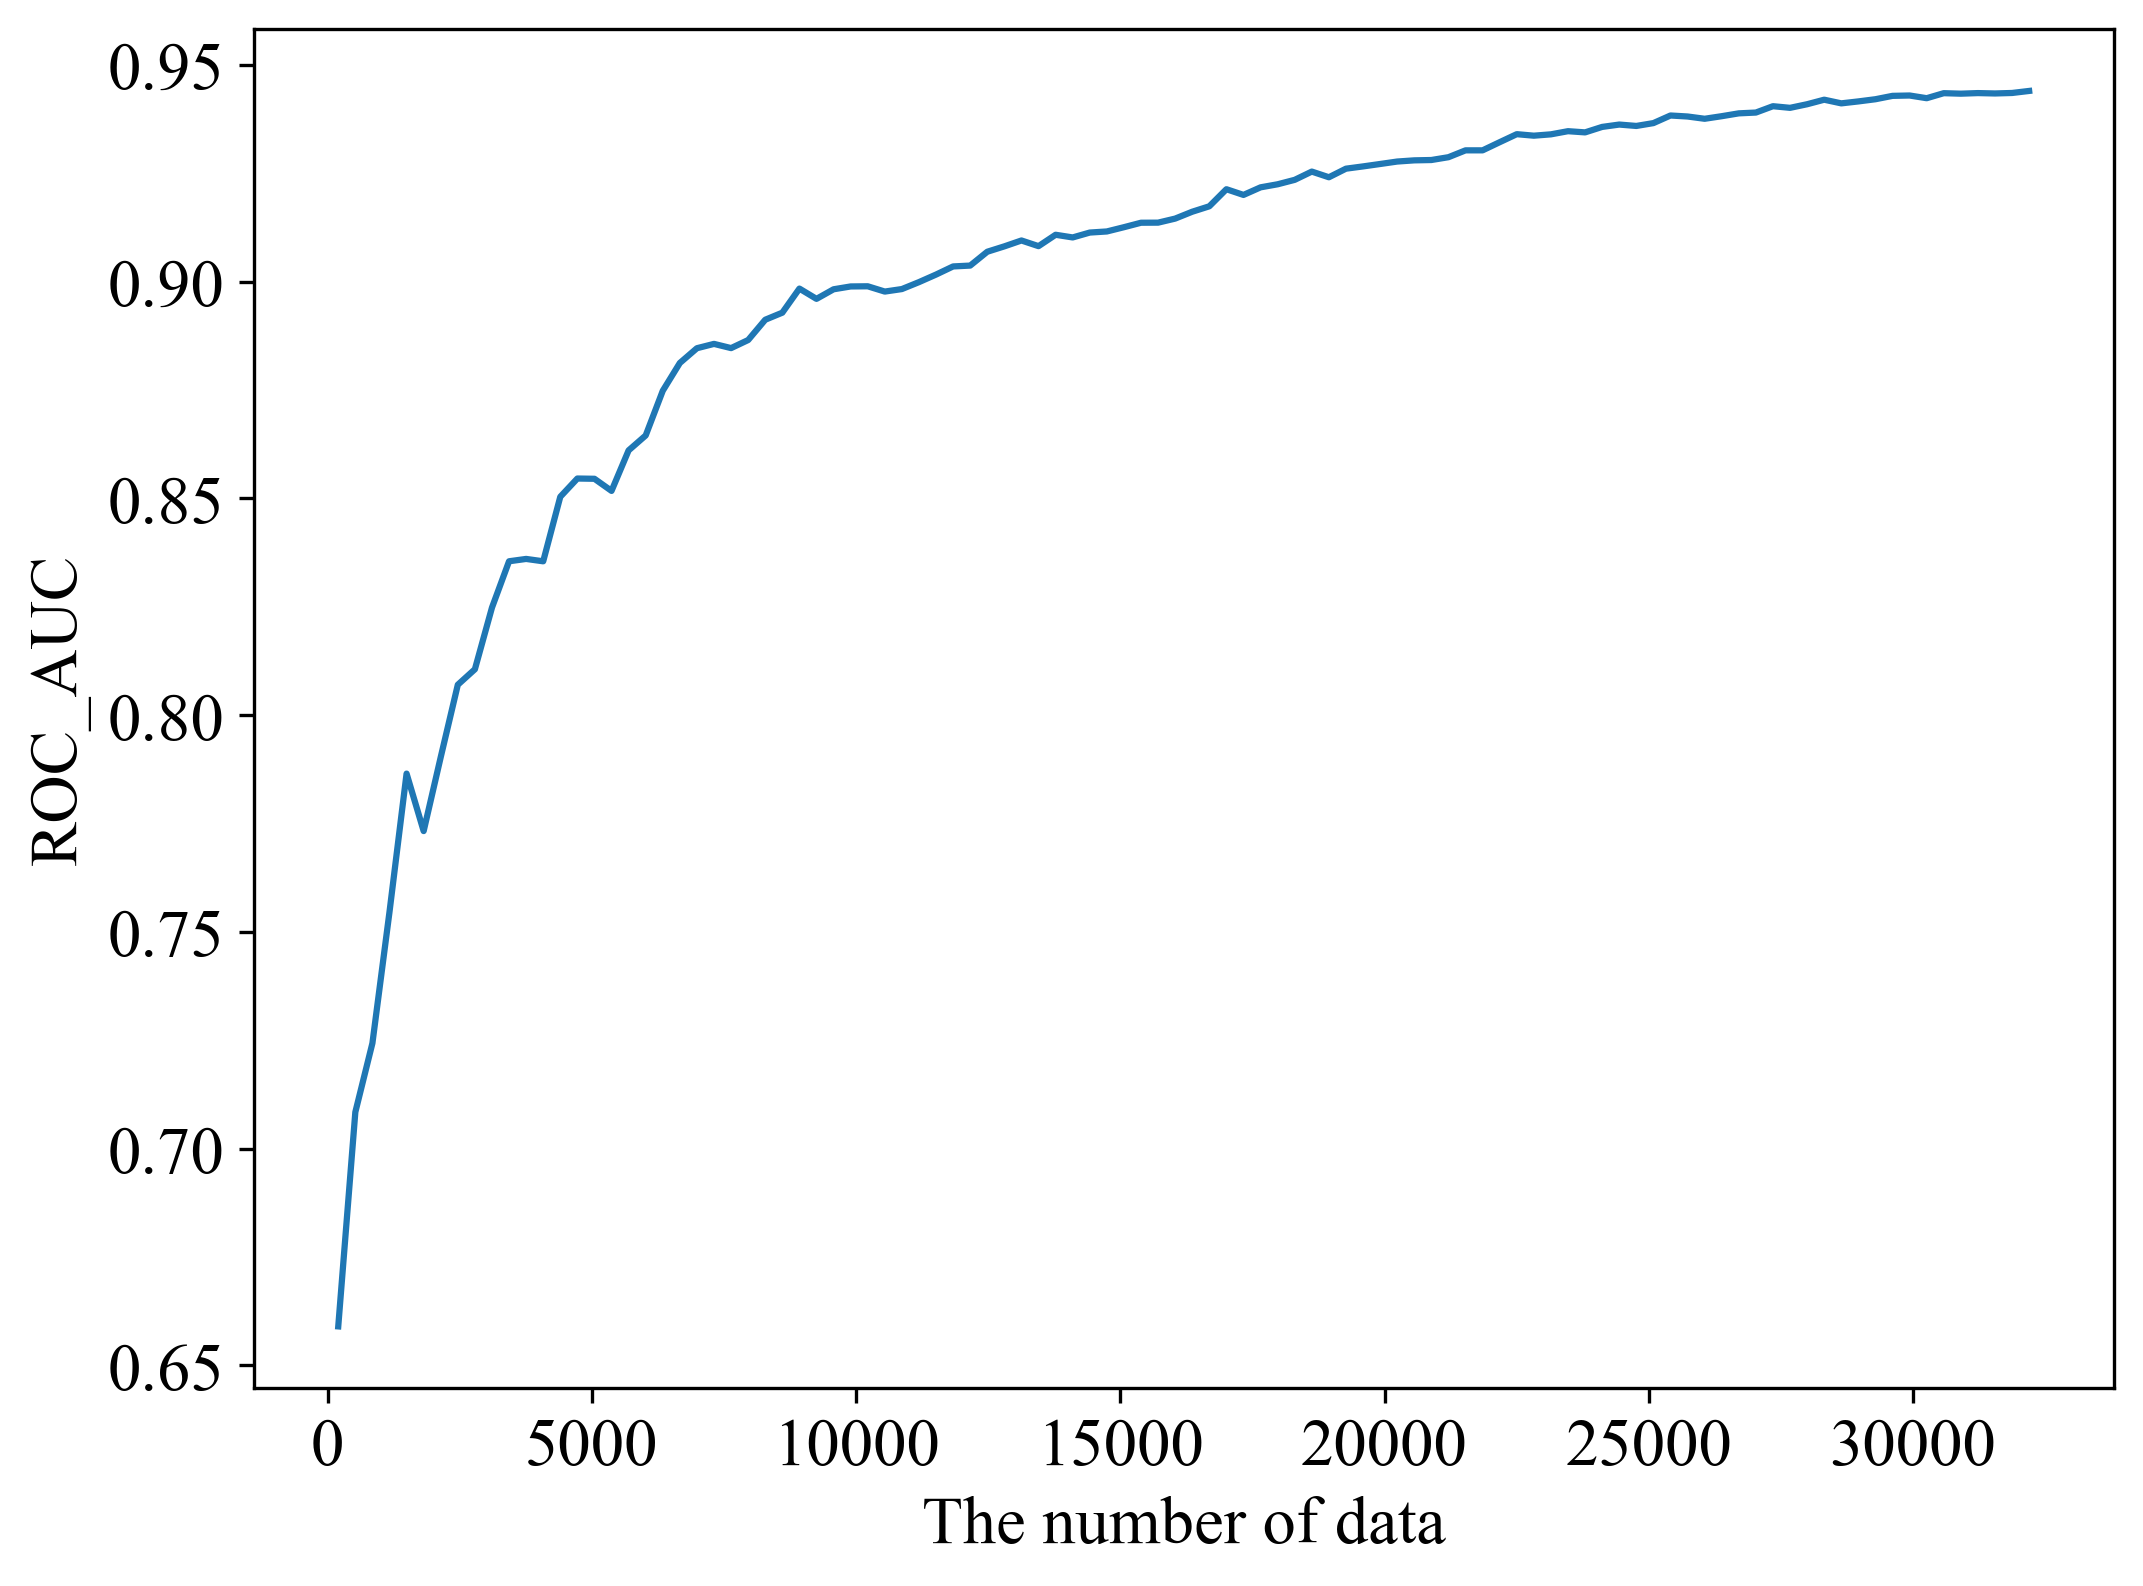

In [11]:
plt.plot([i*2 for i in data_numbers],roc_auc_scores,)
plt.xlabel("The number of data")
plt.ylabel("ROC_AUC")
plt.show()

In [12]:
from sklearn.feature_selection import SelectFromModel
model = RandomForestClassifier(n_jobs=-1,random_state=42)
model.fit(X_train, y_train)
feature_importance=pd.DataFrame()
feature_importance['features'] = X.columns
feature_importance['feature_importances'] = model.feature_importances_
threshold = np.sort(feature_importance['feature_importances'].values)
score = []
n_features = []
cols = []
for i in tqdm(threshold):
    selector = SelectFromModel(model,threshold=i)
    X_embedded = selector.fit_transform(X_train, y_train)
    once = cross_val_score(model,X_embedded,y_train,cv=5,scoring="roc_auc",n_jobs=9).mean()#交叉验证
    score.append(once)
    n_features.append(X_embedded.shape[1])
    cols.append(X.columns[selector.get_support()])
result = pd.DataFrame({"col":cols,"score":score,"n_features":n_features})
result

100%|██████████| 14/14 [00:28<00:00,  2.03s/it]


col     score  n_features
0   Index(['A_Density', 'B_Density', 'X_Density', ...  0.965754          14
1   Index(['A_Density', 'B_Density', 'X_Density', ...  0.965754          14
2   Index(['A_Density', 'B_Density', 'X_Density', ...  0.965754          14
3   Index(['A_Density', 'B_Density', 'X_Density', ...  0.965754          14
4   Index(['A_Density', 'B_Density', 'X_Density', ...  0.965754          14
5   Index(['A_Density', 'B_Density', 'X_Density', ...  0.969553           9
6   Index(['A_Density', 'B_Density', 'X_Density', ...  0.967697           8
7   Index(['A_Density', 'B_Density', 'B_dipole Pol...  0.970194           7
8   Index(['B_Density', 'B_dipole Polarizability',...  0.968486           6
9   Index(['B_Density', 'B_dipole Polarizability',...  0.965384           5
10  Index(['B_Density', 'B_dipole Polarizability',...  0.962410           4
11  Index(['B_Density', 'B_dipole Polarizability',...  0.932605           3
12  Index(['B_Density', 'B_dipole Polarizability']...  0.912719           2
13  Index(['B_dipole Polarizability'], dtype='obje...  0.836100           1

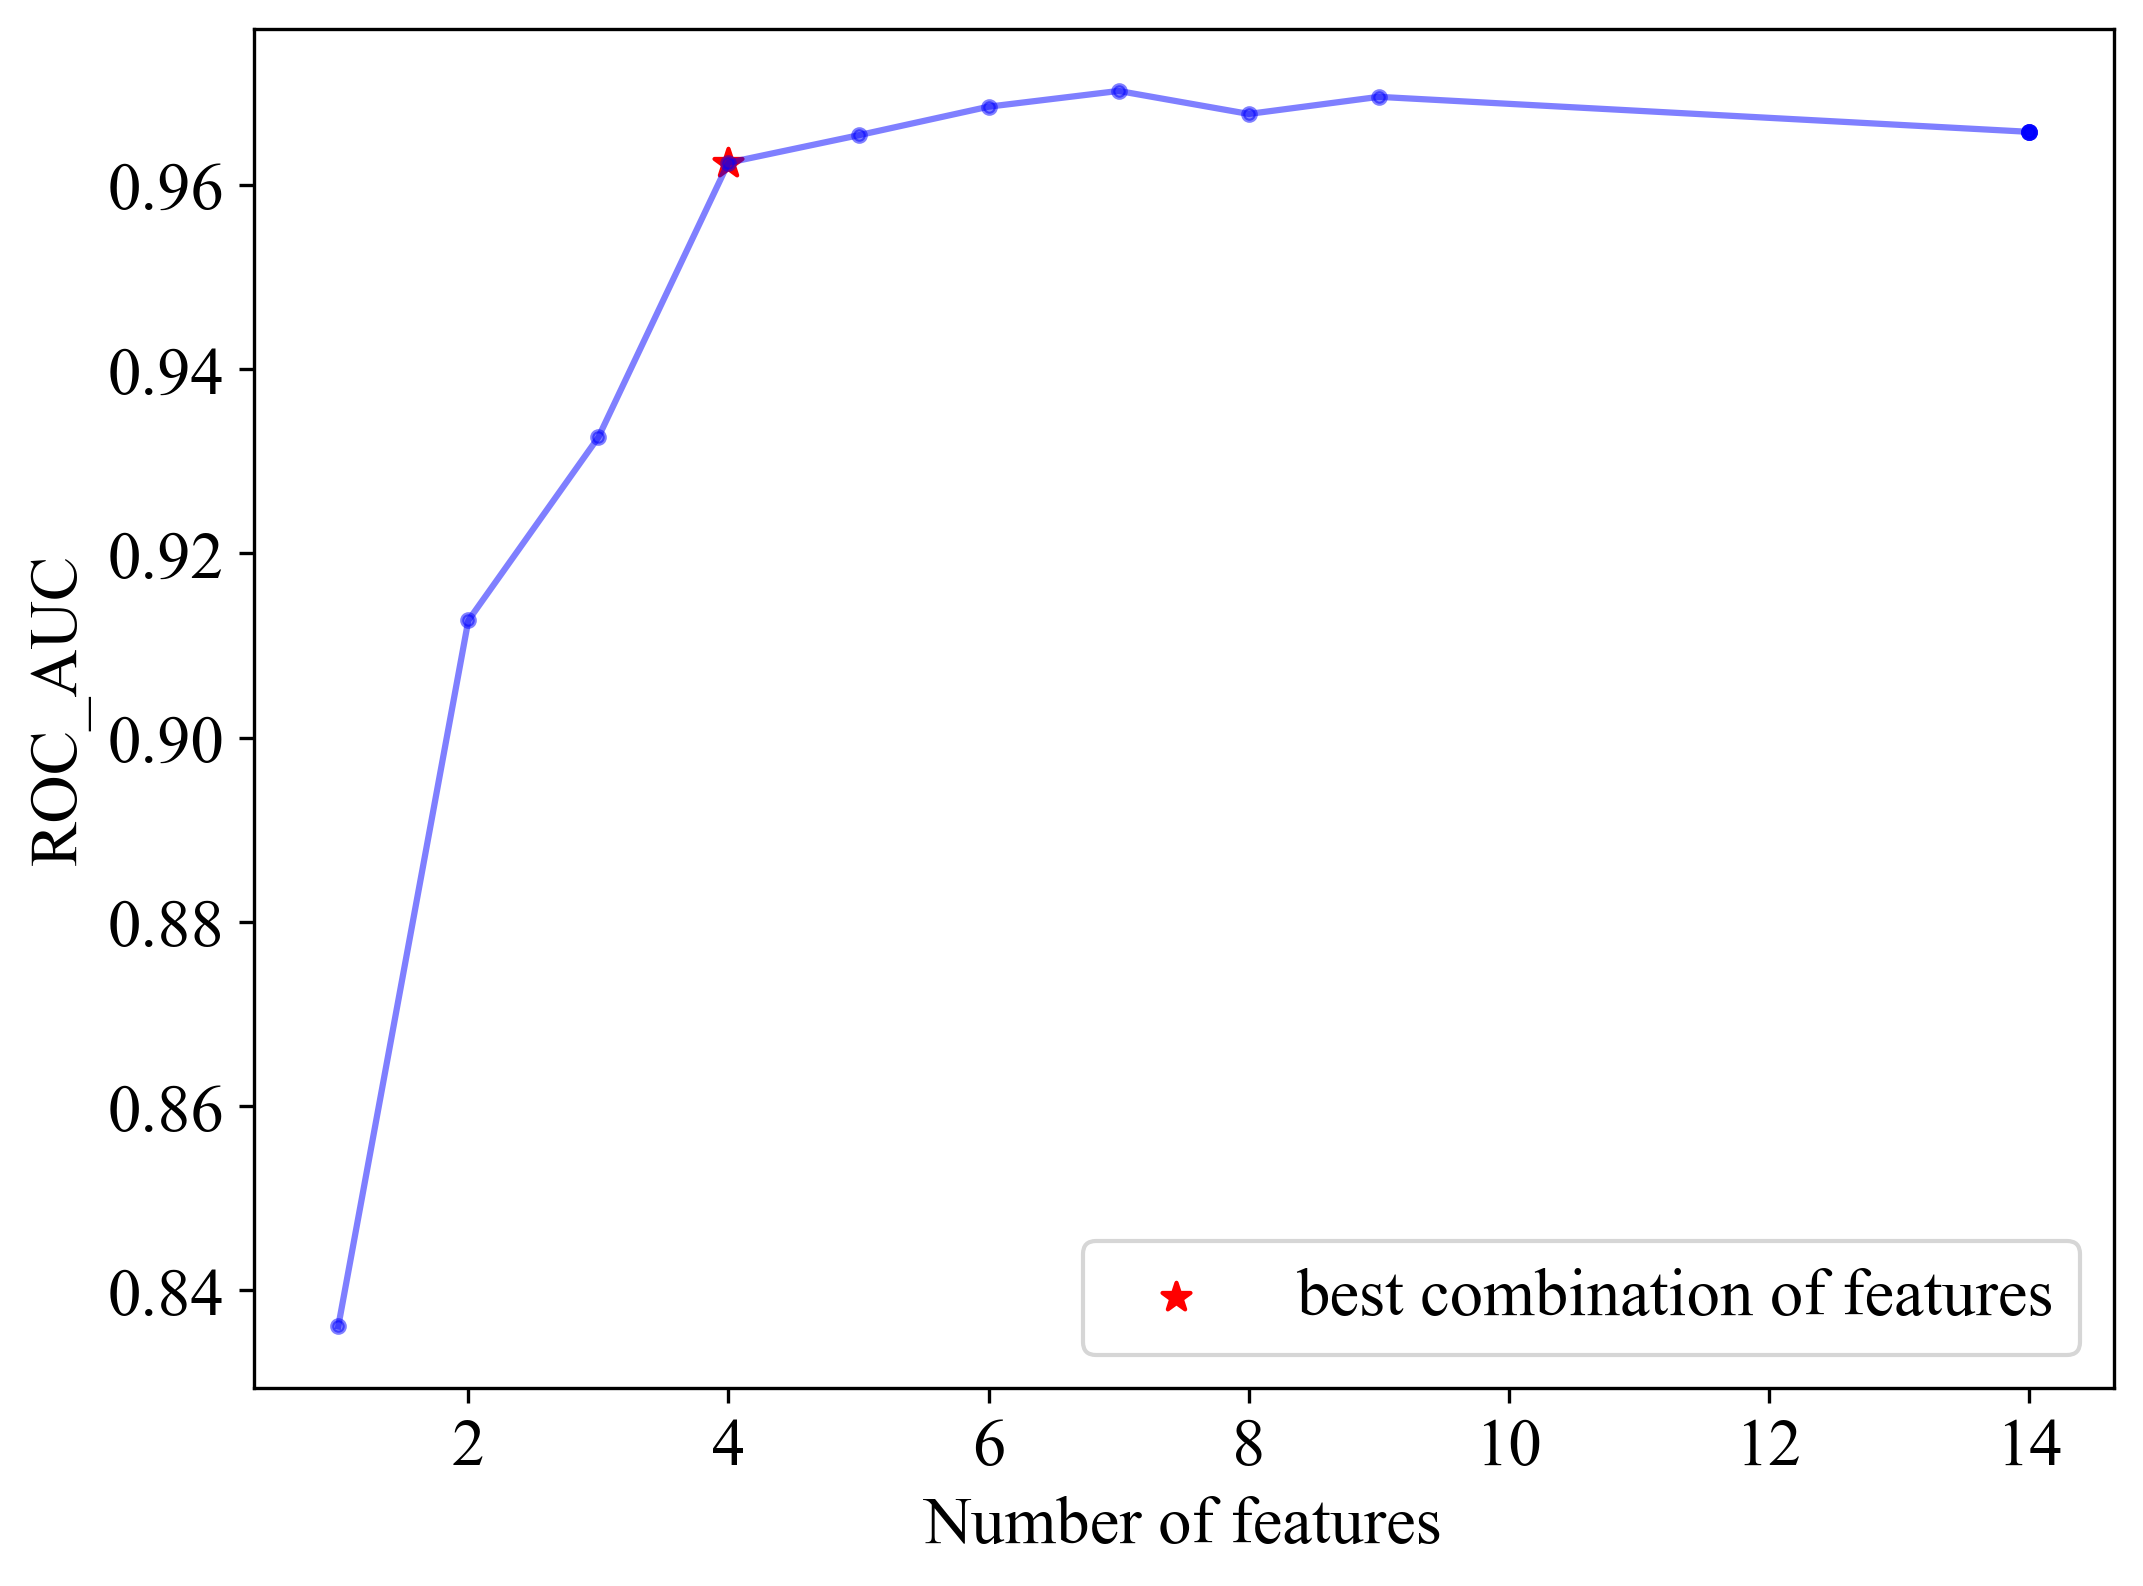

In [13]:
f_fig, f_ax = plt.subplots(figsize=(8, 6))
to_select = result[result['score']>0.96]
to_select = to_select.sort_values(by='n_features',ascending=True)
f_ax.scatter(to_select.iloc[0]['n_features'],to_select.iloc[0]['score'],marker='*',
            s=50,c='r',label='best combination of features')
f_ax.plot(n_features,score, color='b',marker='.',alpha=0.5)
# plt.axhline(y=to_select.iloc[0]['score'],linestyle="--",color='grey')
# plt.axvline(x=to_select.iloc[0]['n_features'],linestyle="--",color='grey')
f_ax.set_xlabel("Number of features"), plt.ylabel("ROC_AUC")
f_ax.legend()
plt.show()

In [14]:
feature_labels = to_select.iloc[0]['col']
X_train = X.loc[X_train.index][feature_labels]
X_test = X.loc[X_test.index][feature_labels]
X_train.shape, X_test.shape

((52768, 4), (13193, 4))

In [15]:
X_test.columns

Index(['B_Density', 'B_dipole Polarizability', 'B_number', 'avg ionic char'], dtype='object')

In [16]:
from sklearn.metrics import accuracy_score
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.92442962176912


In [58]:
data_val = pd.read_csv('./Data/df_28.csv')
data_val = data_val[['formula','target','B_Density', 'B_dipole Polarizability', 'B_number', 'avg ionic char']]
data_val

formula    target  B_Density  B_dipole Polarizability  B_number  \
0   RbFeCl3  0.000000       7.87                    62.00        26   
1   CsTmCl3  0.000000       9.32                   144.00        69   
2   RbPdCl3  0.000000      12.00                    26.14        46   
3   CsPdCl3  0.000000      12.00                    26.14        46   
4   CsSrCl3  6.254735       2.64                   197.20        38   
5   RbEuCl3  1.672559       5.24                   184.00        63   
6   CsCaBr3  5.729195       1.54                   160.80        20   
7   CsEuCl3  1.674355       5.24                   184.00        63   
8   CsYbCl3  6.628890       6.97                   139.00        70   
9   RbPbCl3  2.962986      11.30                    47.00        82   
10   RbGeI3  1.006948       5.32                    40.00        32   
11   CsPbI3  1.903129      11.30                    47.00        82   
12  RbSrCl3  5.914542       2.64                   197.20        38   
13  CsPdBr3  0.890561      12.00                    26.14        46   
14  RbCuBr3  0.592188       8.96                    46.50        29   
15  CsYbBr3  5.564464       6.97                   139.00        70   
16  CsCaCl3  6.765173       1.54                   160.80        20   
17  CsPbBr3  2.478341      11.30                    47.00        82   
18  RbCaBr3  5.295649       1.54                   160.80        20   
19  CsSnCl3  1.937214       7.29                    53.00        50   
20  CsCdBr3  1.854566       8.69                    46.00        48   
21  CsCdCl3  3.052211       8.69                    46.00        48   
22  CsGeBr3  1.168093       5.32                    40.00        32   
23  CsHgBr3  0.000000      13.50                    33.91        80   
24  CsHgCl3  0.532680      13.50                    33.91        80   
25  CsPbCl3  2.864395      11.30                    47.00        82   
26  CsSnBr3  1.002063       7.29                    53.00        50   
27   CsSnI3  0.763360       7.29                    53.00        50   

    avg ionic char  
0         0.141365  
1         0.164389  
2         0.129320  
3         0.130894  
4         0.175397  
5         0.164963  
6         0.157534  
7         0.166251  
8         0.169945  
9         0.125838  
10        0.092479  
11        0.091052  
12        0.174251  
13        0.114826  
14        0.121314  
15        0.153442  
16        0.173593  
17        0.112251  
18        0.156203  
19        0.138404  
20        0.130177  
21        0.147952  
22        0.119691  
23        0.119979  
24        0.137073  
25        0.127409  
26        0.121160  
27        0.095366

In [60]:
data_val['is_metal'] = data_val['target'].apply(lambda x: 0 if x <= 0.1 else 1)
data_val

formula    target  B_Density  B_dipole Polarizability  B_number  \
0   RbFeCl3  0.000000       7.87                    62.00        26   
1   CsTmCl3  0.000000       9.32                   144.00        69   
2   RbPdCl3  0.000000      12.00                    26.14        46   
3   CsPdCl3  0.000000      12.00                    26.14        46   
4   CsSrCl3  6.254735       2.64                   197.20        38   
5   RbEuCl3  1.672559       5.24                   184.00        63   
6   CsCaBr3  5.729195       1.54                   160.80        20   
7   CsEuCl3  1.674355       5.24                   184.00        63   
8   CsYbCl3  6.628890       6.97                   139.00        70   
9   RbPbCl3  2.962986      11.30                    47.00        82   
10   RbGeI3  1.006948       5.32                    40.00        32   
11   CsPbI3  1.903129      11.30                    47.00        82   
12  RbSrCl3  5.914542       2.64                   197.20        38   
13  CsPdBr3  0.890561      12.00                    26.14        46   
14  RbCuBr3  0.592188       8.96                    46.50        29   
15  CsYbBr3  5.564464       6.97                   139.00        70   
16  CsCaCl3  6.765173       1.54                   160.80        20   
17  CsPbBr3  2.478341      11.30                    47.00        82   
18  RbCaBr3  5.295649       1.54                   160.80        20   
19  CsSnCl3  1.937214       7.29                    53.00        50   
20  CsCdBr3  1.854566       8.69                    46.00        48   
21  CsCdCl3  3.052211       8.69                    46.00        48   
22  CsGeBr3  1.168093       5.32                    40.00        32   
23  CsHgBr3  0.000000      13.50                    33.91        80   
24  CsHgCl3  0.532680      13.50                    33.91        80   
25  CsPbCl3  2.864395      11.30                    47.00        82   
26  CsSnBr3  1.002063       7.29                    53.00        50   
27   CsSnI3  0.763360       7.29                    53.00        50   

    avg ionic char  is_metal  
0         0.141365         0  
1         0.164389         0  
2         0.129320         0  
3         0.130894         0  
4         0.175397         1  
5         0.164963         1  
6         0.157534         1  
7         0.166251         1  
8         0.169945         1  
9         0.125838         1  
10        0.092479         1  
11        0.091052         1  
12        0.174251         1  
13        0.114826         1  
14        0.121314         1  
15        0.153442         1  
16        0.173593         1  
17        0.112251         1  
18        0.156203         1  
19        0.138404         1  
20        0.130177         1  
21        0.147952         1  
22        0.119691         1  
23        0.119979         0  
24        0.137073         1  
25        0.127409         1  
26        0.121160         1  
27        0.095366         1

In [61]:
X_val = data_val.iloc[:, 2:-1]
y_val = data_val['is_metal']
print(X_val.shape)
print(y_val.shape)

(28, 4)
(28,)


In [62]:
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8571428571428571


In [63]:
formula = data_val['formula']
data_dict = {'formula': formula, 'y_val': y_val, 'y_pred': y_pred}
df_c = pd.DataFrame(data_dict)
df_c

formula  y_val  y_pred
0   RbFeCl3      0       0
1   CsTmCl3      0       0
2   RbPdCl3      0       0
3   CsPdCl3      0       0
4   CsSrCl3      1       1
5   RbEuCl3      1       1
6   CsCaBr3      1       1
7   CsEuCl3      1       1
8   CsYbCl3      1       0
9   RbPbCl3      1       1
10   RbGeI3      1       1
11   CsPbI3      1       1
12  RbSrCl3      1       1
13  CsPdBr3      1       0
14  RbCuBr3      1       1
15  CsYbBr3      1       0
16  CsCaCl3      1       1
17  CsPbBr3      1       1
18  RbCaBr3      1       1
19  CsSnCl3      1       1
20  CsCdBr3      1       1
21  CsCdCl3      1       1
22  CsGeBr3      1       1
23  CsHgBr3      0       0
24  CsHgCl3      1       0
25  CsPbCl3      1       1
26  CsSnBr3      1       1
27   CsSnI3      1       1

In [66]:
df_ceg = df_c[df_c['y_pred']==1].reset_index(drop=True)
df_ceg

formula  y_val  y_pred
0   CsSrCl3      1       1
1   RbEuCl3      1       1
2   CsCaBr3      1       1
3   CsEuCl3      1       1
4   RbPbCl3      1       1
5    RbGeI3      1       1
6    CsPbI3      1       1
7   RbSrCl3      1       1
8   RbCuBr3      1       1
9   CsCaCl3      1       1
10  CsPbBr3      1       1
11  RbCaBr3      1       1
12  CsSnCl3      1       1
13  CsCdBr3      1       1
14  CsCdCl3      1       1
15  CsGeBr3      1       1
16  CsPbCl3      1       1
17  CsSnBr3      1       1
18   CsSnI3      1       1

# 下面训练RFR回归：

In [17]:
R_Eg = select_label0[select_label0['Metal_or_not'] != 0].reset_index(drop=True)
R_Eg

formula  hse_fold0  hse_fold1  hse_fold2  hse_fold3  \
0      Cs0.47Rb0.53Ca1Cl3   5.809389   5.248012   6.039049   5.751761   
1      Cs0.47Rb0.53Sr1Cl3   5.700661   5.061179   5.825304   5.644604   
2      Cs0.47Rb0.53Mn1Cl3   2.738756   2.699255   2.715833   2.640517   
3      Cs0.47Rb0.53Fe1Cl3   2.821851   2.349560   3.023580   2.866029   
4      Cs0.47Rb0.53Pd1Cl3   0.000000   2.958490   0.000000   3.009616   
...                   ...        ...        ...        ...        ...   
49856  Rb1Yb0.49Zn0.51Br3   4.006095   3.842813   4.002011   3.841367   
49857  Rb1Yb0.49Cd0.51Br3   3.893540   3.384940   2.059169   3.612357   
49858  Rb1Yb0.49Ge0.51Br3   3.376031   3.720644   3.780582   3.486729   
49859  Rb1Yb0.49Sn0.51Br3   3.120219   3.471664   3.428249   3.293875   
49860  Rb1Yb0.49Tm0.51Br3   4.121129   4.654360   4.775460   4.858789   

       hse_fold4  mean_hse   mean_eh  A_Density  B_Density  X_Density  \
0       5.965189  5.762680  0.107727     1.6898     1.5400    0.00963   
1       5.909904  5.628331  0.057384     1.6898     2.6400    0.00963   
2       2.822403  2.723353  0.013267     1.6898     7.4400    0.00963   
3       0.000000  2.212204  0.080834     1.6898     7.8700    0.00963   
4       3.122243  1.818070  0.034107     1.6898    12.0000    0.00963   
...          ...       ...       ...        ...        ...        ...   
49856   4.344862  4.007430  0.056400     1.5300     7.0516    9.36000   
49857   4.300837  3.450169  0.055445     1.5300     7.8472    9.36000   
49858   3.735521  3.619901  0.088085     1.5300     6.1285    9.36000   
49859   3.088541  3.280510  0.054852     1.5300     7.1332    9.36000   
49860   4.711279  4.624204  0.040421     1.5300     8.1685    9.36000   

       B_dipole Polarizability  A_number of Valence Electrons  \
0                     160.8000                            1.0   
1                     197.2000                            1.0   
2                      68.0000                            1.0   
3                      62.0000                            1.0   
4                      26.1400                            1.0   
...                        ...                            ...   
49856                  87.8317                            1.0   
49857                  91.5700                            1.0   
49858                  88.5100                            1.0   
49859                  95.1400                            1.0   
49860                 141.5500                            1.0   

       X_number of Valence Electrons  B_number  A_number of s+p Electrons  \
0                               21.0     20.00                        1.0   
1                               21.0     38.00                        1.0   
2                               21.0     25.00                        1.0   
3                               21.0     26.00                        1.0   
4                               21.0     46.00                        1.0   
...                              ...       ...                        ...   
49856                           21.0     49.60                        1.0   
49857                           21.0     58.78                        1.0   
49858                           21.0     50.62                        1.0   
49859                           21.0     59.80                        1.0   
49860                           21.0     69.49                        1.0   

       B_number of s+p Electrons  X_number of s+p Electrons  \
0                           2.00                       21.0   
1                           2.00                       21.0   
2                           2.00                       21.0   
3                           2.00                       21.0   
4                           0.00                       21.0   
...                          ...                        ...   
49856                       2.00                       21.0   
49857                       2.00                      

In [18]:
from sklearn.model_selection import train_test_split
X = R_Eg.iloc[:, 8:-2]
y=R_Eg['mean']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=0)
print(X_train.shape,X_test.shape)

(39888, 14) (9973, 14)


In [19]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from tqdm import tqdm
RFR = RandomForestRegressor(n_jobs=-1,random_state=42)
RFR.fit(X_train, y_train)
feature_importance=pd.DataFrame()
feature_importance['features'] = X.columns
feature_importance['feature_importances'] = RFR.feature_importances_
threshold = np.sort(feature_importance['feature_importances'].values)
score = []
n_features = []
cols = []
for i in tqdm(threshold):
    selector = SelectFromModel(RFR,threshold=i)
    X_embedded = selector.fit_transform(X_train, y_train)
    once = cross_val_score(RFR,X_embedded,y_train,cv=5,scoring="r2",n_jobs=-1).mean()#交叉验证
    score.append(once)
    n_features.append(X_embedded.shape[1])
    cols.append(X.columns[selector.get_support()])
result = pd.DataFrame({"col":cols,"score":score,"n_features":n_features})
result

100%|██████████| 14/14 [00:54<00:00,  3.87s/it]


col     score  n_features
0   Index(['A_Density', 'B_Density', 'X_Density', ...  0.857000          14
1   Index(['A_Density', 'B_Density', 'X_Density', ...  0.857000          14
2   Index(['A_Density', 'B_Density', 'X_Density', ...  0.857000          14
3   Index(['A_Density', 'B_Density', 'X_Density', ...  0.857000          14
4   Index(['A_Density', 'B_Density', 'X_Density', ...  0.857000          14
5   Index(['A_Density', 'B_Density', 'X_Density', ...  0.857097           9
6   Index(['A_Density', 'B_Density', 'X_Density', ...  0.856891           8
7   Index(['A_Density', 'B_Density', 'B_dipole Pol...  0.858435           7
8   Index(['B_Density', 'B_dipole Polarizability',...  0.857240           6
9   Index(['B_Density', 'B_dipole Polarizability',...  0.847397           5
10  Index(['B_Density', 'B_dipole Polarizability',...  0.833759           4
11  Index(['B_Density', 'B_dipole Polarizability',...  0.666968           3
12   Index(['B_Density', 'B_number'], dtype='object')  0.564866           2
13               Index(['B_Density'], dtype='object')  0.410727           1

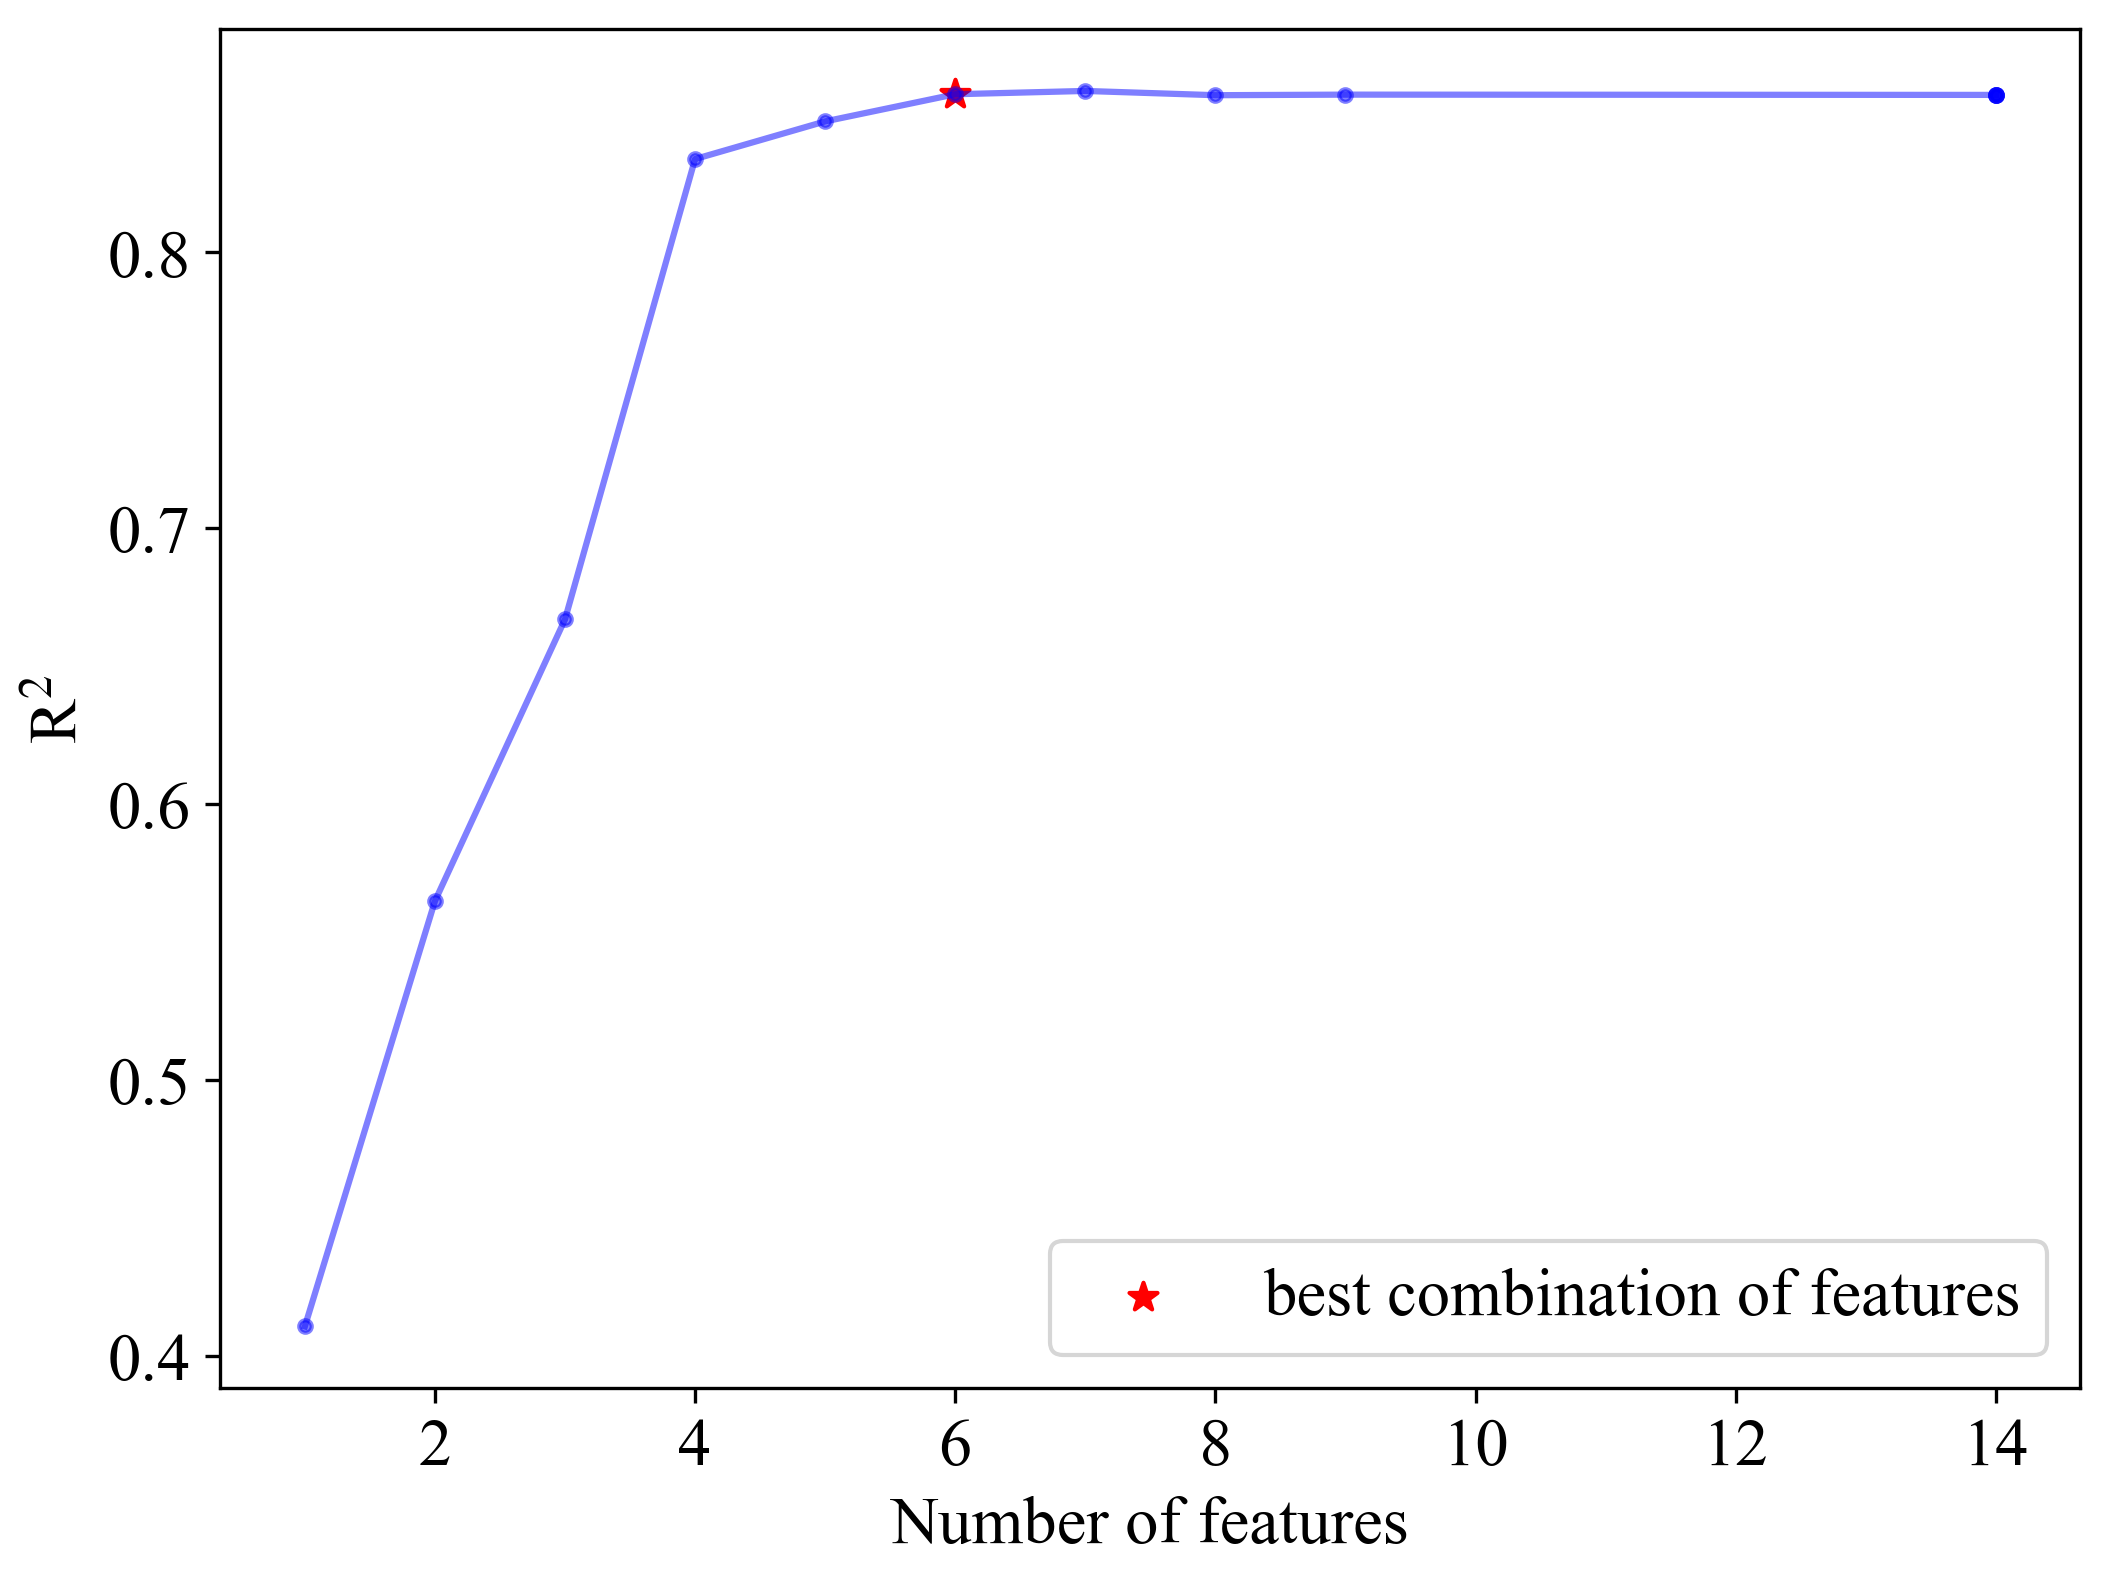

In [22]:
f_fig,f_ax = plt.subplots(figsize=(8, 6))
to_select = result[result['score']>0.85]
to_select = to_select.sort_values(by='n_features',ascending=True)
f_ax.scatter(to_select.iloc[0]['n_features'],to_select.iloc[0]['score'],marker='*',
            s=50,c='r',label='best combination of features')
f_ax.plot(n_features,score, color='b',marker='.',alpha=0.5)

f_ax.set_xlabel("Number of features"), plt.ylabel("R$^2$")
f_ax.legend()
plt.show()

In [72]:
to_select = result.sort_values(by='score',ascending=False)
feature_labels = to_select[to_select['n_features']==6]['col'].values[0]
X_train = X_train[feature_labels]
X_test = X_test[feature_labels]
X_train.shape, X_test.shape

((39888, 6), (9973, 6))

In [73]:
print(feature_labels)

Index(['B_Density', 'B_dipole Polarizability', 'B_number',
       'B_number of s+p Electrons', 'avg ionic char', 'B_Electronegativity'],
      dtype='object')


In [74]:
RFR.fit(X_train,y_train)
y_pred = RFR.predict(X_test)

In [75]:
from sklearn.metrics import *
from math import sqrt
print(f'r2:{r2_score(y_test,y_pred)}')
print(f'mae:{mean_absolute_error(y_test,y_pred)}')
print(f'rmse: {sqrt(mean_squared_error(y_test, y_pred))}')

r2:0.8756553809221899
mae:0.35223622040802244
rmse: 0.5726496720454396


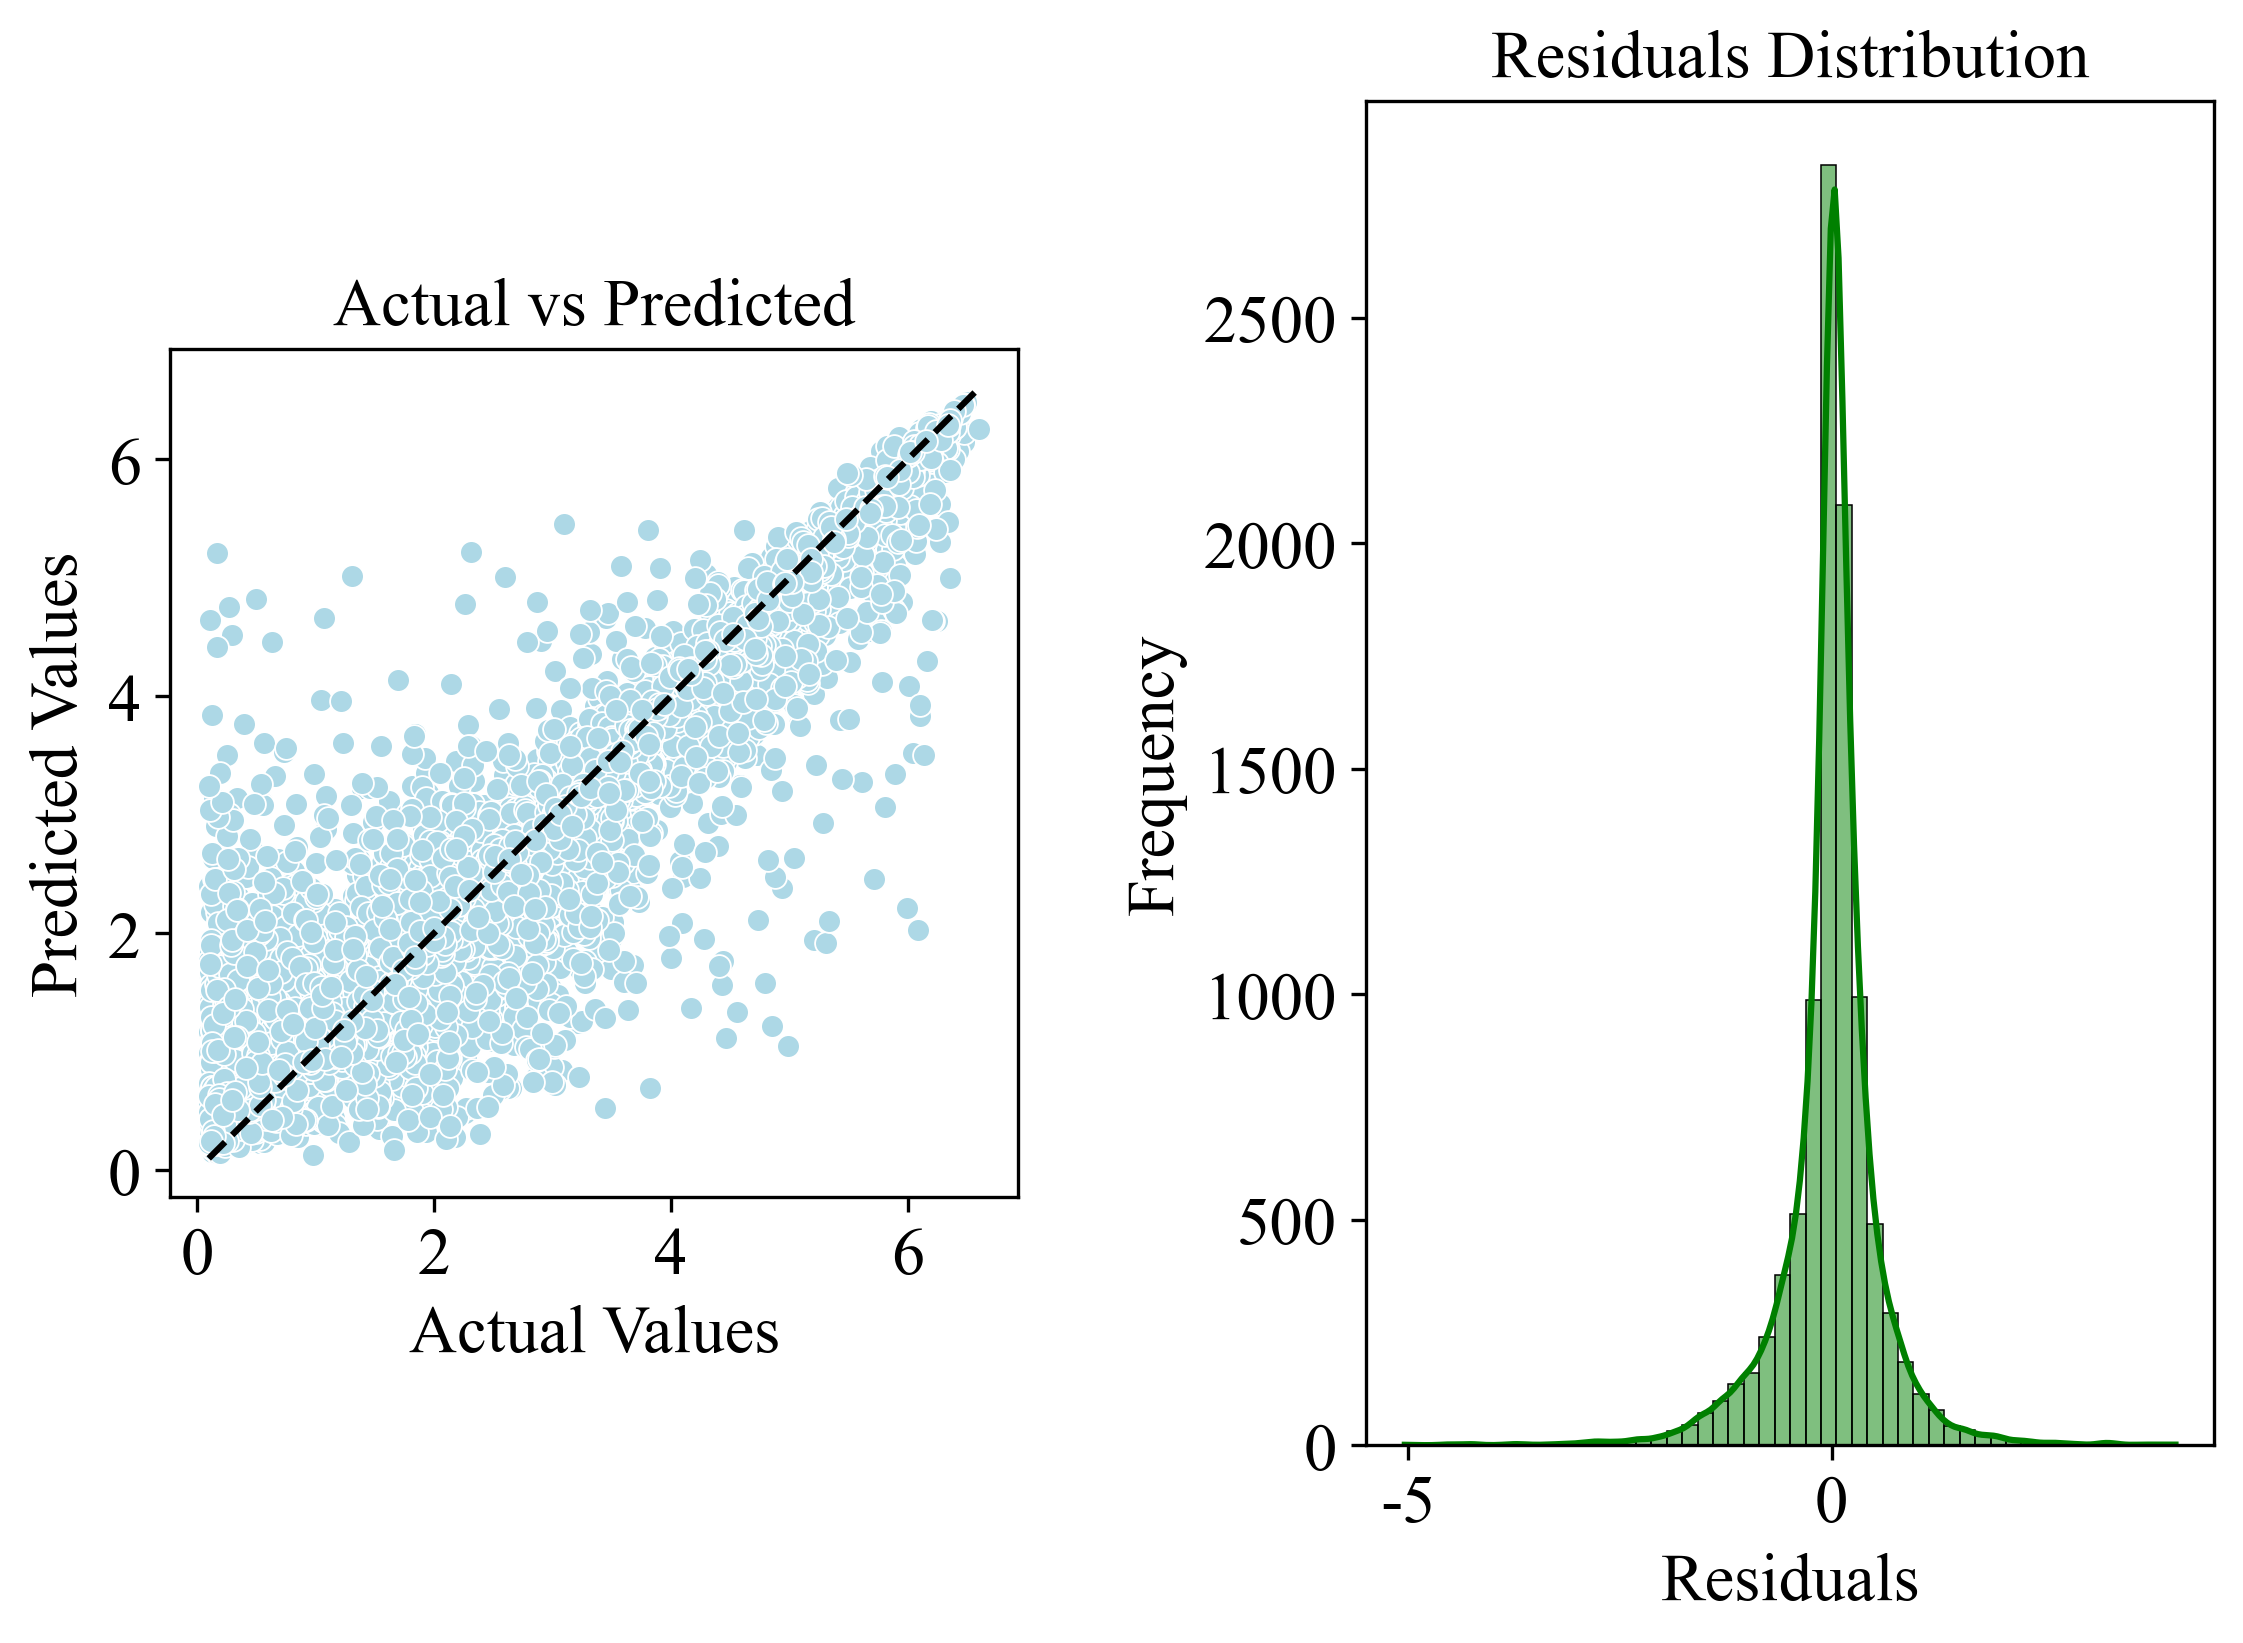

In [76]:
# 创建一个大的图表和子图
fig, axes = plt.subplots(1, 2)  

# 实际值与预测值对比图
sns.scatterplot(x=y_test, y=y_pred, ax=axes[0], color='lightblue', s=30)
axes[0].set_title('Actual vs Predicted', fontsize=params['axes.titlesize']) 
axes[0].set_xlabel('Actual Values', fontsize=params['axes.labelsize'])  
axes[0].set_ylabel('Predicted Values', fontsize=params['axes.labelsize'])  
axes[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--')
axes[0].set_aspect('equal', 'box')
axes[0].grid(False)  

# 误差分布图
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, ax=axes[1], color='green', bins=50)
axes[1].set_title('Residuals Distribution',fontsize=params['axes.titlesize'])
axes[1].set_xlabel('Residuals', fontsize=params['axes.labelsize'])
axes[1].set_ylabel('Frequency', fontsize=params['axes.labelsize'])
axes[1].grid(False) 

plt.tight_layout()
plt.show()

In [78]:
data_val = pd.read_csv('./Data/df_28.csv')
df_Val = pd.merge(df_ceg, data_val, on='formula', how='inner')
df_Val

formula  y_val  y_pred    target  B_Density  B_dipole Polarizability  \
0   CsSrCl3      1       1  6.254735       2.64                    197.2   
1   RbEuCl3      1       1  1.672559       5.24                    184.0   
2   CsCaBr3      1       1  5.729195       1.54                    160.8   
3   CsEuCl3      1       1  1.674355       5.24                    184.0   
4   RbPbCl3      1       1  2.962986      11.30                     47.0   
5    RbGeI3      1       1  1.006948       5.32                     40.0   
6    CsPbI3      1       1  1.903129      11.30                     47.0   
7   RbSrCl3      1       1  5.914542       2.64                    197.2   
8   RbCuBr3      1       1  0.592188       8.96                     46.5   
9   CsCaCl3      1       1  6.765173       1.54                    160.8   
10  CsPbBr3      1       1  2.478341      11.30                     47.0   
11  RbCaBr3      1       1  5.295649       1.54                    160.8   
12  CsSnCl3      1       1  1.937214       7.29                     53.0   
13  CsCdBr3      1       1  1.854566       8.69                     46.0   
14  CsCdCl3      1       1  3.052211       8.69                     46.0   
15  CsGeBr3      1       1  1.168093       5.32                     40.0   
16  CsPbCl3      1       1  2.864395      11.30                     47.0   
17  CsSnBr3      1       1  1.002063       7.29                     53.0   
18   CsSnI3      1       1  0.763360       7.29                     53.0   

    B_number  B_number of s+p Electrons  avg ionic char  B_Electronegativity  
0         38                          2        0.175397                 0.95  
1         63                          2        0.164963                 1.20  
2         20                          2        0.157534                 1.00  
3         63                          2        0.166251                 1.20  
4         82                          2        0.125838                 2.33  
5         32                          2        0.092479                 2.01  
6         82                          2        0.091052                 2.33  
7         38                          2        0.174251                 0.95  
8         29                          1        0.121314                 1.90  
9         20                          2        0.173593                 1.00  
10        82                          2        0.112251                 2.33  
11        20                          2        0.156203                 1.00  
12        50                          2        0.138404                 1.96  
13        48                          2        0.130177                 1.69  
14        48                          2        0.147952                 1.69  
15        32                          2        0.119691                 2.01  
16        82                          2        0.127409                 2.33  
17        50                          2        0.121160                 1.96  
18        50                          2        0.095366                 1.96

In [80]:
X_val = df_Val.iloc[:, 4:]
y_val = df_Val['target']
print(X_val.shape)
print(y_val.shape)

(19, 6)
(19,)


In [82]:
y_pred = RFR.predict(X_val)
print(f'R2:{r2_score(y_val,y_pred)}')
print(f'MAE:{mean_absolute_error(y_val,y_pred)}')
print(f'rmse: {sqrt(mean_squared_error(y_val, y_pred))}')

R2:0.8428577080242663
MAE:0.5783631009888112
rmse: 0.7893088994871154


In [84]:
formula = df_Val['formula']
data_dict = {'formula': formula, 'y_val': y_val, 'y_pred': y_pred}
df_c1 = pd.DataFrame(data_dict)
df_c1

formula     y_val    y_pred
0   CsSrCl3  6.254735  6.062452
1   RbEuCl3  1.672559  0.162799
2   CsCaBr3  5.729195  5.405904
3   CsEuCl3  1.674355  0.354255
4   RbPbCl3  2.962986  1.255212
5    RbGeI3  1.006948  1.130533
6    CsPbI3  1.903129  1.043417
7   RbSrCl3  5.914542  5.695683
8   RbCuBr3  0.592188  1.099378
9   CsCaCl3  6.765173  6.259716
10  CsPbBr3  2.478341  1.453374
11  RbCaBr3  5.295649  5.292954
12  CsSnCl3  1.937214  1.587689
13  CsCdBr3  1.854566  2.388489
14  CsCdCl3  3.052211  3.366063
15  CsGeBr3  1.168093  1.163214
16  CsPbCl3  2.864395  1.495558
17  CsSnBr3  1.002063  1.015112
18   CsSnI3  0.763360  0.872521

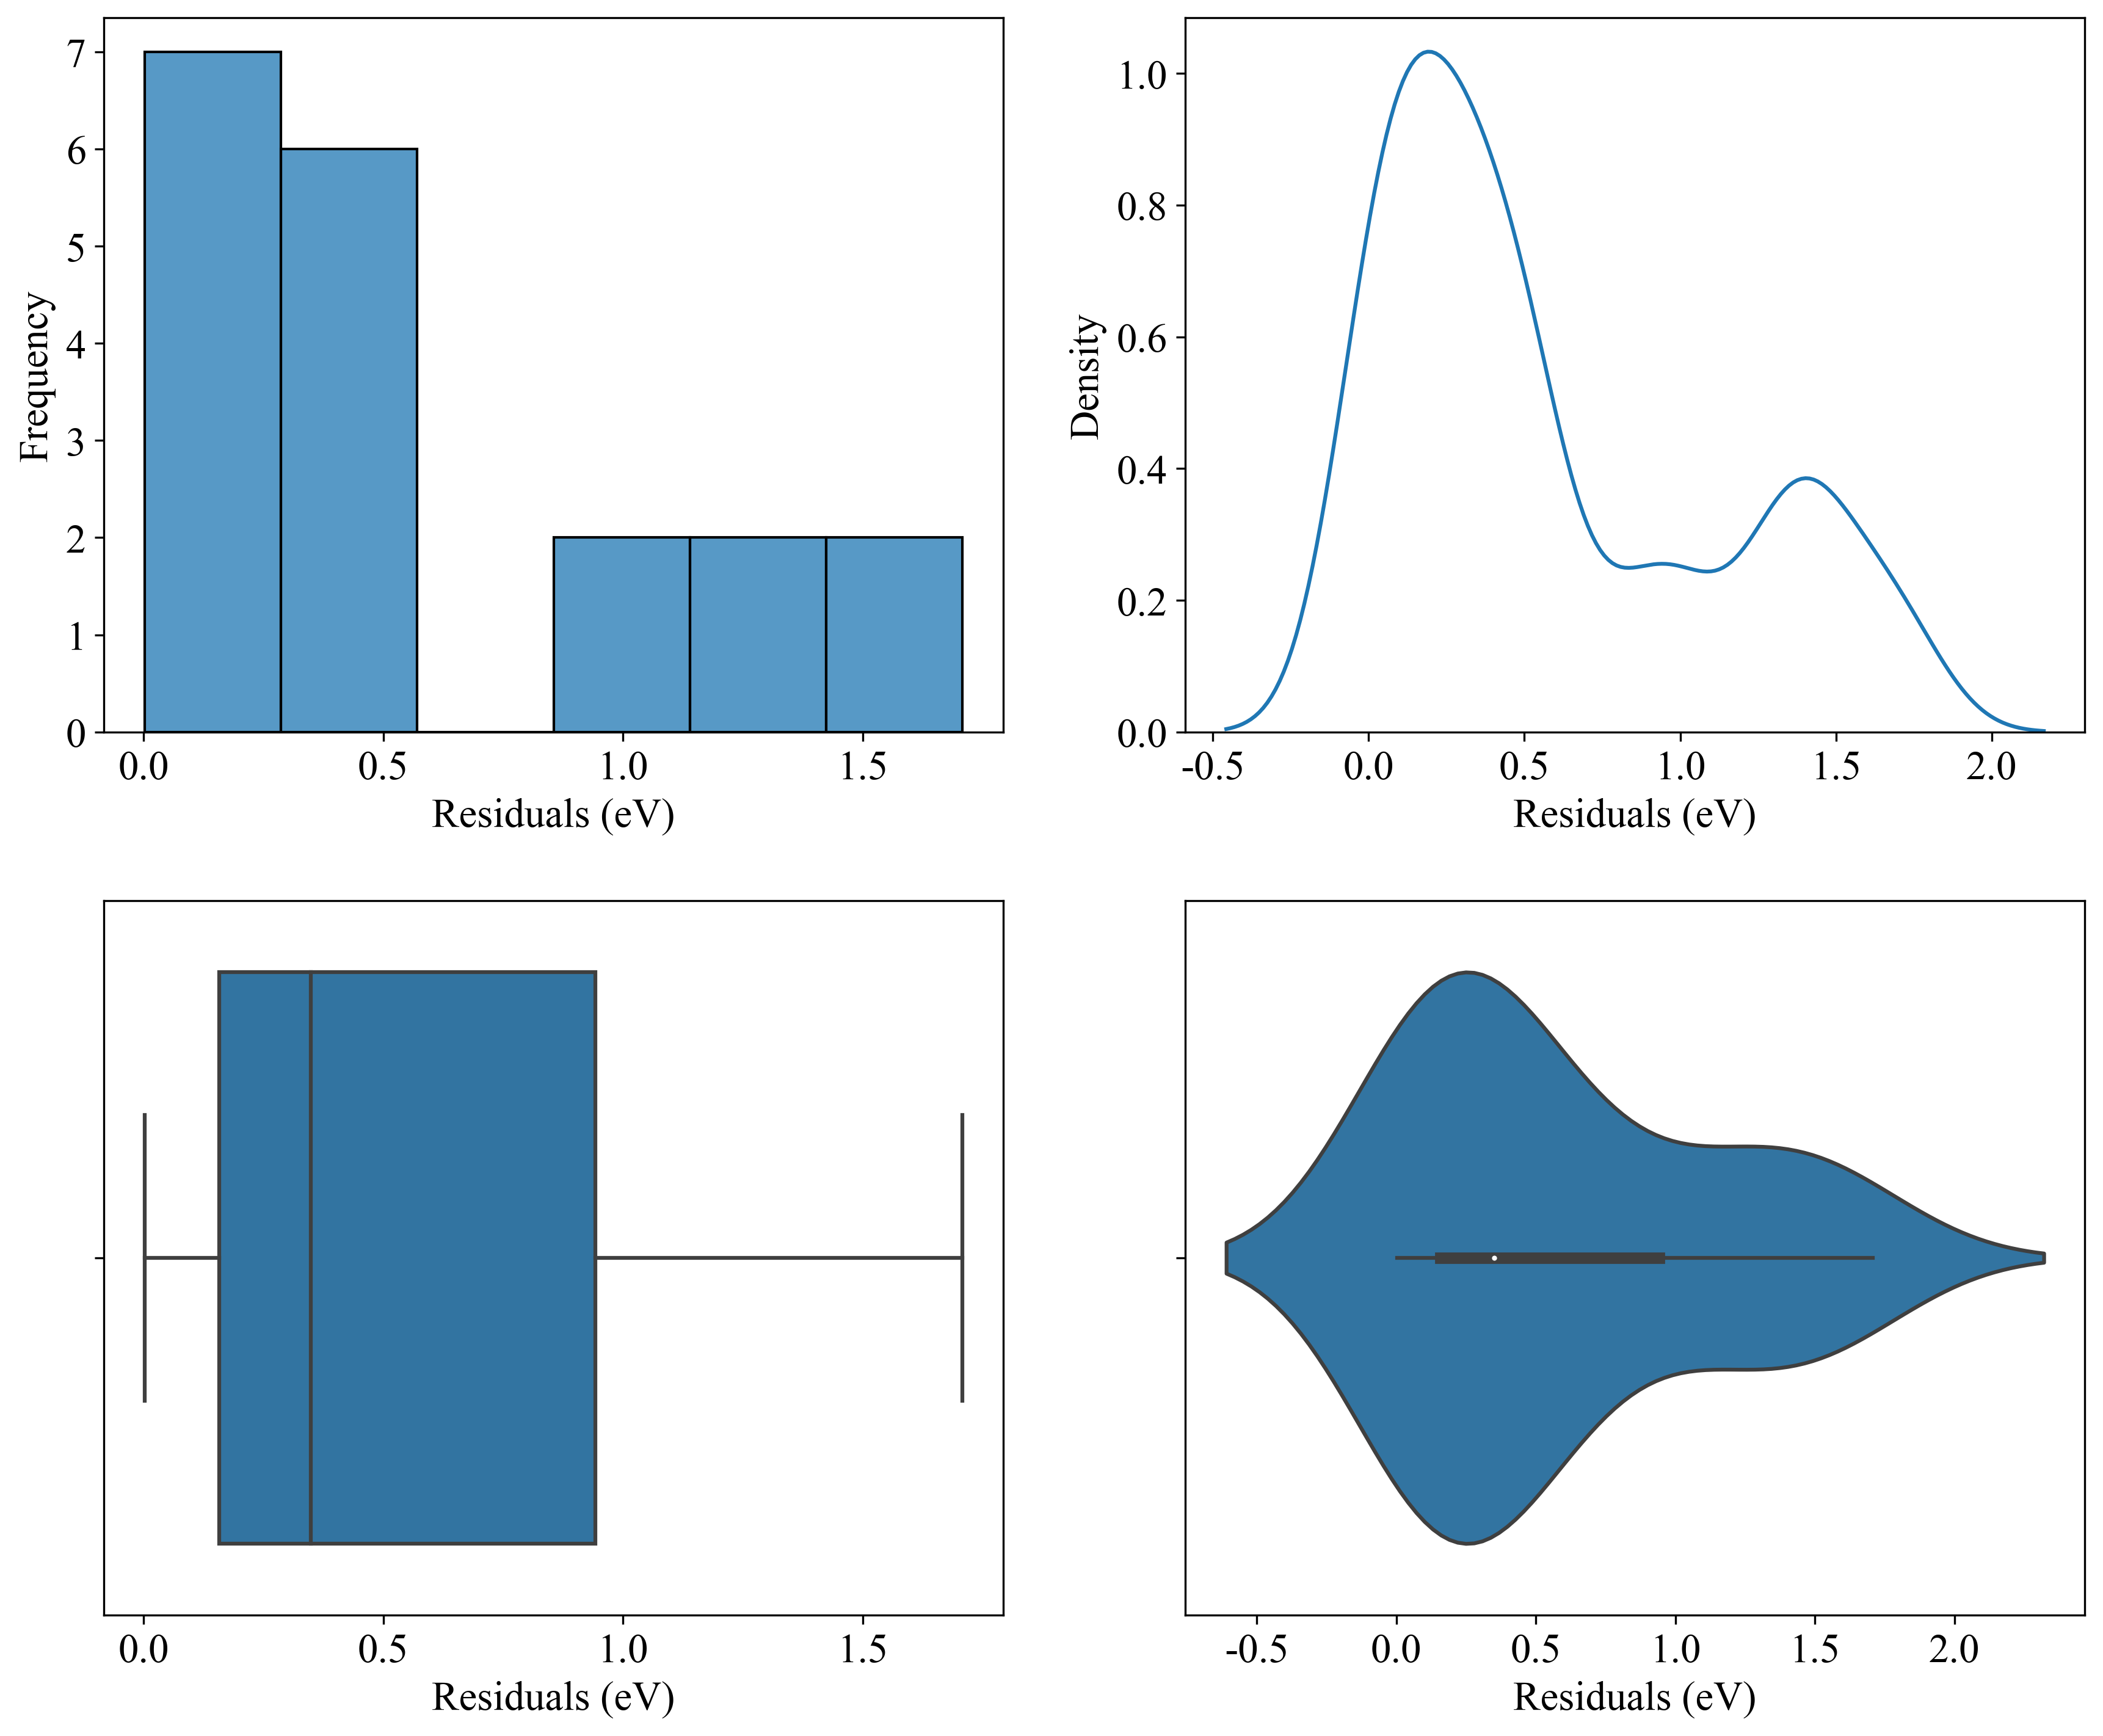

In [85]:
error = np.abs(y_val - y_pred)

# 创建一个图和子图
fig, axes = plt.subplots(2, 2, figsize=(12, 10), facecolor='white')

# 第一个子图：直方图
sns.histplot(error, kde=False, ax=axes[0, 0])
axes[0, 0].set_xlabel('Residuals (eV)', fontsize=params['axes.labelsize'])
axes[0, 0].set_ylabel('Frequency', fontsize=params['axes.labelsize'])

# 第二个子图：核密度估计图
sns.kdeplot(error, bw_adjust=0.5, ax=axes[0, 1])
axes[0, 1].set_xlabel('Residuals (eV)', fontsize=params['axes.labelsize'])
axes[0, 1].set_ylabel('Density', fontsize=params['axes.labelsize'])

# 第三个子图：水平箱线图
sns.boxplot(error, orient='h', ax=axes[1, 0])
axes[1, 0].set_xlabel('Residuals (eV)', fontsize=params['axes.labelsize'])

# 第四个子图：小提琴图
sns.violinplot(error, orient='h', ax=axes[1, 1])
axes[1, 1].set_xlabel('Residuals (eV)', fontsize=params['axes.labelsize'])

# 调整子图之间的空间
plt.tight_layout()

# 显示图表
plt.show()

In [86]:
pd.DataFrame(np.abs(error)).describe()

target
count  19.000000
mean    0.578363
std     0.551845
min     0.002695
25%     0.157934
50%     0.349525
75%     0.942340
max     1.707775

In [87]:
df_val = df_c[df_c['y_pred']==0]
df_val

formula  y_val  y_pred
0   RbFeCl3      0       0
1   CsTmCl3      0       0
2   RbPdCl3      0       0
3   CsPdCl3      0       0
8   CsYbCl3      1       0
13  CsPdBr3      1       0
15  CsYbBr3      1       0
23  CsHgBr3      0       0
24  CsHgCl3      1       0

In [115]:
df_val1 = pd.concat([df_val, df_c1], axis=0).reset_index(drop=True)
df_val1

formula     y_val    y_pred
0   RbFeCl3  0.000000  0.000000
1   CsTmCl3  0.000000  0.000000
2   RbPdCl3  0.000000  0.000000
3   CsPdCl3  0.000000  0.000000
4   CsYbCl3  1.000000  0.000000
5   CsPdBr3  1.000000  0.000000
6   CsYbBr3  1.000000  0.000000
7   CsHgBr3  0.000000  0.000000
8   CsHgCl3  1.000000  0.000000
9   CsSrCl3  6.254735  6.062452
10  RbEuCl3  1.672559  0.162799
11  CsCaBr3  5.729195  5.405904
12  CsEuCl3  1.674355  0.354255
13  RbPbCl3  2.962986  1.255212
14   RbGeI3  1.006948  1.130533
15   CsPbI3  1.903129  1.043417
16  RbSrCl3  5.914542  5.695683
17  RbCuBr3  0.592188  1.099378
18  CsCaCl3  6.765173  6.259716
19  CsPbBr3  2.478341  1.453374
20  RbCaBr3  5.295649  5.292954
21  CsSnCl3  1.937214  1.587689
22  CsCdBr3  1.854566  2.388489
23  CsCdCl3  3.052211  3.366063
24  CsGeBr3  1.168093  1.163214
25  CsPbCl3  2.864395  1.495558
26  CsSnBr3  1.002063  1.015112
27   CsSnI3  0.763360  0.872521

In [91]:
y_pred = df_val1['y_pred']
y_val = df_val1['y_val']
print(f'R2:{r2_score(y_val,y_pred)}')
print(f'MAE:{mean_absolute_error(y_val,y_pred)}')
print(f'rmse: {sqrt(mean_squared_error(y_val, y_pred))}')

R2:0.8611340131942993
MAE:0.5353178185281219
rmse: 0.7520724280608518


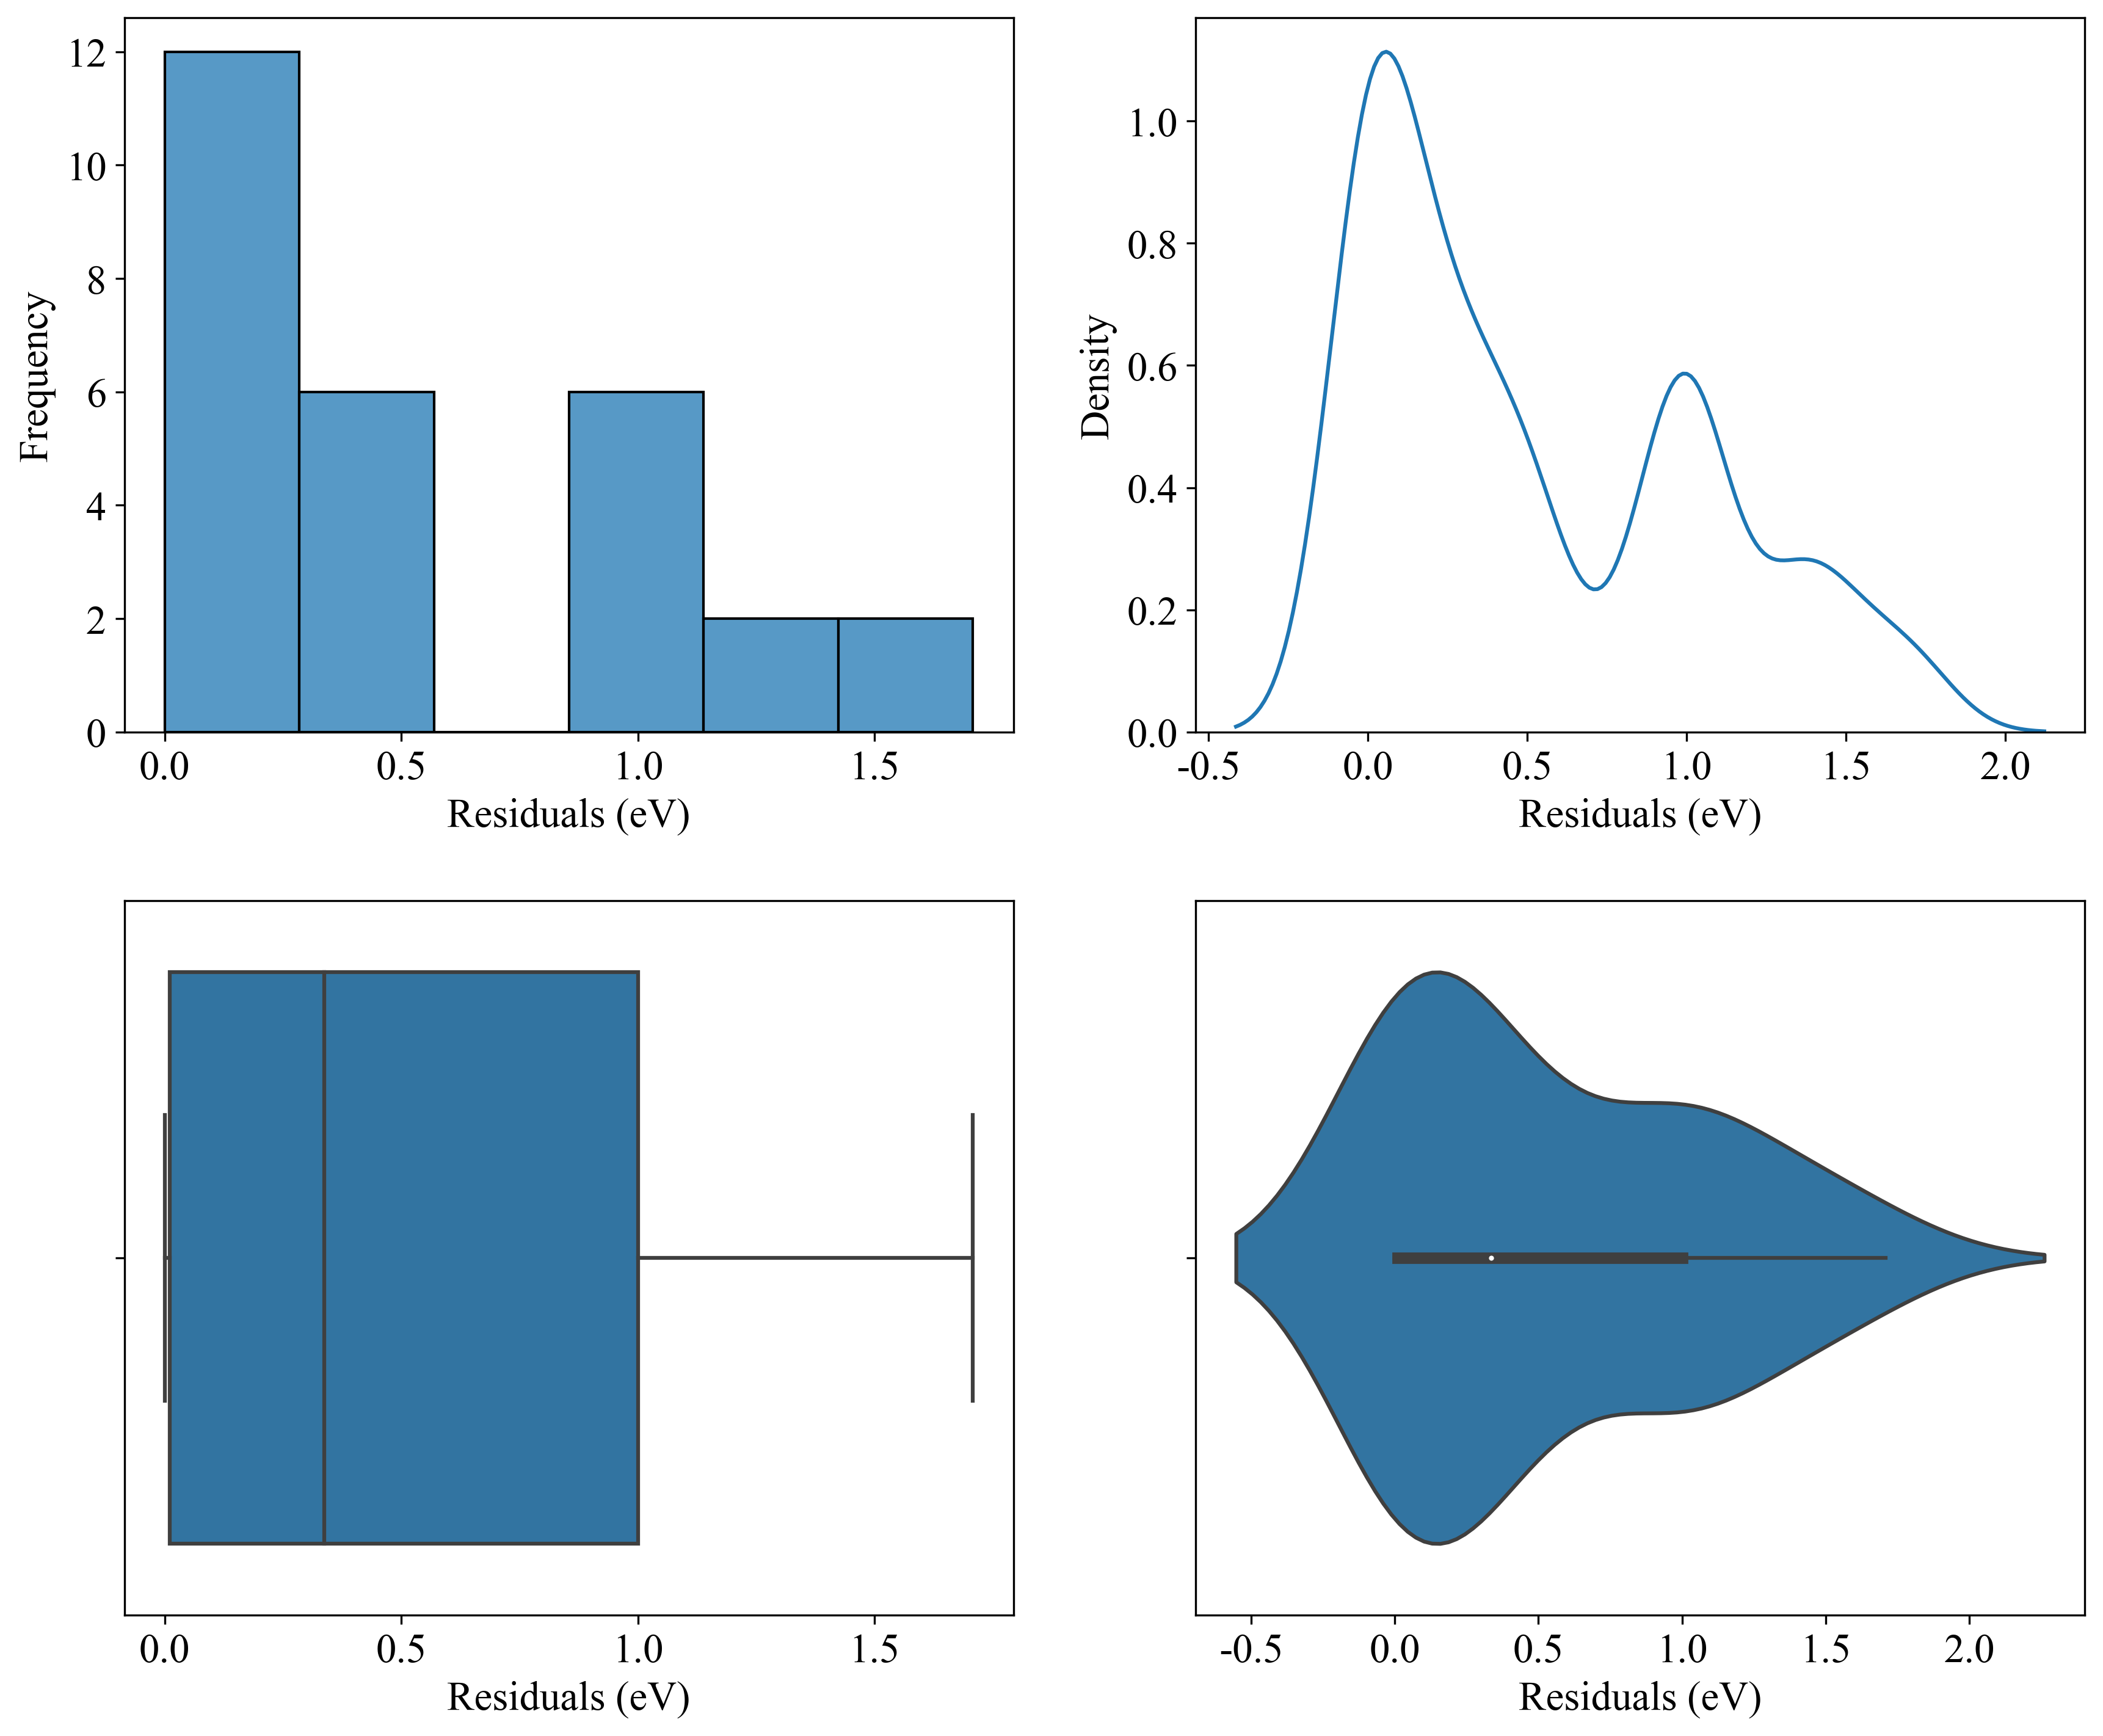

In [92]:
error = np.abs(y_val - y_pred)

# 创建一个图和子图
fig, axes = plt.subplots(2, 2, figsize=(12, 10), facecolor='white')

# 第一个子图：直方图
sns.histplot(error, kde=False, ax=axes[0, 0])
axes[0, 0].set_xlabel('Residuals (eV)', fontsize=params['axes.labelsize'])
axes[0, 0].set_ylabel('Frequency', fontsize=params['axes.labelsize'])

# 第二个子图：核密度估计图
sns.kdeplot(error, bw_adjust=0.5, ax=axes[0, 1])
axes[0, 1].set_xlabel('Residuals (eV)', fontsize=params['axes.labelsize'])
axes[0, 1].set_ylabel('Density', fontsize=params['axes.labelsize'])

# 第三个子图：水平箱线图
sns.boxplot(error, orient='h', ax=axes[1, 0])
axes[1, 0].set_xlabel('Residuals (eV)', fontsize=params['axes.labelsize'])

# 第四个子图：小提琴图
sns.violinplot(error, orient='h', ax=axes[1, 1])
axes[1, 1].set_xlabel('Residuals (eV)', fontsize=params['axes.labelsize'])

# 调整子图之间的空间
plt.tight_layout()

# 显示图表
plt.show()

In [93]:
pd.DataFrame(np.abs(error)).describe()

0
count  28.000000
mean    0.535318
std     0.537943
min     0.000000
25%     0.011007
50%     0.336408
75%     1.000000
max     1.707775

In [116]:
index_to_modify = df_val1[(df_val1['y_val']==1)&(df_val1['y_pred']==0)].index
formula_to_modify = df_val1.loc[index_to_modify,'formula']
df_val1.loc[index_to_modify,'y_val']=data_val[data_val['formula'].isin(formula_to_modify)]['target'].values
df_val1

formula     y_val    y_pred
0   RbFeCl3  0.000000  0.000000
1   CsTmCl3  0.000000  0.000000
2   RbPdCl3  0.000000  0.000000
3   CsPdCl3  0.000000  0.000000
4   CsYbCl3  6.628890  0.000000
5   CsPdBr3  0.890561  0.000000
6   CsYbBr3  5.564464  0.000000
7   CsHgBr3  0.000000  0.000000
8   CsHgCl3  0.532680  0.000000
9   CsSrCl3  6.254735  6.062452
10  RbEuCl3  1.672559  0.162799
11  CsCaBr3  5.729195  5.405904
12  CsEuCl3  1.674355  0.354255
13  RbPbCl3  2.962986  1.255212
14   RbGeI3  1.006948  1.130533
15   CsPbI3  1.903129  1.043417
16  RbSrCl3  5.914542  5.695683
17  RbCuBr3  0.592188  1.099378
18  CsCaCl3  6.765173  6.259716
19  CsPbBr3  2.478341  1.453374
20  RbCaBr3  5.295649  5.292954
21  CsSnCl3  1.937214  1.587689
22  CsCdBr3  1.854566  2.388489
23  CsCdCl3  3.052211  3.366063
24  CsGeBr3  1.168093  1.163214
25  CsPbCl3  2.864395  1.495558
26  CsSnBr3  1.002063  1.015112
27   CsSnI3  0.763360  0.872521

In [126]:
df_val1 = df_val1.drop(index=[4,6]).reset_index(drop=True)

In [127]:
y_pred = df_val1['y_pred']
y_val = df_val1['y_val']
print(f'R2:{r2_score(y_val,y_pred)}')
print(f'MAE:{mean_absolute_error(y_val,y_pred)}')
print(f'rmse: {sqrt(mean_squared_error(y_val, y_pred))}')

R2:0.8857296783251001
MAE:0.477389978482629
rmse: 0.7047642339736684


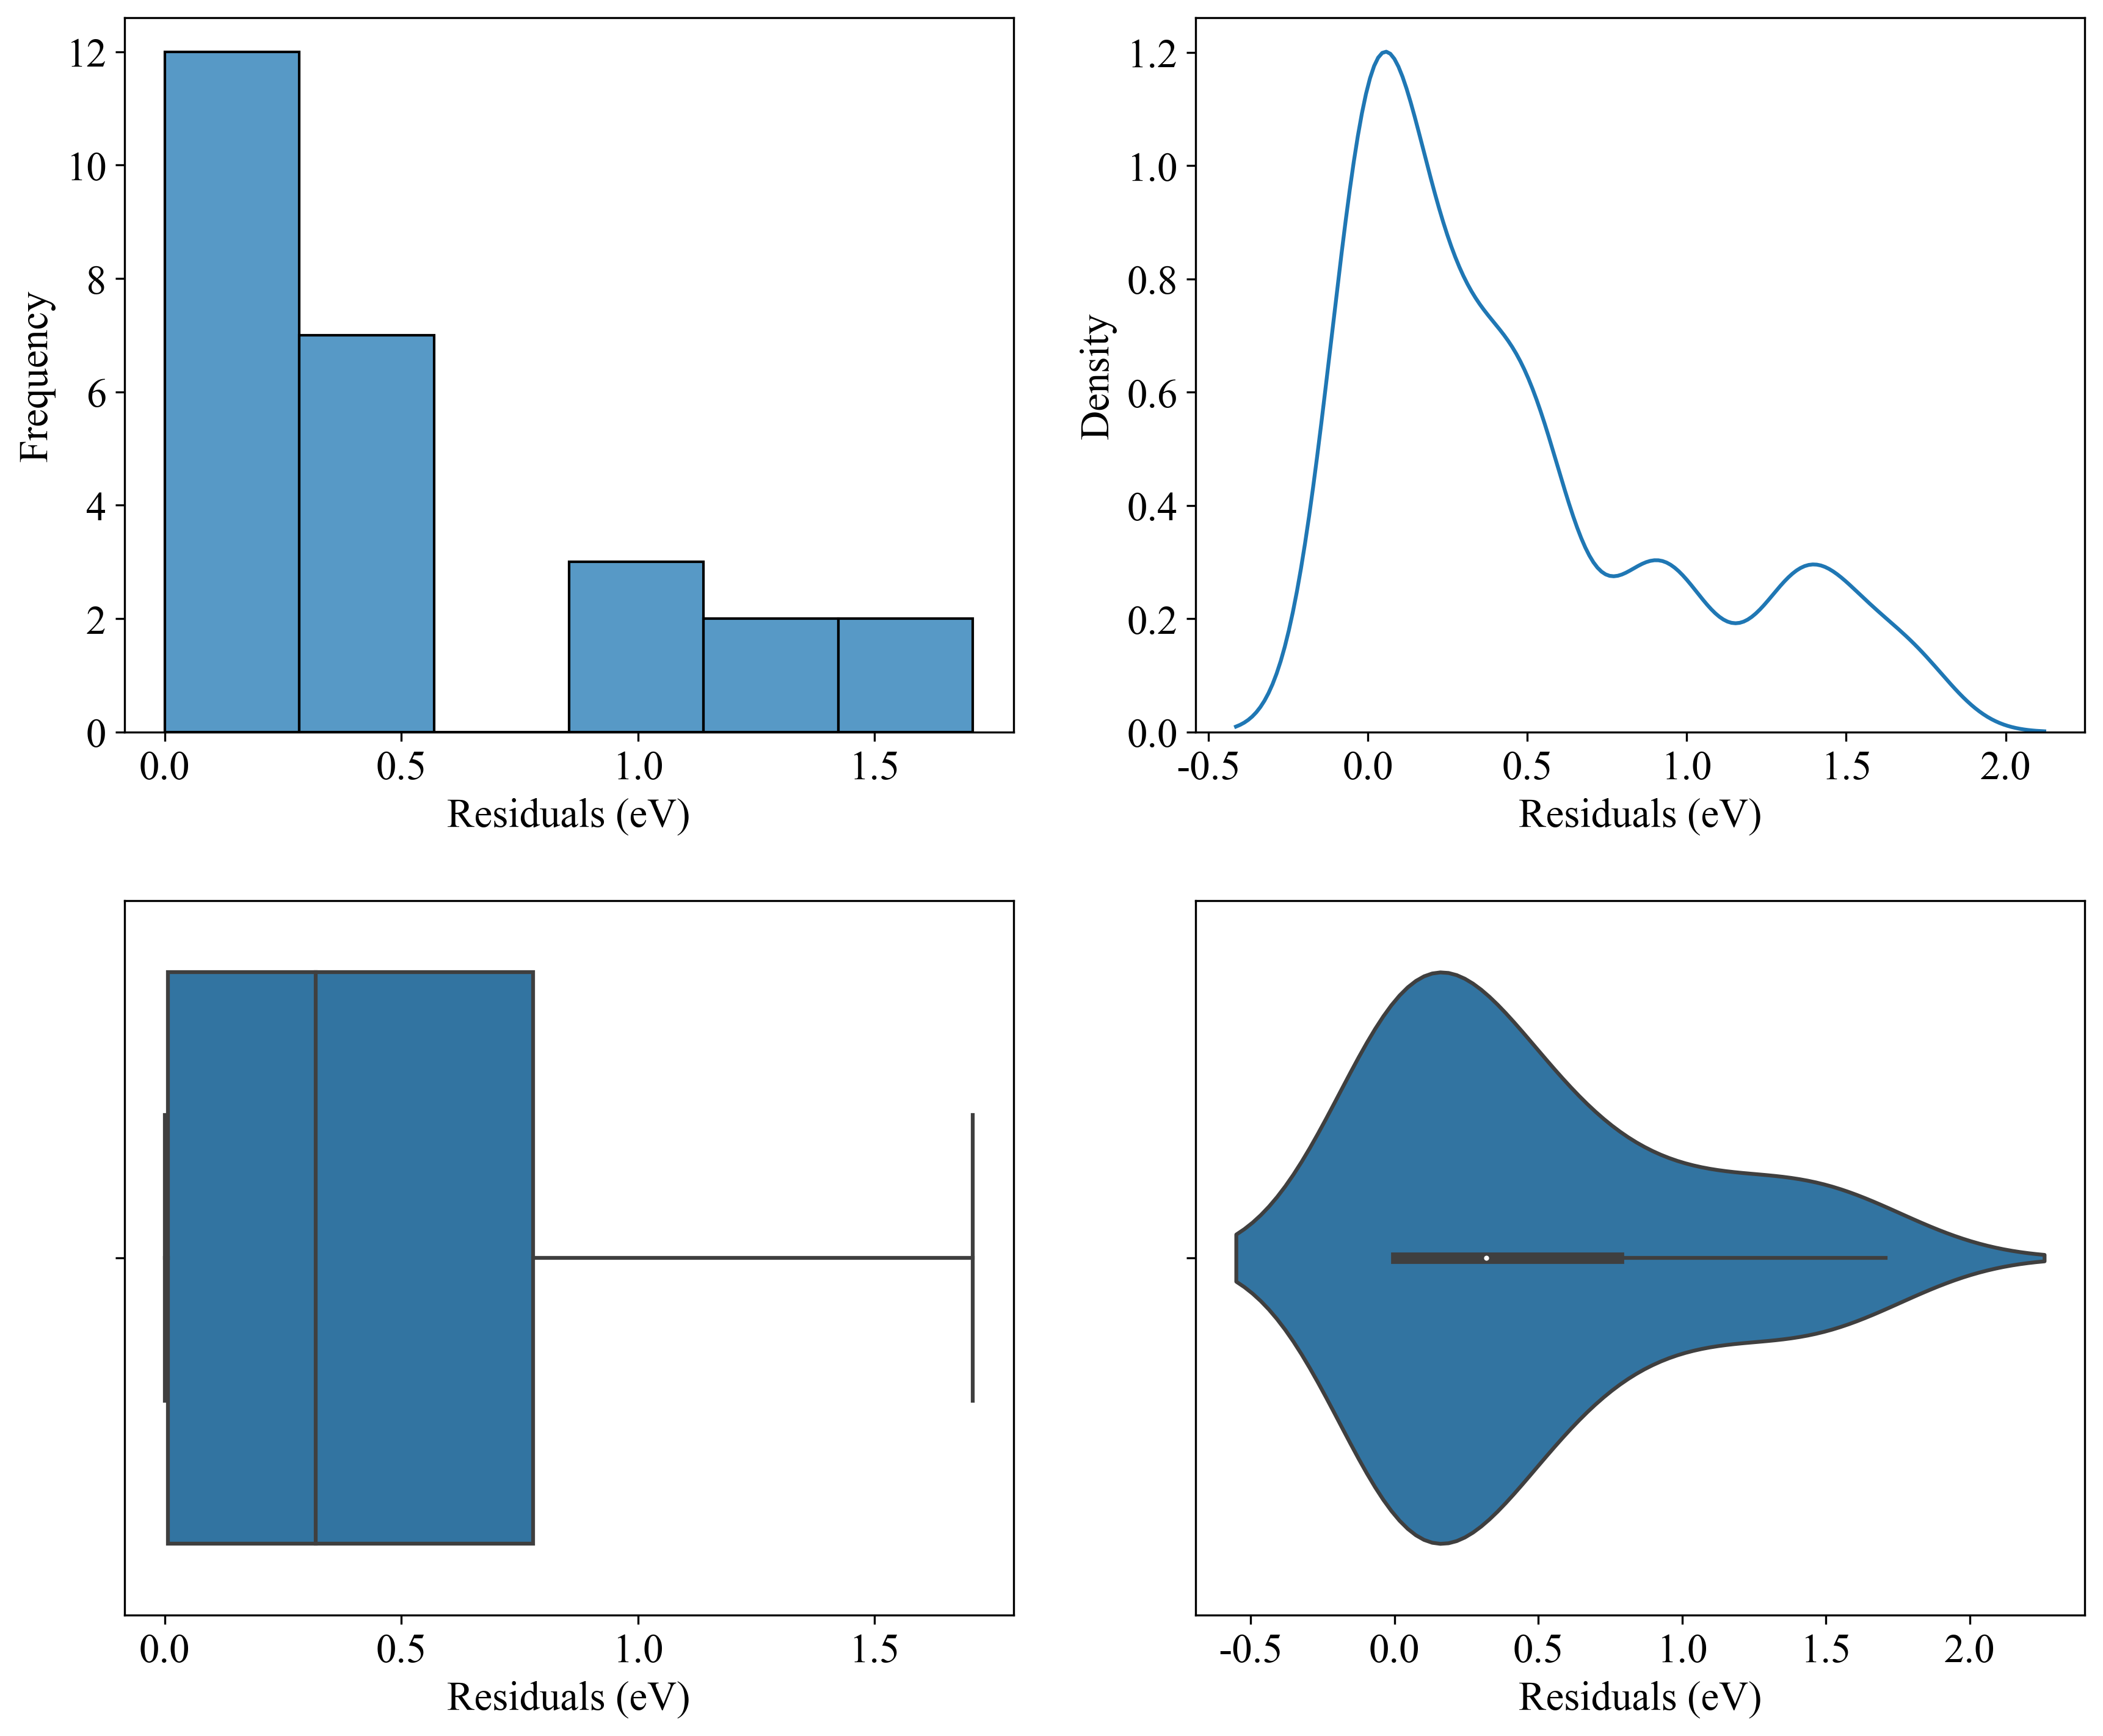

In [128]:
error = np.abs(y_val - y_pred)

# 创建一个图和子图
fig, axes = plt.subplots(2, 2, figsize=(12, 10), facecolor='white')

# 第一个子图：直方图
sns.histplot(error, kde=False, ax=axes[0, 0])
axes[0, 0].set_xlabel('Residuals (eV)', fontsize=params['axes.labelsize'])
axes[0, 0].set_ylabel('Frequency', fontsize=params['axes.labelsize'])

# 第二个子图：核密度估计图
sns.kdeplot(error, bw_adjust=0.5, ax=axes[0, 1])
axes[0, 1].set_xlabel('Residuals (eV)', fontsize=params['axes.labelsize'])
axes[0, 1].set_ylabel('Density', fontsize=params['axes.labelsize'])

# 第三个子图：水平箱线图
sns.boxplot(error, orient='h', ax=axes[1, 0])
axes[1, 0].set_xlabel('Residuals (eV)', fontsize=params['axes.labelsize'])

# 第四个子图：小提琴图
sns.violinplot(error, orient='h', ax=axes[1, 1])
axes[1, 1].set_xlabel('Residuals (eV)', fontsize=params['axes.labelsize'])

# 调整子图之间的空间
plt.tight_layout()

# 显示图表
plt.show()

In [129]:
pd.DataFrame(np.abs(error)).describe()

0
count  26.000000
mean    0.477390
std     0.528718
min     0.000000
25%     0.006922
50%     0.318571
75%     0.778265
max     1.707775

## 下面尝试数据集进行ETC分类：

In [142]:
X = select_label0.iloc[:, 8:-2]
y = select_label0['Metal_or_not']
y.value_counts()

1    49861
0    16100
Name: Metal_or_not, dtype: int64

In [143]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=0)
print(X_train.shape,X_test.shape)

(52768, 14) (13193, 14)


In [145]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from tqdm import tqdm
data_numbers = []
roc_auc_scores = []
ETC = ExtraTreesClassifier(n_jobs=-1,random_state=42)
metal = select_label0[select_label0['Metal_or_not']==0]
non_metal = select_label0[select_label0['Metal_or_not']!=0]
max_n = min(len(metal),len(non_metal))
for n in  tqdm(np.linspace(100,max_n,100)):
    index_sample = metal.sample(int(n/2),random_state=42).index.append(non_metal.sample(int(n/2),random_state=42).index)
    X_sample = X.loc[index_sample]
    y_sample = y.loc[index_sample]
    data_numbers.append(n)
    roc_auc_scores.append(cross_val_score(ETC,X_sample,y_sample,cv=5,scoring="roc_auc",n_jobs=-1).mean())

100%|██████████| 100/100 [00:43<00:00,  2.32it/s]


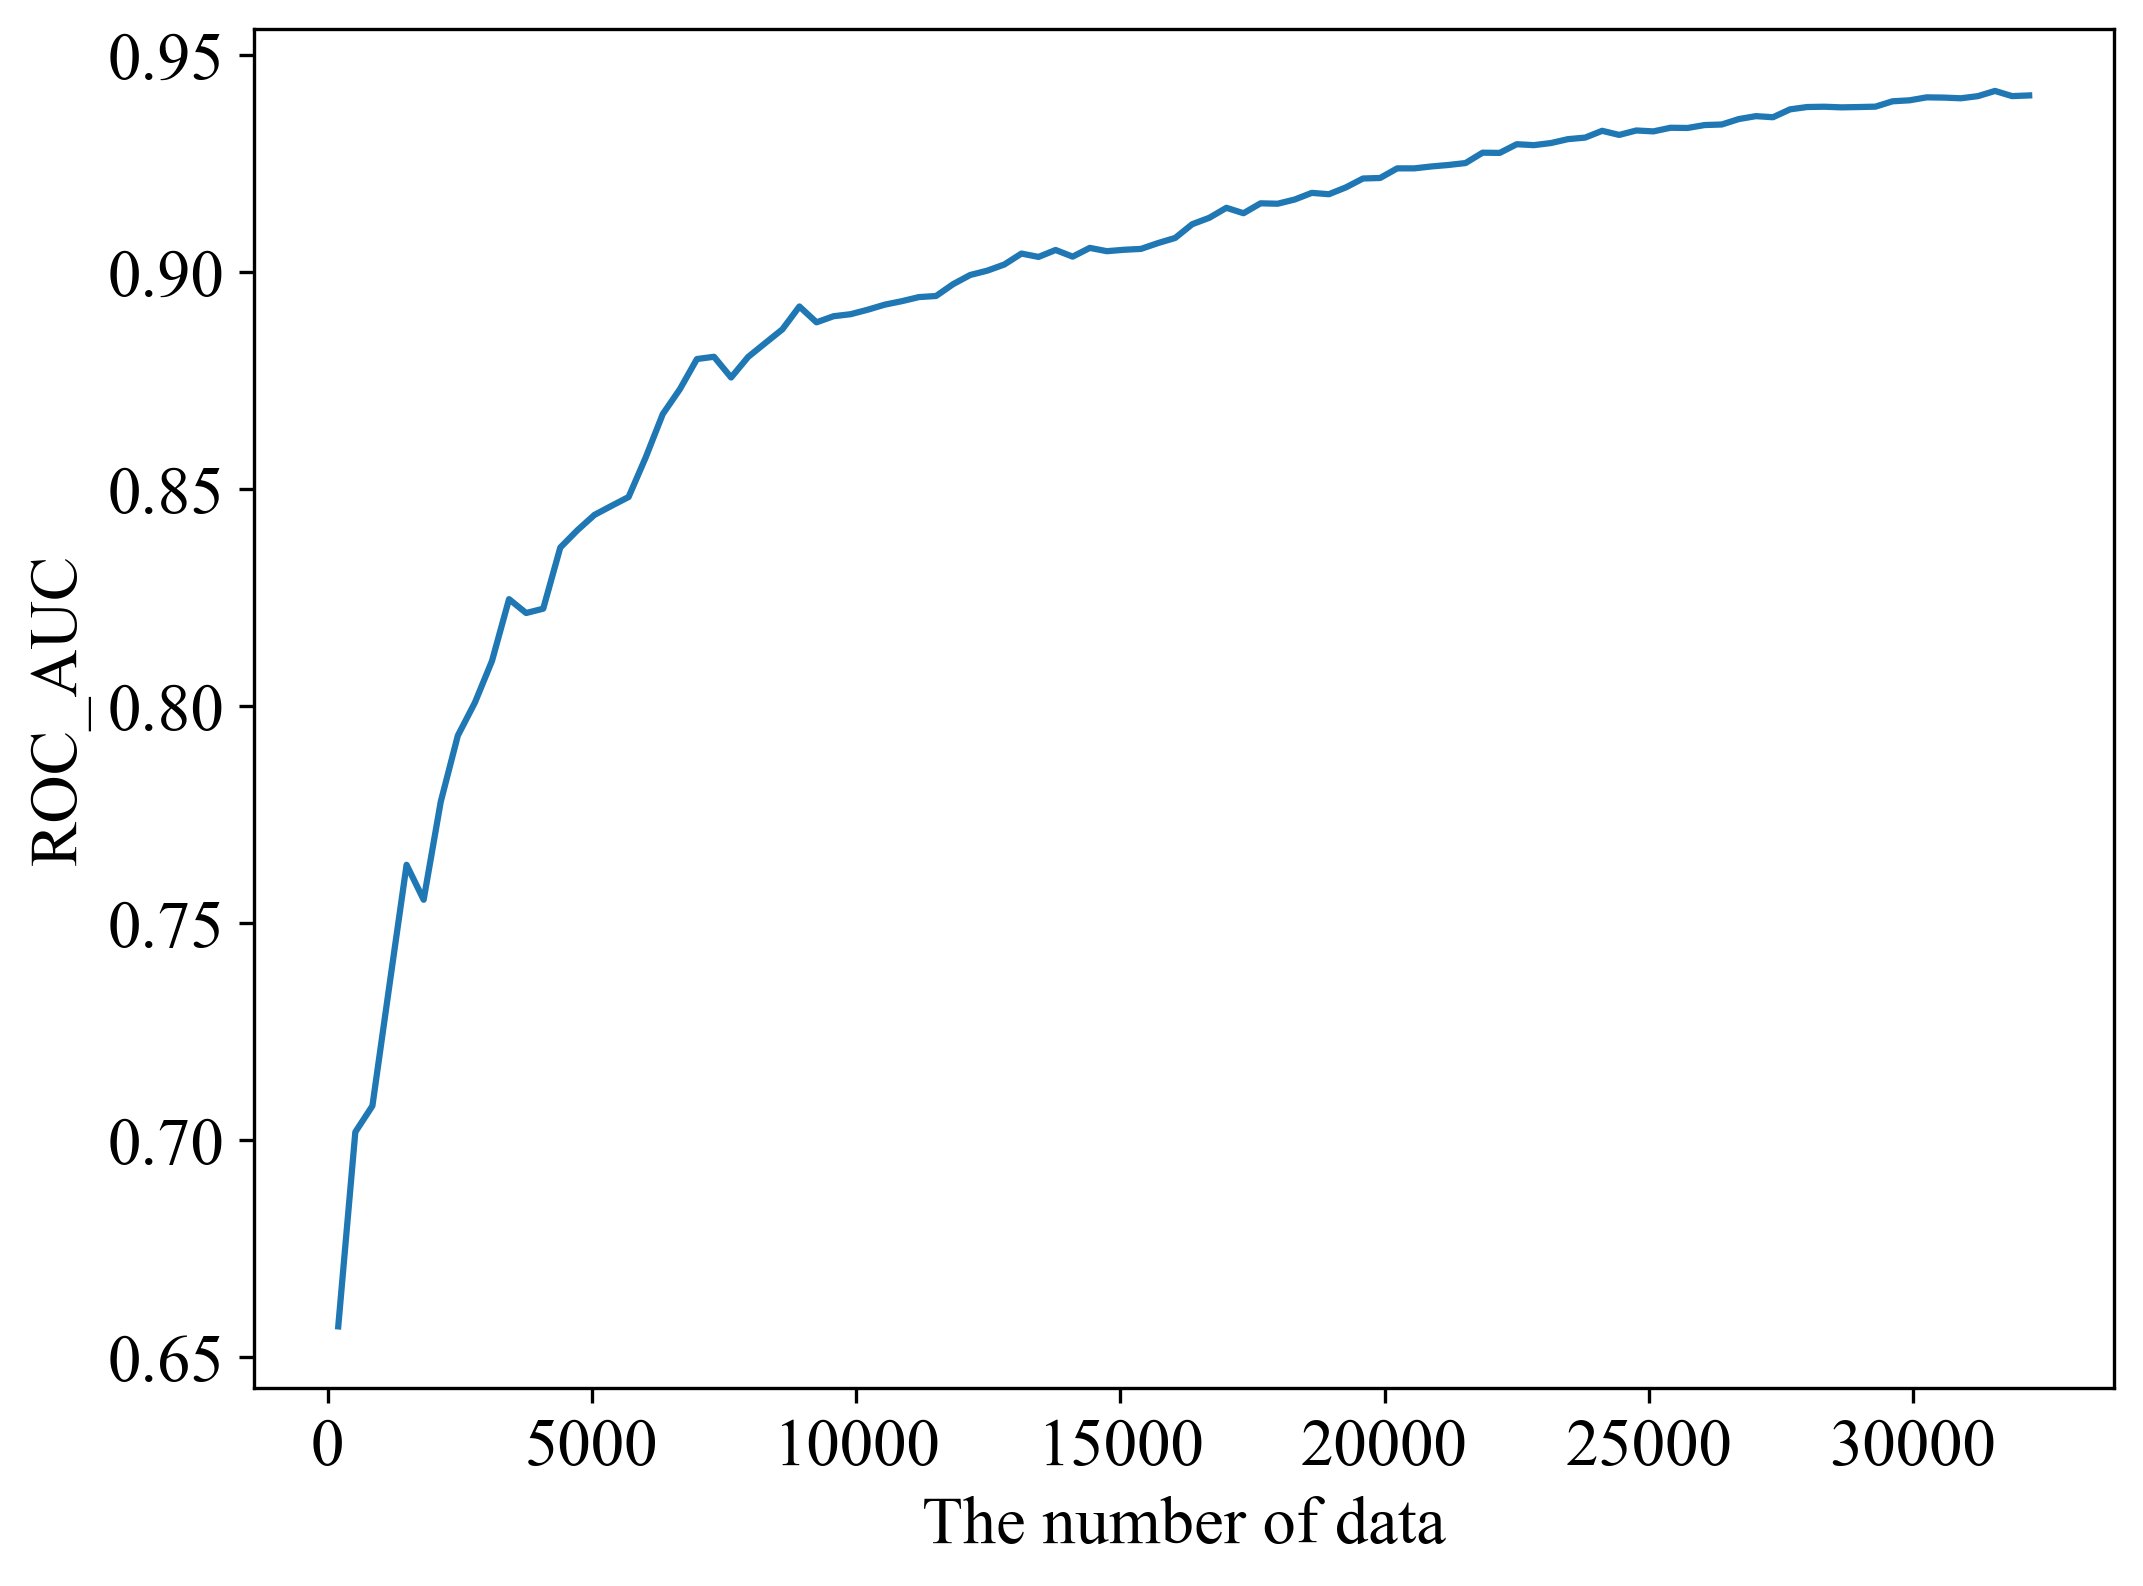

In [146]:
plt.plot([i*2 for i in data_numbers],roc_auc_scores,)
plt.xlabel("The number of data")
plt.ylabel("ROC_AUC")
plt.show()

In [147]:
from sklearn.feature_selection import SelectFromModel
ETC = ExtraTreesClassifier(n_jobs=-1,random_state=42)
ETC.fit(X_train, y_train)
feature_importance=pd.DataFrame()
feature_importance['features'] = X.columns
feature_importance['feature_importances'] = ETC.feature_importances_
threshold = np.sort(feature_importance['feature_importances'].values)
score = []
n_features = []
cols = []
for i in tqdm(threshold):
    selector = SelectFromModel(ETC,threshold=i)
    X_embedded = selector.fit_transform(X_train, y_train)
    once = cross_val_score(ETC,X_embedded,y_train,cv=5,scoring="roc_auc",n_jobs=9).mean()#交叉验证
    score.append(once)
    n_features.append(X_embedded.shape[1])
    cols.append(X.columns[selector.get_support()])
result = pd.DataFrame({"col":cols,"score":score,"n_features":n_features})
result

100%|██████████| 14/14 [00:22<00:00,  1.63s/it]


col     score  n_features
0   Index(['A_Density', 'B_Density', 'X_Density', ...  0.961836          14
1   Index(['A_Density', 'B_Density', 'X_Density', ...  0.961836          14
2   Index(['A_Density', 'B_Density', 'X_Density', ...  0.961836          14
3   Index(['A_Density', 'B_Density', 'X_Density', ...  0.961836          14
4   Index(['A_Density', 'B_Density', 'X_Density', ...  0.961836          14
5   Index(['A_Density', 'B_Density', 'X_Density', ...  0.963937           9
6   Index(['A_Density', 'B_Density', 'X_Density', ...  0.962338           8
7   Index(['A_Density', 'B_Density', 'B_dipole Pol...  0.966725           7
8   Index(['B_Density', 'B_dipole Polarizability',...  0.966862           6
9   Index(['B_Density', 'B_dipole Polarizability',...  0.965240           5
10  Index(['B_Density', 'B_dipole Polarizability',...  0.964353           4
11  Index(['B_Density', 'B_dipole Polarizability',...  0.887477           3
12  Index(['B_dipole Polarizability', 'B_number'],...  0.882792           2
13  Index(['B_dipole Polarizability'], dtype='obje...  0.841445           1

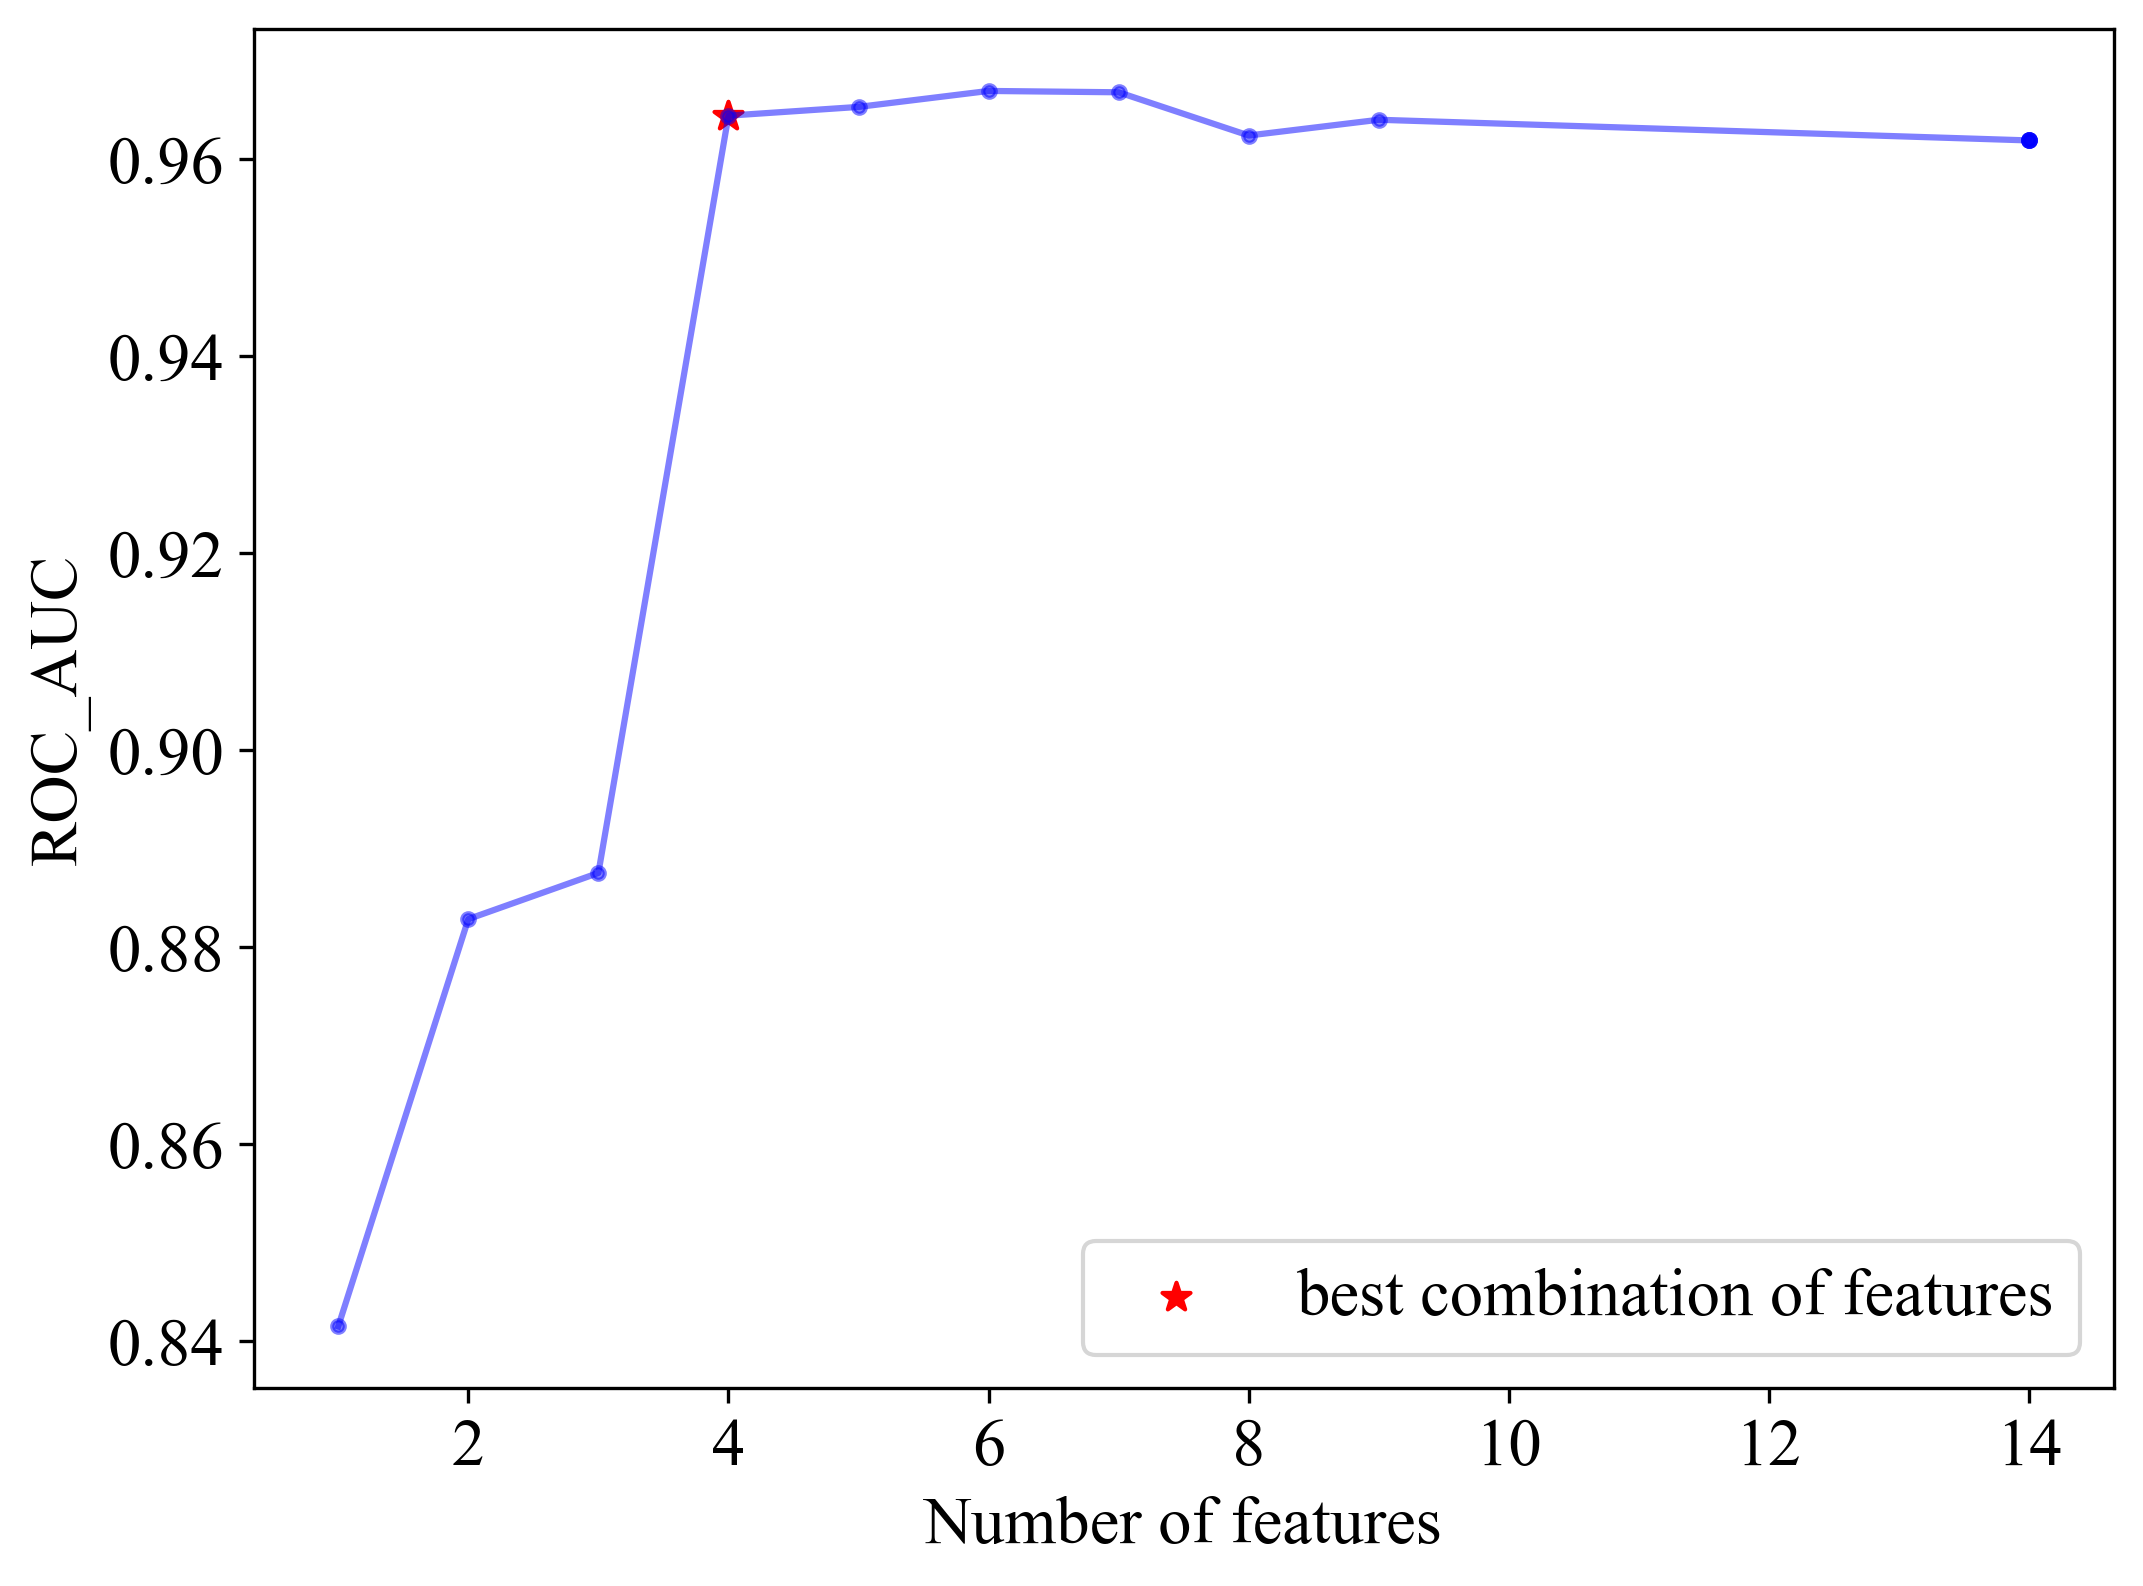

In [148]:
f_fig, f_ax = plt.subplots(figsize=(8, 6))
to_select = result[result['score']>0.96]
to_select = to_select.sort_values(by='n_features',ascending=True)
f_ax.scatter(to_select.iloc[0]['n_features'],to_select.iloc[0]['score'],marker='*',
            s=50,c='r',label='best combination of features')
f_ax.plot(n_features,score, color='b',marker='.',alpha=0.5)
# plt.axhline(y=to_select.iloc[0]['score'],linestyle="--",color='grey')
# plt.axvline(x=to_select.iloc[0]['n_features'],linestyle="--",color='grey')
f_ax.set_xlabel("Number of features"), plt.ylabel("ROC_AUC")
f_ax.legend()
plt.show()

In [149]:
feature_labels = to_select.iloc[0]['col']
X_train = X.loc[X_train.index][feature_labels]
X_test = X.loc[X_test.index][feature_labels]
X_train.shape, X_test.shape

((52768, 4), (13193, 4))

In [150]:
X_test.columns

Index(['B_Density', 'B_dipole Polarizability', 'B_number', 'avg ionic char'], dtype='object')

In [152]:
from sklearn.metrics import accuracy_score
ETC.fit(X_train,y_train)
y_pred = ETC.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9240506329113924


In [158]:
data_val = pd.read_csv('./Data/df_28.csv')
data_val = data_val[['formula','target','B_Density', 'B_dipole Polarizability', 'B_number', 'avg ionic char']]

data_val['not_metal'] = data_val['target'].apply(lambda x: 0 if x <= 0.1 else 1)
data_val

formula    target  B_Density  B_dipole Polarizability  B_number  \
0   RbFeCl3  0.000000       7.87                    62.00        26   
1   CsTmCl3  0.000000       9.32                   144.00        69   
2   RbPdCl3  0.000000      12.00                    26.14        46   
3   CsPdCl3  0.000000      12.00                    26.14        46   
4   CsSrCl3  6.254735       2.64                   197.20        38   
5   RbEuCl3  1.672559       5.24                   184.00        63   
6   CsCaBr3  5.729195       1.54                   160.80        20   
7   CsEuCl3  1.674355       5.24                   184.00        63   
8   CsYbCl3  6.628890       6.97                   139.00        70   
9   RbPbCl3  2.962986      11.30                    47.00        82   
10   RbGeI3  1.006948       5.32                    40.00        32   
11   CsPbI3  1.903129      11.30                    47.00        82   
12  RbSrCl3  5.914542       2.64                   197.20        38   
13  CsPdBr3  0.890561      12.00                    26.14        46   
14  RbCuBr3  0.592188       8.96                    46.50        29   
15  CsYbBr3  5.564464       6.97                   139.00        70   
16  CsCaCl3  6.765173       1.54                   160.80        20   
17  CsPbBr3  2.478341      11.30                    47.00        82   
18  RbCaBr3  5.295649       1.54                   160.80        20   
19  CsSnCl3  1.937214       7.29                    53.00        50   
20  CsCdBr3  1.854566       8.69                    46.00        48   
21  CsCdCl3  3.052211       8.69                    46.00        48   
22  CsGeBr3  1.168093       5.32                    40.00        32   
23  CsHgBr3  0.000000      13.50                    33.91        80   
24  CsHgCl3  0.532680      13.50                    33.91        80   
25  CsPbCl3  2.864395      11.30                    47.00        82   
26  CsSnBr3  1.002063       7.29                    53.00        50   
27   CsSnI3  0.763360       7.29                    53.00        50   

    avg ionic char  not_metal  
0         0.141365          0  
1         0.164389          0  
2         0.129320          0  
3         0.130894          0  
4         0.175397          1  
5         0.164963          1  
6         0.157534          1  
7         0.166251          1  
8         0.169945          1  
9         0.125838          1  
10        0.092479          1  
11        0.091052          1  
12        0.174251          1  
13        0.114826          1  
14        0.121314          1  
15        0.153442          1  
16        0.173593          1  
17        0.112251          1  
18        0.156203          1  
19        0.138404          1  
20        0.130177          1  
21        0.147952          1  
22        0.119691          1  
23        0.119979          0  
24        0.137073          1  
25        0.127409          1  
26        0.121160          1  
27        0.095366          1

In [159]:
X_val = data_val.iloc[:, 2:-1]
y_val = data_val['not_metal']
print(X_val.shape)
print(y_val.shape)

(28, 4)
(28,)


In [160]:
y_pred = ETC.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8571428571428571


In [161]:
formula = data_val['formula']
data_dict = {'formula': formula, 'y_val': y_val, 'y_pred': y_pred}
df_c2 = pd.DataFrame(data_dict)
df_c2

formula  y_val  y_pred
0   RbFeCl3      0       0
1   CsTmCl3      0       0
2   RbPdCl3      0       0
3   CsPdCl3      0       0
4   CsSrCl3      1       1
5   RbEuCl3      1       1
6   CsCaBr3      1       1
7   CsEuCl3      1       1
8   CsYbCl3      1       0
9   RbPbCl3      1       1
10   RbGeI3      1       1
11   CsPbI3      1       1
12  RbSrCl3      1       1
13  CsPdBr3      1       0
14  RbCuBr3      1       1
15  CsYbBr3      1       0
16  CsCaCl3      1       1
17  CsPbBr3      1       1
18  RbCaBr3      1       1
19  CsSnCl3      1       1
20  CsCdBr3      1       1
21  CsCdCl3      1       1
22  CsGeBr3      1       1
23  CsHgBr3      0       0
24  CsHgCl3      1       0
25  CsPbCl3      1       1
26  CsSnBr3      1       1
27   CsSnI3      1       1

## 下面对非0带隙进行ETR训练：

In [267]:
from sklearn.model_selection import train_test_split
X = R_Eg.iloc[:, 8:-2]
y=R_Eg['mean']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=0)
print(X_train.shape,X_test.shape)

(39888, 14) (9973, 14)


In [268]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesRegressor
from tqdm import tqdm

ETR = ExtraTreesRegressor(n_jobs=-1, random_state=42)
ETR.fit(X_train, y_train)
feature_importance=pd.DataFrame()
feature_importance['features'] = X.columns
feature_importance['feature_importances'] = ETR.feature_importances_
threshold = np.sort(feature_importance['feature_importances'].values)
score = []
n_features = []
cols = []
for i in tqdm(threshold):
    selector = SelectFromModel(ETR,threshold=i)
    X_embedded = selector.fit_transform(X_train, y_train)
    once = cross_val_score(ETR,X_embedded,y_train,cv=5,scoring="r2",n_jobs=-1).mean()#交叉验证
    score.append(once)
    n_features.append(X_embedded.shape[1])
    cols.append(X.columns[selector.get_support()])
result = pd.DataFrame({"col":cols,"score":score,"n_features":n_features})
result

100%|██████████| 14/14 [00:40<00:00,  2.92s/it]


col     score  n_features
0   Index(['A_Density', 'B_Density', 'X_Density', ...  0.873314          14
1   Index(['A_Density', 'B_Density', 'X_Density', ...  0.873314          14
2   Index(['A_Density', 'B_Density', 'X_Density', ...  0.873314          14
3   Index(['A_Density', 'B_Density', 'X_Density', ...  0.873314          14
4   Index(['A_Density', 'B_Density', 'X_Density', ...  0.873314          14
5   Index(['A_Density', 'B_Density', 'X_Density', ...  0.872984           9
6   Index(['A_Density', 'B_Density', 'X_Density', ...  0.872686           8
7   Index(['B_Density', 'X_Density', 'B_dipole Pol...  0.875365           7
8   Index(['B_Density', 'B_dipole Polarizability',...  0.875686           6
9   Index(['B_Density', 'B_dipole Polarizability',...  0.868780           5
10  Index(['B_Density', 'B_dipole Polarizability',...  0.860132           4
11  Index(['B_Density', 'B_dipole Polarizability',...  0.624944           3
12   Index(['B_Density', 'B_number'], dtype='object')  0.544998           2
13               Index(['B_Density'], dtype='object')  0.415408           1

In [269]:
to_select = result.sort_values(by='score',ascending=False)
feature_labels = to_select[to_select['n_features']==6]['col'].values[0]
X_train = X_train[feature_labels]
X_test = X_test[feature_labels]
X_train.shape, X_test.shape

((39888, 6), (9973, 6))

In [270]:
print(feature_labels)

Index(['B_Density', 'B_dipole Polarizability', 'B_number',
       'B_number of s+p Electrons', 'avg ionic char', 'B_Electronegativity'],
      dtype='object')


In [271]:
ETR.fit(X_train,y_train)
y_pred = ETR.predict(X_test)

In [196]:
print(f'r2:{r2_score(y_test,y_pred)}')
print(f'mae:{mean_absolute_error(y_test,y_pred)}')
print(f'rmse: {sqrt(mean_squared_error(y_test, y_pred))}')

r2:0.8920628050386474
mae:0.3170858451346132
rmse: 0.5335327487628213


In [273]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2_test = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
textstr = f'test R2 = {r2_test:.2f}\nMAE = {mae:.2f}\nRMSE = {rmse:.2f}'
textstr

'test R2 = 0.89\nMAE = 0.32\nRMSE = 0.53'

In [275]:
y_pred_train = ETR.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
mae = mean_absolute_error(y_train, y_pred_train)
rmse = mean_squared_error(y_train, y_pred_train, squared=False)
textstr = f'test R2 = {r2_train:.2f}\nMAE = {mae:.2f}\nRMSE = {rmse:.2f}'
textstr

'test R2 = 1.00\nMAE = 0.00\nRMSE = 0.00'

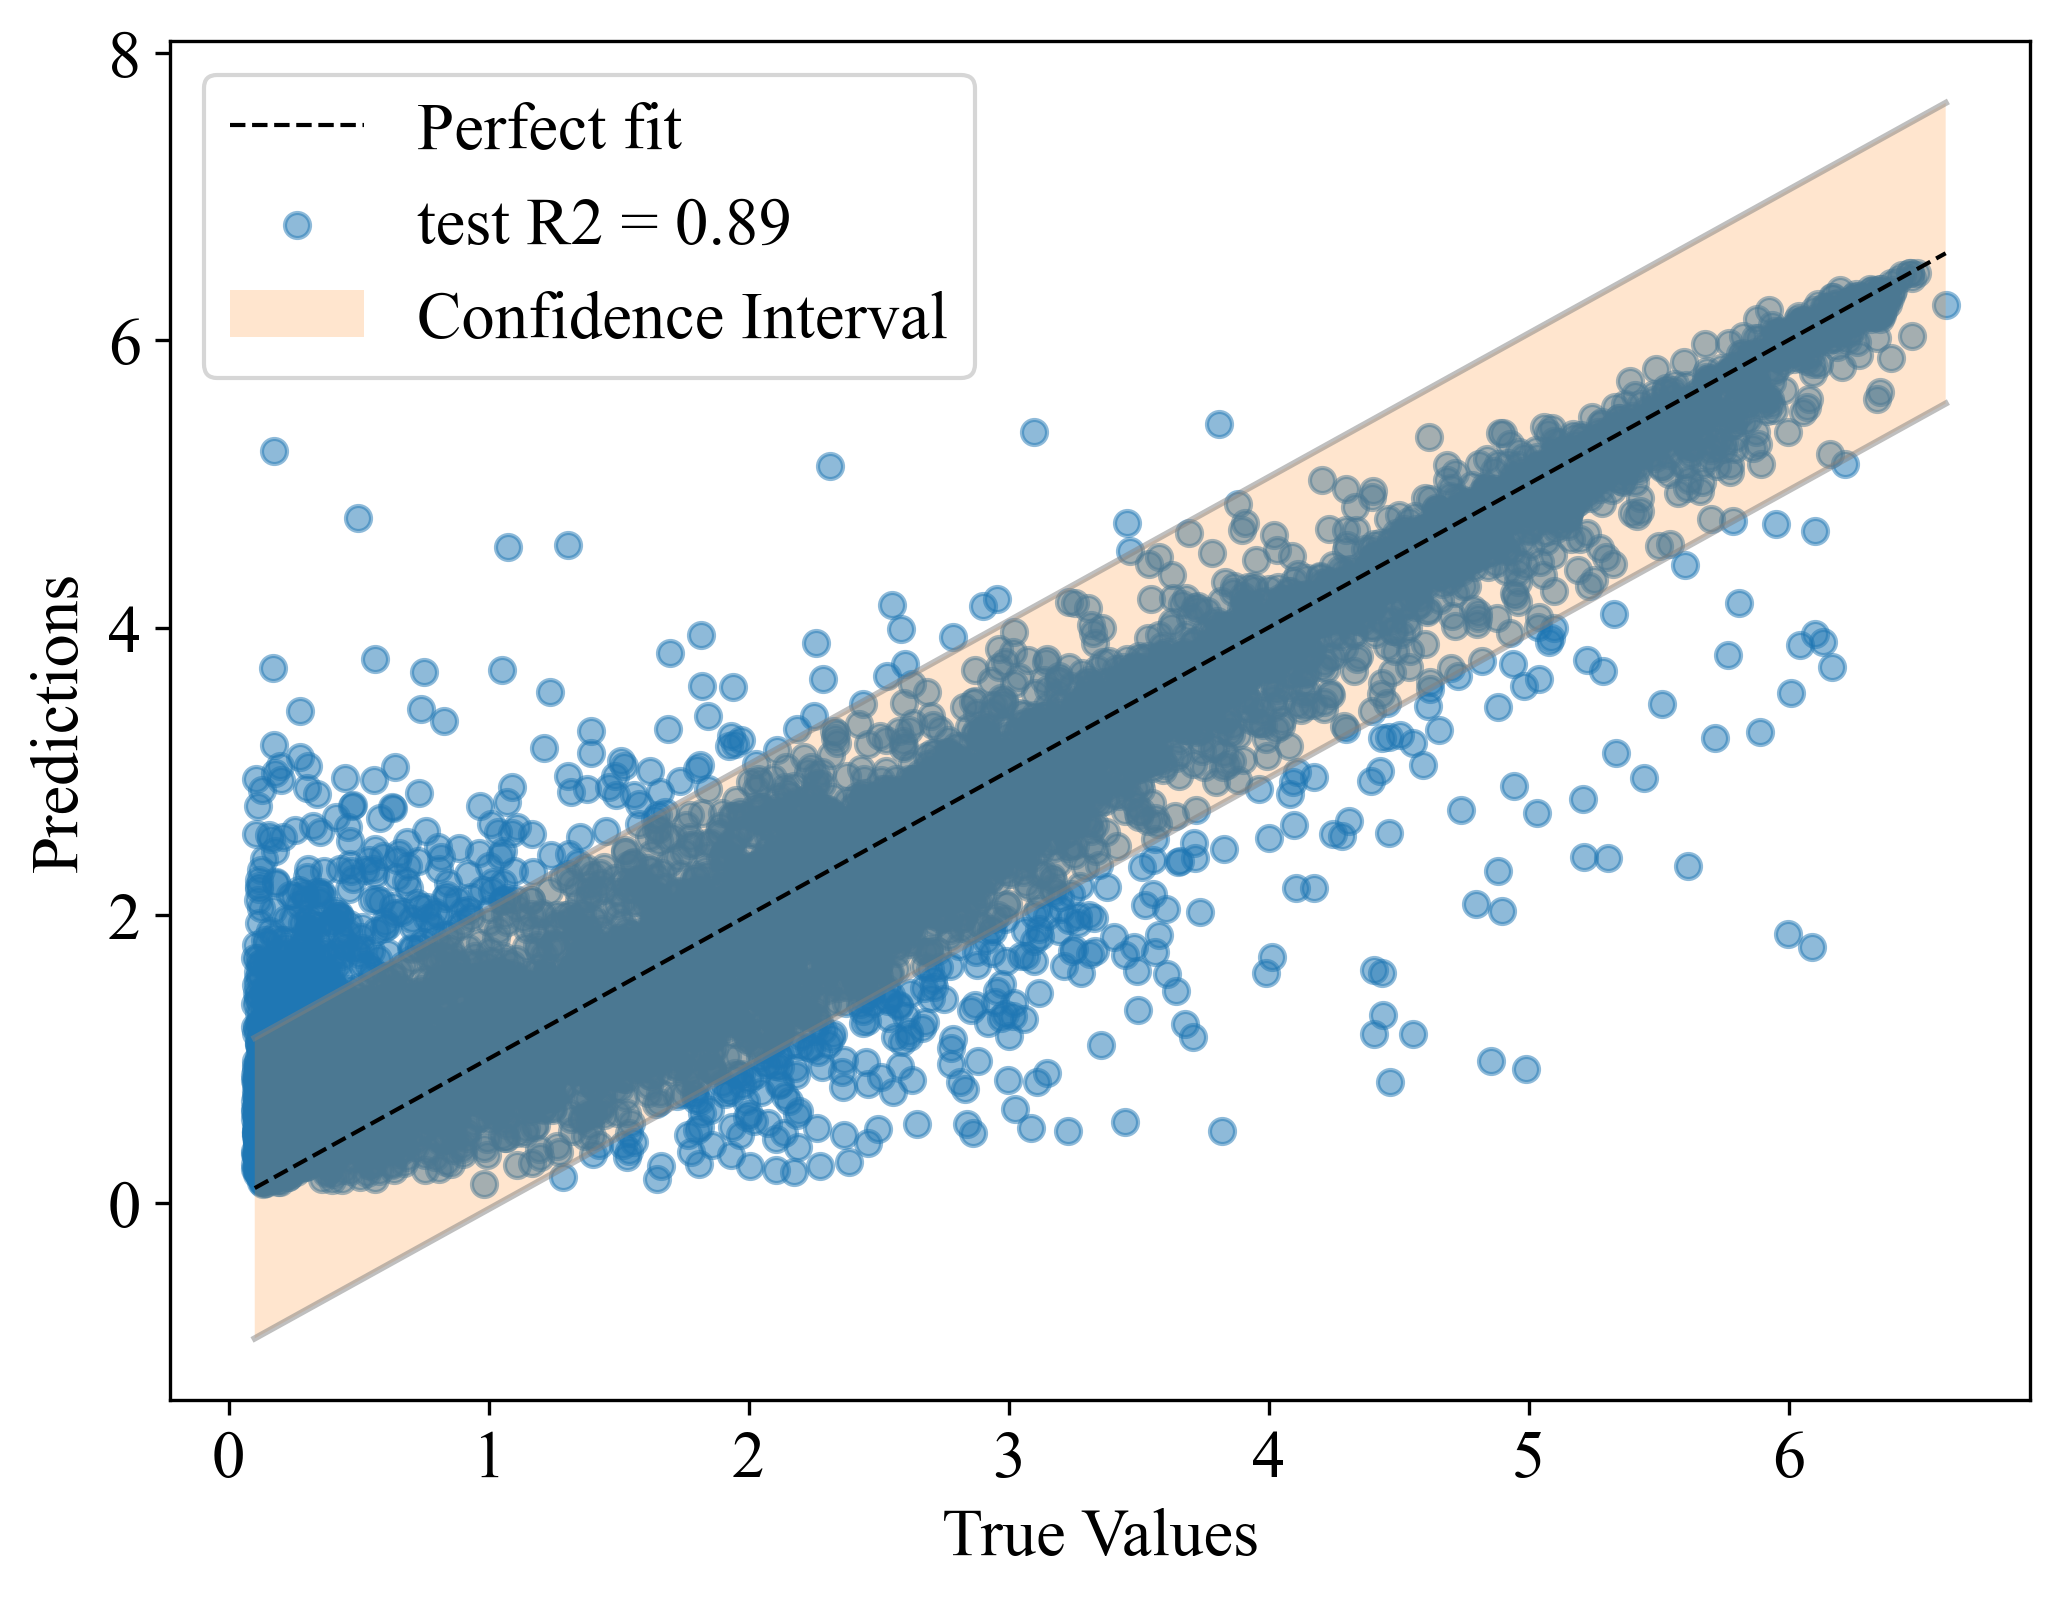

In [286]:
#plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, label = f'test R2 = {r2_test:.2f}')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1, label=f'Perfect fit')

residuals = y_test - y_pred

plt.fill_between([y_test.min(), y_test.max()], np.array([y_test.min(), y_test.max()]) - 1.96 * residuals.std(), 
                 np.array([y_test.min(), y_test.max()]) + 1.96 * residuals.std(), alpha=0.2,label='Confidence Interval')

plt.plot([y_test.min(), y_test.max()], np.array([y_test.min(), y_test.max()]) - 1.96 * residuals.std(), '-', color='grey',alpha=0.5)
plt.plot([y_test.min(), y_test.max()], np.array([y_test.min(), y_test.max()]) + 1.96 * residuals.std(), '-', color='grey',alpha=0.5)
plt.legend()


textstr = f'R2 = {r2_test:.2f}\nMAE = {mae:.2f}\nRMSE = {rmse:.2f}'

bbox = dict(facecolor='white', edgecolor='grey', boxstyle='round,pad=0.3',alpha=0.2)
#plt.text(0.75, 0.15, textstr, transform=plt.gca().transAxes, fontsize=12, 
         #verticalalignment='top', bbox=bbox)

plt.xlabel('True Values')
plt.ylabel('Predictions')
#plt.title('Regression model')
plt.savefig('./figures/Regression_effect.png', dpi=300, bbox_inches='tight')
plt.show()

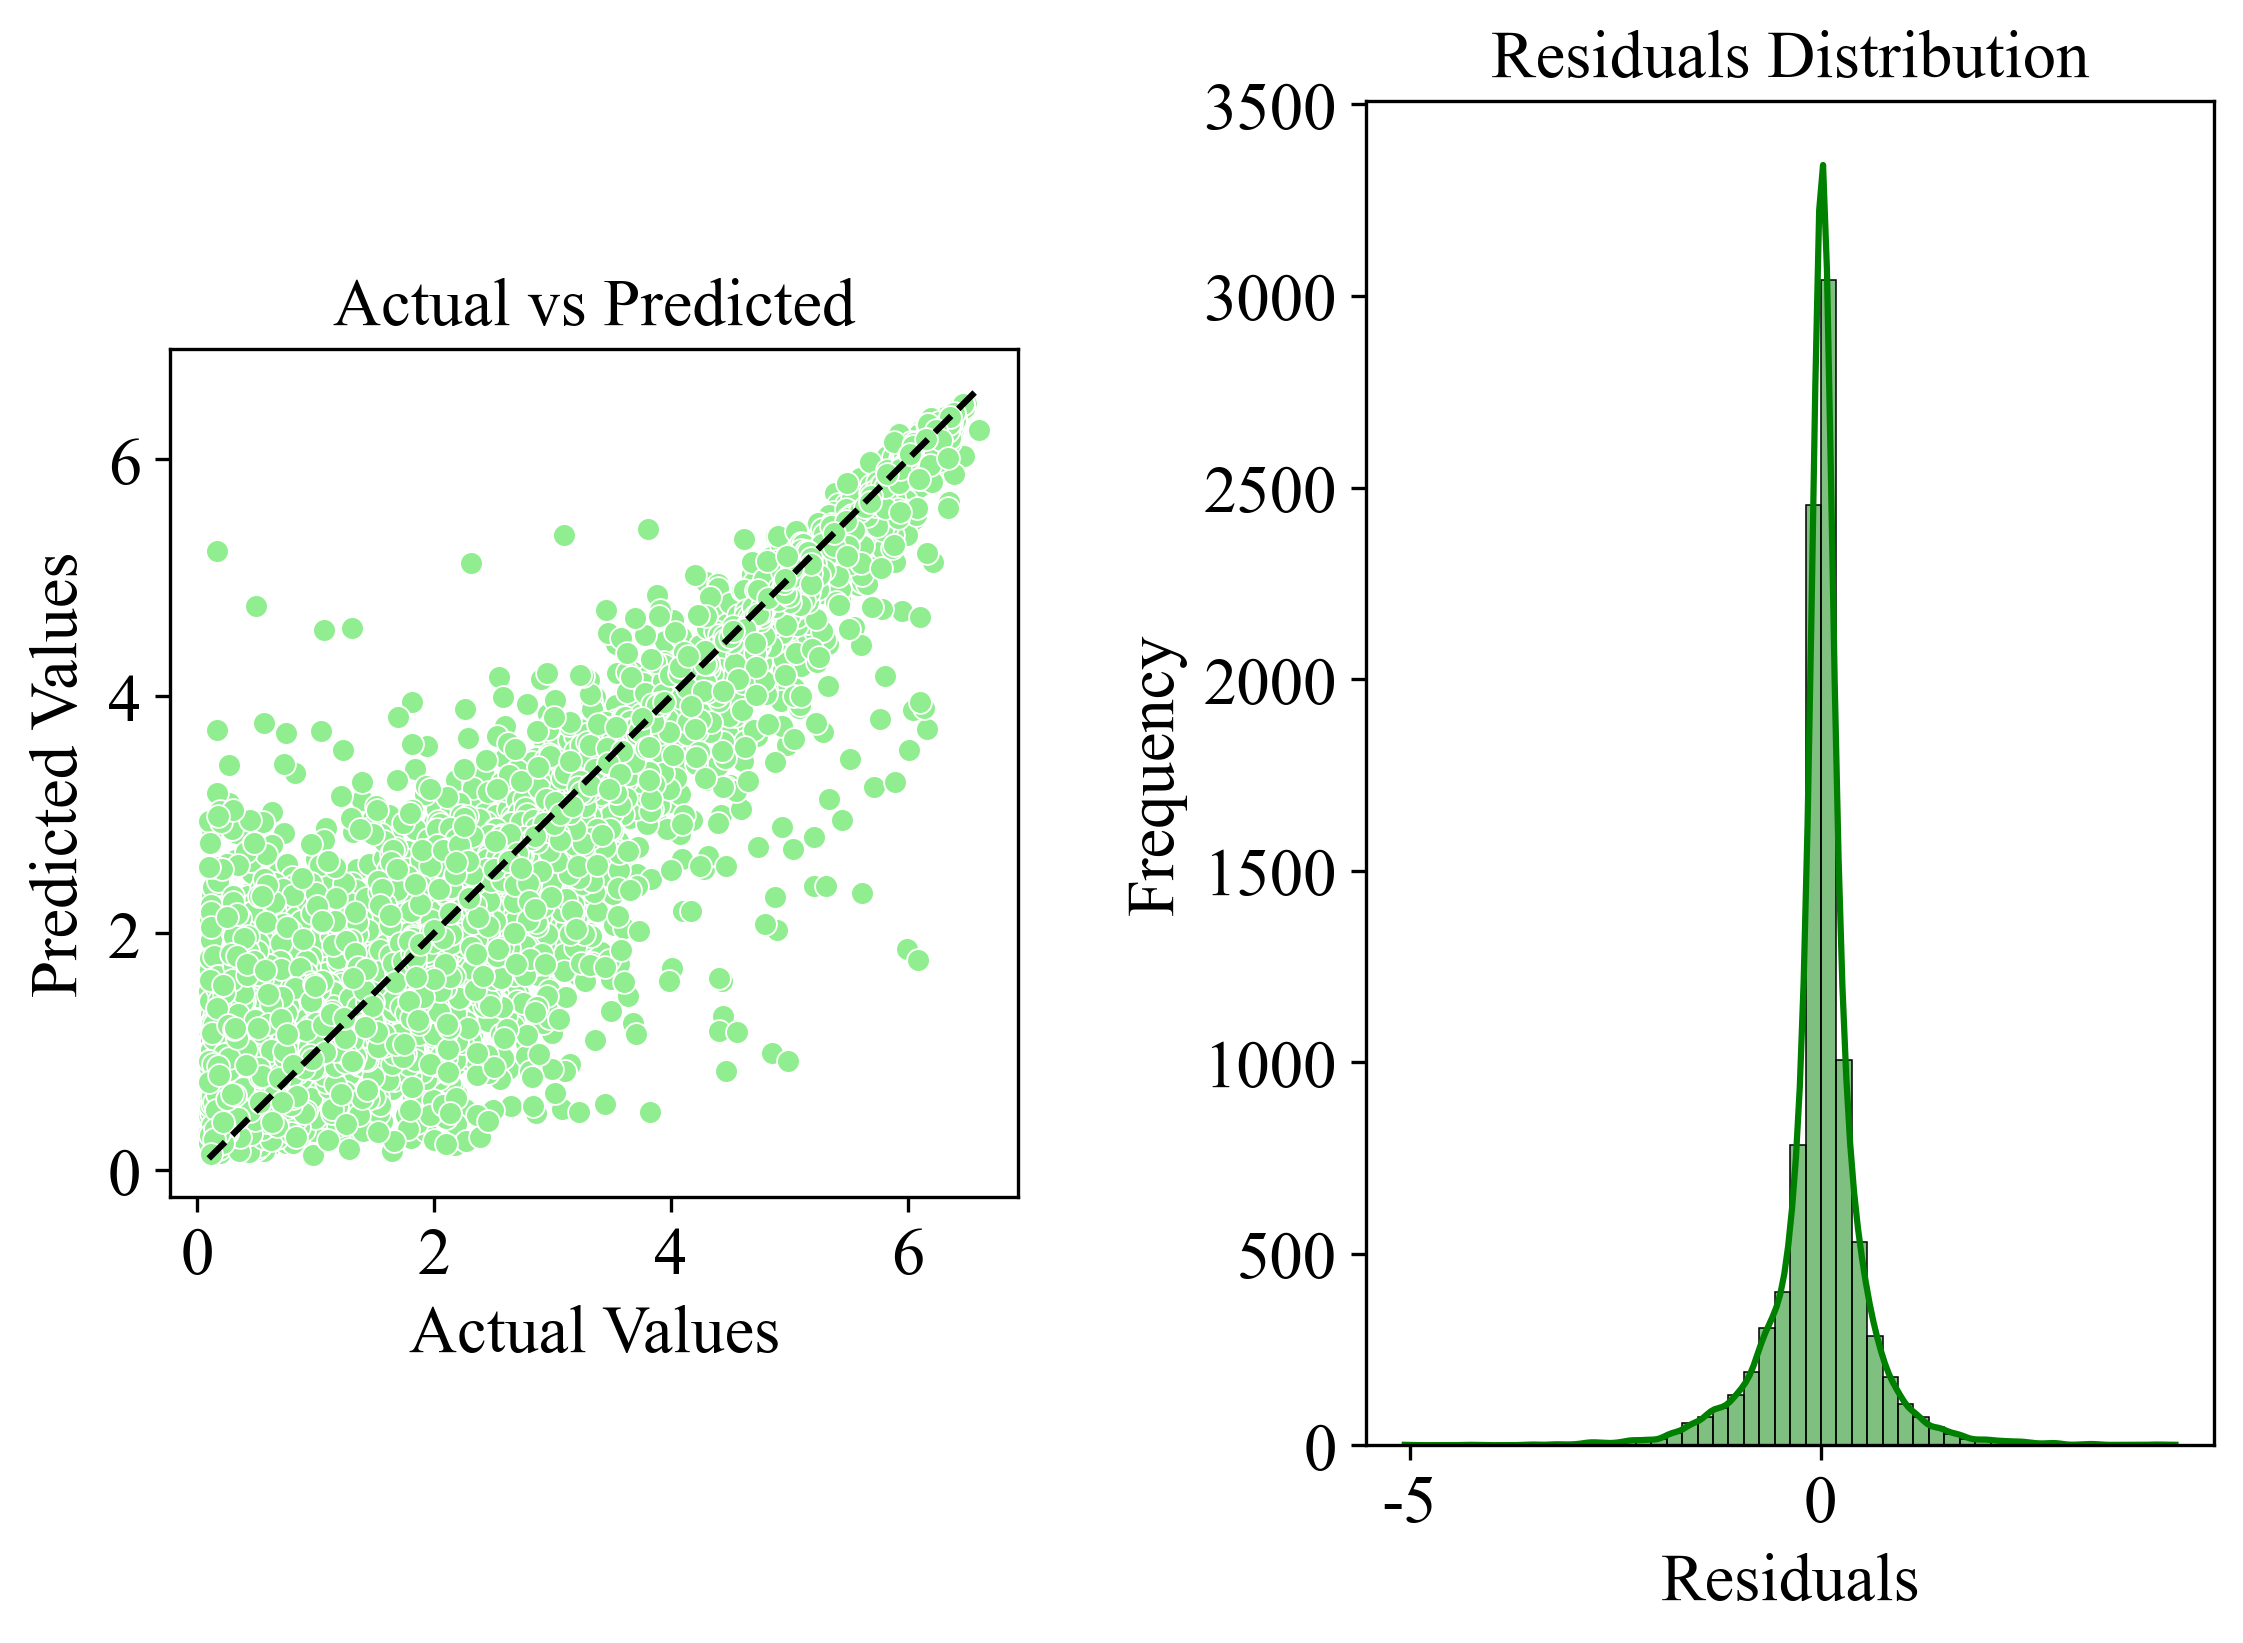

In [277]:
# 创建一个大的图表和子图
fig, axes = plt.subplots(1, 2)  

# 实际值与预测值对比图
sns.scatterplot(x=y_test, y=y_pred, ax=axes[0], color='lightgreen', s=30)
axes[0].set_title('Actual vs Predicted', fontsize=params['axes.titlesize']) 
axes[0].set_xlabel('Actual Values', fontsize=params['axes.labelsize'])  
axes[0].set_ylabel('Predicted Values', fontsize=params['axes.labelsize'])  
axes[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--')
axes[0].set_aspect('equal', 'box')
axes[0].grid(False)  

# 误差分布图
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, ax=axes[1], color='green', bins=50)
axes[1].set_title('Residuals Distribution',fontsize=params['axes.titlesize'])
axes[1].set_xlabel('Residuals', fontsize=params['axes.labelsize'])
axes[1].set_ylabel('Frequency', fontsize=params['axes.labelsize'])
axes[1].grid(False) 

plt.tight_layout()
plt.show()

In [138]:
X_val = df_Val.iloc[:, 4:]
y_val = df_Val['target']
print(X_val.shape)
print(y_val.shape)

(19, 6)
(19,)


In [139]:
y_pred = ETR.predict(X_val)
print(f'R2:{r2_score(y_val,y_pred)}')
print(f'MAE:{mean_absolute_error(y_val,y_pred)}')
print(f'rmse: {sqrt(mean_squared_error(y_val, y_pred))}')

R2:0.8894771825285948
MAE:0.5269971640024781
rmse: 0.6619518978964545


In [140]:
formula = df_Val['formula']
data_dict = {'formula': formula, 'y_val': y_val, 'y_pred': y_pred}
df_c1 = pd.DataFrame(data_dict)
df_c1

formula     y_val    y_pred
0   CsSrCl3  6.254735  6.165326
1   RbEuCl3  1.672559  0.160313
2   CsCaBr3  5.729195  5.539768
3   CsEuCl3  1.674355  0.354548
4   RbPbCl3  2.962986  2.242047
5    RbGeI3  1.006948  1.452319
6    CsPbI3  1.903129  1.054968
7   RbSrCl3  5.914542  5.496801
8   RbCuBr3  0.592188  0.871932
9   CsCaCl3  6.765173  6.244948
10  CsPbBr3  2.478341  1.438576
11  RbCaBr3  5.295649  5.424111
12  CsSnCl3  1.937214  1.668385
13  CsCdBr3  1.854566  2.210322
14  CsCdCl3  3.052211  3.449281
15  CsGeBr3  1.168093  1.543911
16  CsPbCl3  2.864395  2.103677
17  CsSnBr3  1.002063  1.002234
18   CsSnI3  0.763360  1.106648

In [141]:
df_val

formula  y_val  y_pred
0   RbFeCl3      0       0
1   CsTmCl3      0       0
2   RbPdCl3      0       0
3   CsPdCl3      0       0
8   CsYbCl3      1       0
13  CsPdBr3      1       0
15  CsYbBr3      1       0
23  CsHgBr3      0       0
24  CsHgCl3      1       0

In [162]:
#这里对这个表中四个错误的1值修改掉
df_val2 = data_val[data_val['formula'].str.contains('RbFeCl3|CsTmCl3|RbPdCl3|CsPdCl3|CsYbCl3|CsPdBr3|CsYbBr3|CsHgBr3|CsHgCl3', case=False, na=False)]
df_val2

formula    target  B_Density  B_dipole Polarizability  B_number  \
0   RbFeCl3  0.000000       7.87                    62.00        26   
1   CsTmCl3  0.000000       9.32                   144.00        69   
2   RbPdCl3  0.000000      12.00                    26.14        46   
3   CsPdCl3  0.000000      12.00                    26.14        46   
8   CsYbCl3  6.628890       6.97                   139.00        70   
13  CsPdBr3  0.890561      12.00                    26.14        46   
15  CsYbBr3  5.564464       6.97                   139.00        70   
23  CsHgBr3  0.000000      13.50                    33.91        80   
24  CsHgCl3  0.532680      13.50                    33.91        80   

    avg ionic char  not_metal  
0         0.141365          0  
1         0.164389          0  
2         0.129320          0  
3         0.130894          0  
8         0.169945          1  
13        0.114826          1  
15        0.153442          1  
23        0.119979          0  
24        0.137073          1

In [163]:
df_val2 = df_val2.rename(columns={'target': 'y_val'})
df_val2['y_pred'] = 0
df_val2 = df_val2[['formula','y_val','y_pred']]
df_val2

formula     y_val  y_pred
0   RbFeCl3  0.000000       0
1   CsTmCl3  0.000000       0
2   RbPdCl3  0.000000       0
3   CsPdCl3  0.000000       0
8   CsYbCl3  6.628890       0
13  CsPdBr3  0.890561       0
15  CsYbBr3  5.564464       0
23  CsHgBr3  0.000000       0
24  CsHgCl3  0.532680       0

In [164]:
df_ETR = pd.concat([df_val2, df_c1], axis=0).reset_index(drop=True)
df_ETR

formula     y_val    y_pred
0   RbFeCl3  0.000000  0.000000
1   CsTmCl3  0.000000  0.000000
2   RbPdCl3  0.000000  0.000000
3   CsPdCl3  0.000000  0.000000
4   CsYbCl3  6.628890  0.000000
5   CsPdBr3  0.890561  0.000000
6   CsYbBr3  5.564464  0.000000
7   CsHgBr3  0.000000  0.000000
8   CsHgCl3  0.532680  0.000000
9   CsSrCl3  6.254735  6.165326
10  RbEuCl3  1.672559  0.160313
11  CsCaBr3  5.729195  5.539768
12  CsEuCl3  1.674355  0.354548
13  RbPbCl3  2.962986  2.242047
14   RbGeI3  1.006948  1.452319
15   CsPbI3  1.903129  1.054968
16  RbSrCl3  5.914542  5.496801
17  RbCuBr3  0.592188  0.871932
18  CsCaCl3  6.765173  6.244948
19  CsPbBr3  2.478341  1.438576
20  RbCaBr3  5.295649  5.424111
21  CsSnCl3  1.937214  1.668385
22  CsCdBr3  1.854566  2.210322
23  CsCdCl3  3.052211  3.449281
24  CsGeBr3  1.168093  1.543911
25  CsPbCl3  2.864395  2.103677
26  CsSnBr3  1.002063  1.002234
27   CsSnI3  0.763360  1.106648

In [165]:
df_ETR = df_ETR.drop(index=[4,6]).reset_index(drop=True)
df_ETR

formula     y_val    y_pred
0   RbFeCl3  0.000000  0.000000
1   CsTmCl3  0.000000  0.000000
2   RbPdCl3  0.000000  0.000000
3   CsPdCl3  0.000000  0.000000
4   CsPdBr3  0.890561  0.000000
5   CsHgBr3  0.000000  0.000000
6   CsHgCl3  0.532680  0.000000
7   CsSrCl3  6.254735  6.165326
8   RbEuCl3  1.672559  0.160313
9   CsCaBr3  5.729195  5.539768
10  CsEuCl3  1.674355  0.354548
11  RbPbCl3  2.962986  2.242047
12   RbGeI3  1.006948  1.452319
13   CsPbI3  1.903129  1.054968
14  RbSrCl3  5.914542  5.496801
15  RbCuBr3  0.592188  0.871932
16  CsCaCl3  6.765173  6.244948
17  CsPbBr3  2.478341  1.438576
18  RbCaBr3  5.295649  5.424111
19  CsSnCl3  1.937214  1.668385
20  CsCdBr3  1.854566  2.210322
21  CsCdCl3  3.052211  3.449281
22  CsGeBr3  1.168093  1.543911
23  CsPbCl3  2.864395  2.103677
24  CsSnBr3  1.002063  1.002234
25   CsSnI3  0.763360  1.106648

In [283]:
df_ETR.to_csv('./Data/26forecast.csv',index = False)

In [166]:
y_pred = df_ETR['y_pred']
y_val = df_ETR['y_val']
print(f'R2:{r2_score(y_val,y_pred)}')
print(f'MAE:{mean_absolute_error(y_val,y_pred)}')
print(f'rmse: {sqrt(mean_squared_error(y_val, y_pred))}')

R2:0.9168034722049309
MAE:0.43985333222338563
rmse: 0.6013533459163577


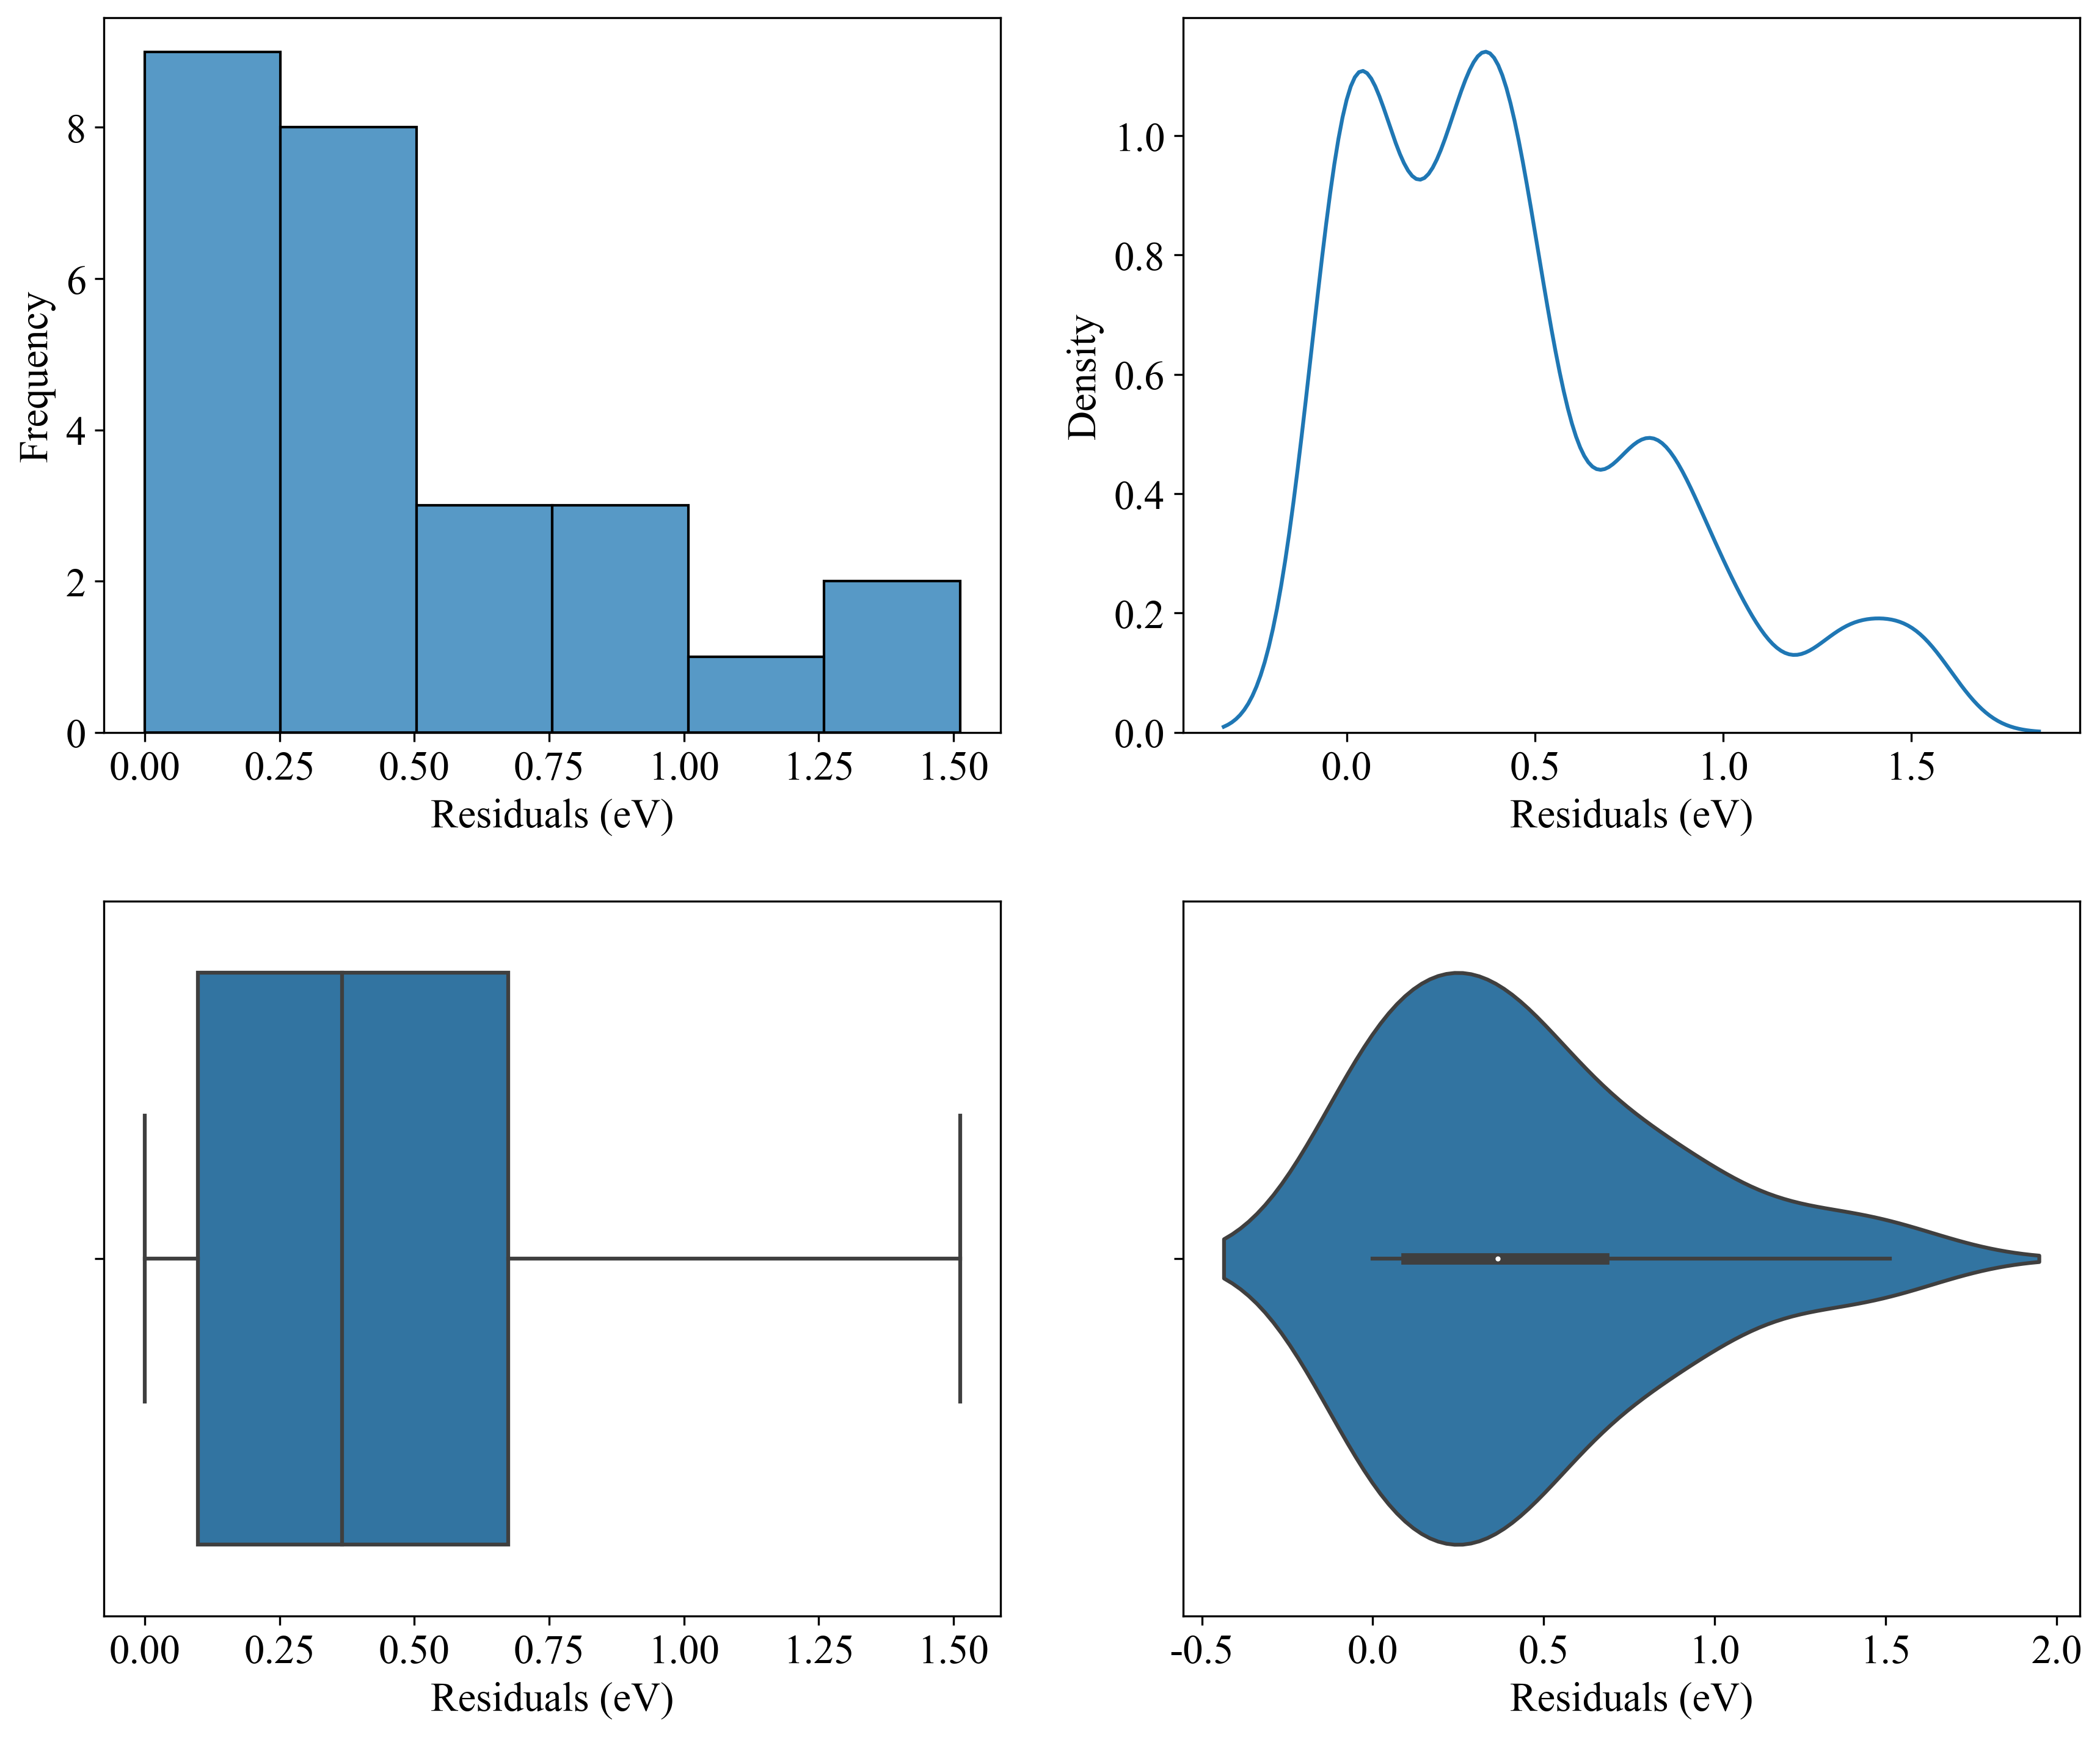

In [167]:
error = np.abs(y_val - y_pred)

# 创建一个图和子图
fig, axes = plt.subplots(2, 2, figsize=(12, 10), facecolor='white')

# 第一个子图：直方图
sns.histplot(error, kde=False, ax=axes[0, 0])
axes[0, 0].set_xlabel('Residuals (eV)', fontsize=params['axes.labelsize'])
axes[0, 0].set_ylabel('Frequency', fontsize=params['axes.labelsize'])

# 第二个子图：核密度估计图
sns.kdeplot(error, bw_adjust=0.5, ax=axes[0, 1])
axes[0, 1].set_xlabel('Residuals (eV)', fontsize=params['axes.labelsize'])
axes[0, 1].set_ylabel('Density', fontsize=params['axes.labelsize'])

# 第三个子图：水平箱线图
sns.boxplot(error, orient='h', ax=axes[1, 0])
axes[1, 0].set_xlabel('Residuals (eV)', fontsize=params['axes.labelsize'])

# 第四个子图：小提琴图
sns.violinplot(error, orient='h', ax=axes[1, 1])
axes[1, 1].set_xlabel('Residuals (eV)', fontsize=params['axes.labelsize'])

# 调整子图之间的空间
plt.tight_layout()

# 显示图表
plt.show()

In [168]:
pd.DataFrame(np.abs(error)).describe()

0
count  26.000000
mean    0.439853
std     0.418188
min     0.000000
25%     0.099172
50%     0.365787
75%     0.673875
max     1.512246

# 下面补充几张图：

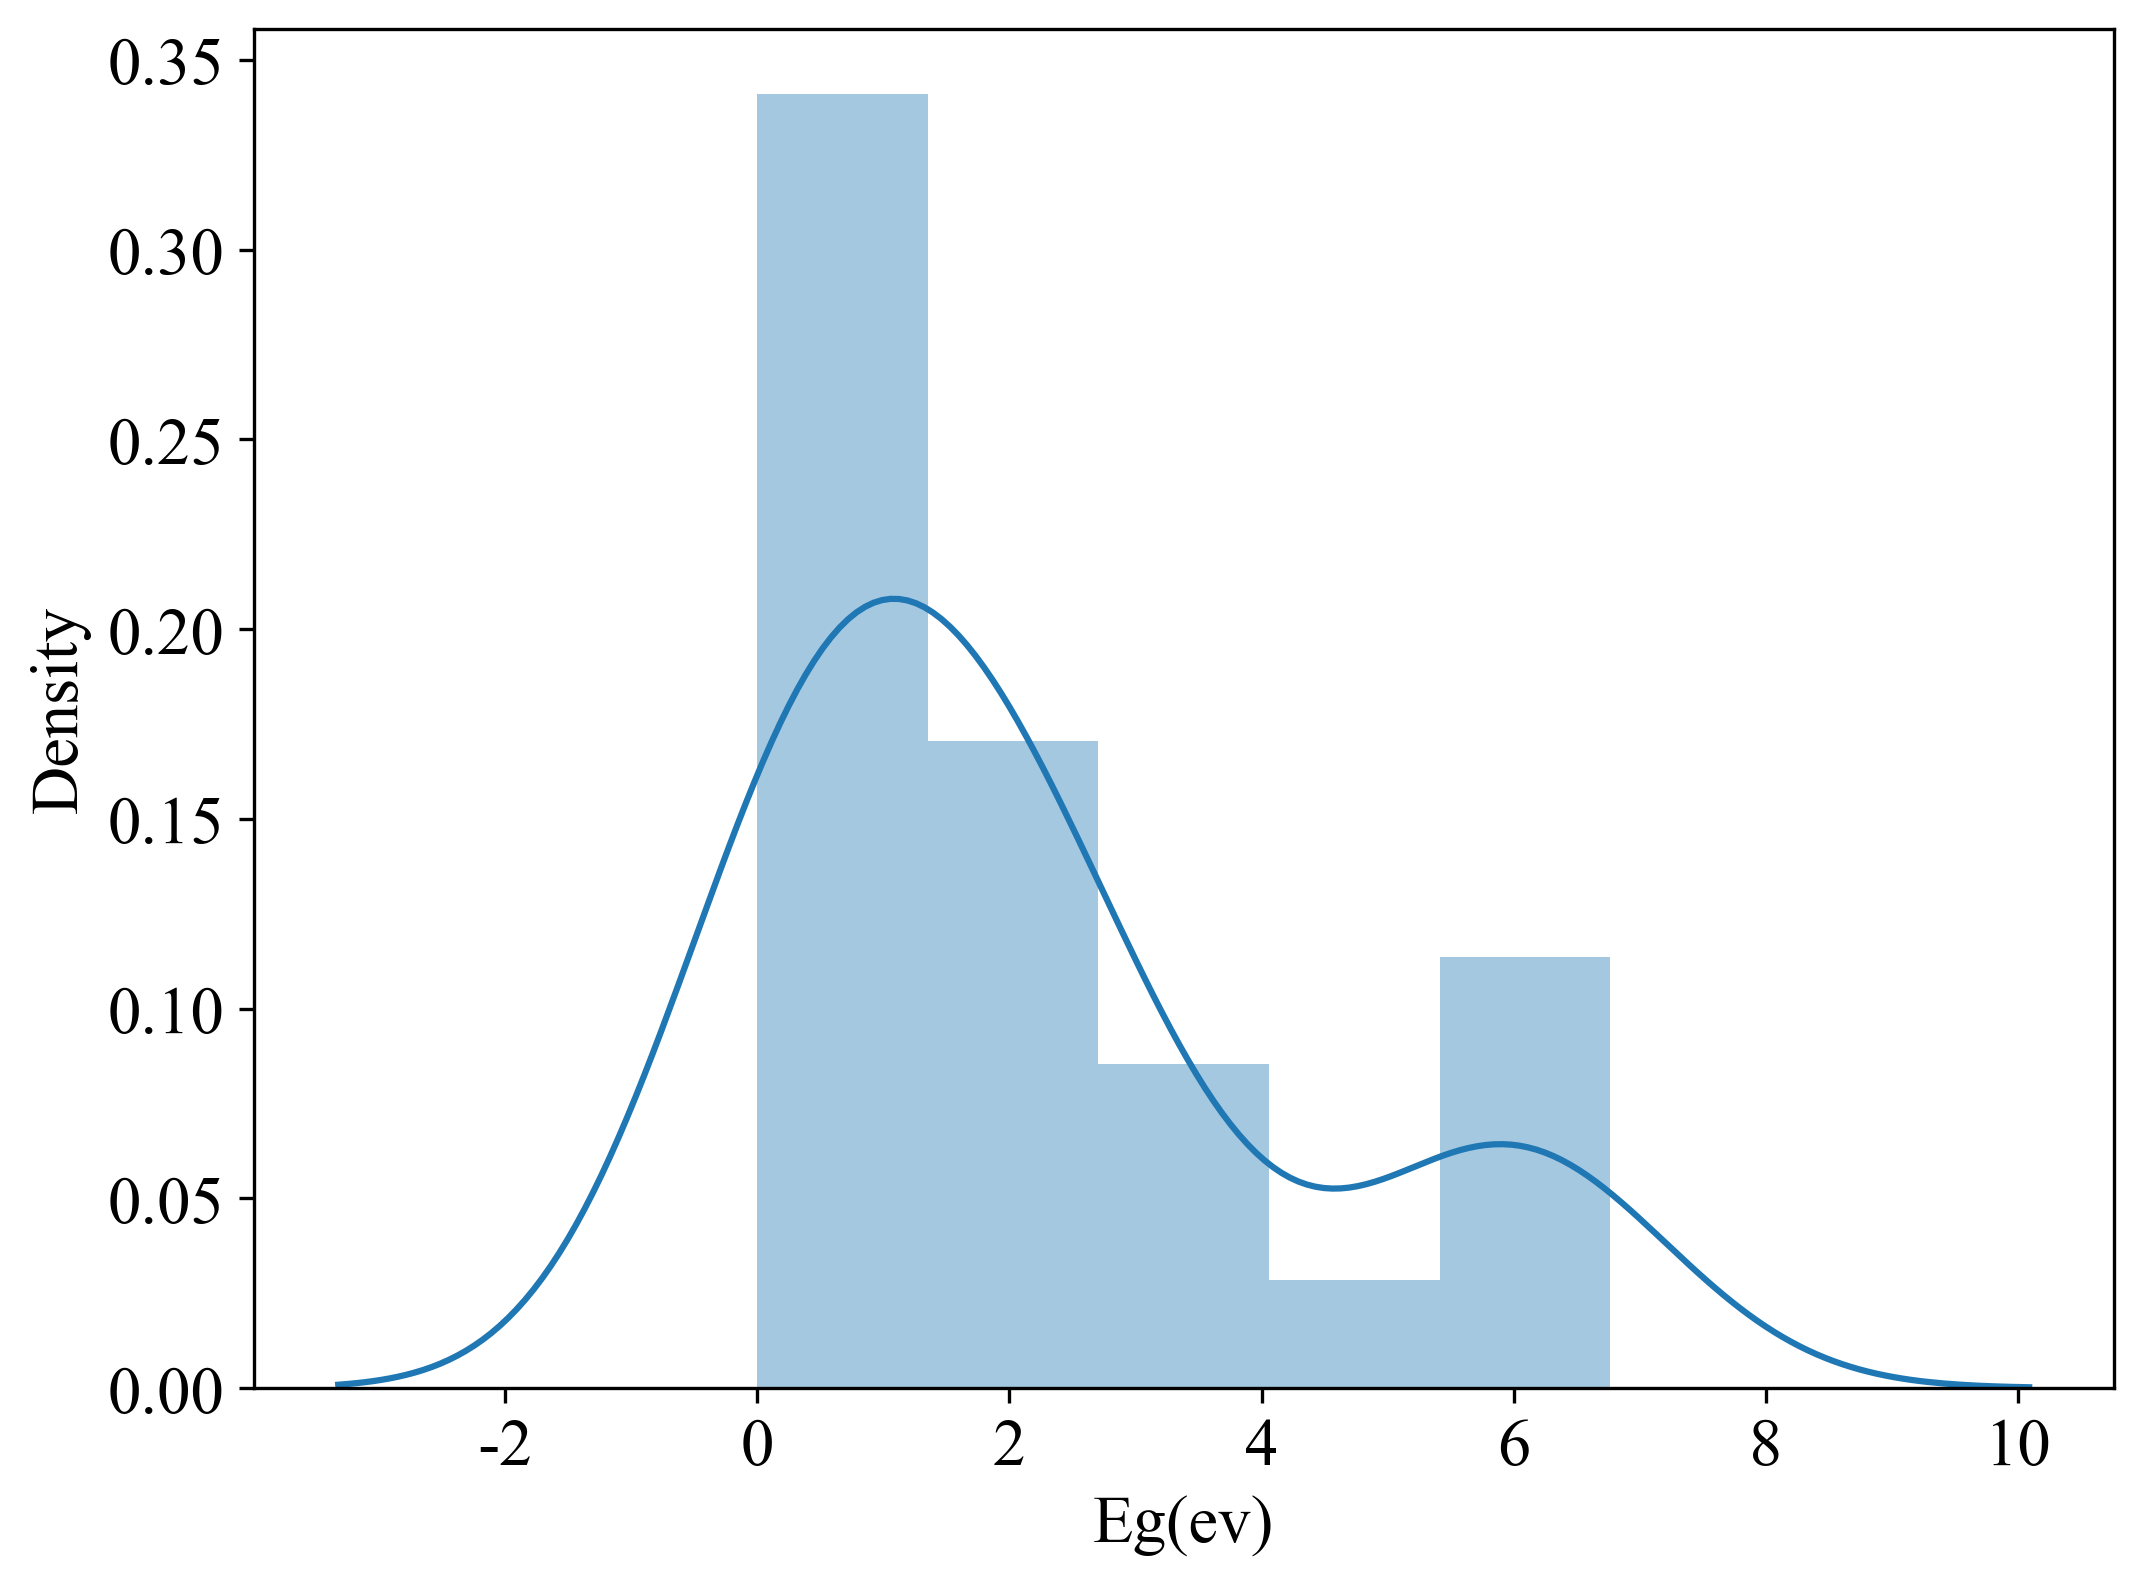

In [180]:
sns.distplot(df_ETR['y_val'])

plt.xlabel('Eg(ev)')
plt.savefig('./figures/28_Eg.png')

# 下面换成新带隙的ETR可解释：

In [217]:
def get_latex_feature_names(data):
    name_dict = {"A_covalent Radius": r'$ A^{\mathrm{CR}}$',
                 'A_Density':r'$ A^{\mathrm{D}}$',
                 'B_Density':r'$ B^{\mathrm{D}}$',
                 'A_Period': r'$ A^{\mathrm{P}}$',
                 'B_Period': r'$ B^{\mathrm{P}}$',
                 'A_number of Valence Electrons':r'$ A^{\mathrm{VE}}$',
                 'B_number of Valence Electrons':r'$ B^{\mathrm{VE}}$',
                 'A_Electronegativity':r'$ A^{\mathrm{En}}$',
                 'B_Electronegativity':r'$ B^{\mathrm{En}}$',
                 'B_Mulliken EN':r'$ B^{\mathrm{MEn}}$',
                'A_number of s+p Electrons': r'$ A^{\mathrm{s+p}}$',
                'B_number of s+p Electrons': r'$ B^{\mathrm{s+p}}$',
                 'A-B_Density':r'$ X_\mathrm{1}^{\mathrm{D}}$',
                '(A+B)-O_Density': r'$ X_\mathrm{2}^{\mathrm{D}}$',
                 '(A+B)-O_covalent Radius':r'$ X_\mathrm{2}^{\mathrm{CR}}$',
                 'A-B_covalent Radius':r'$ X_\mathrm{1}^{\mathrm{CR}}$',
                 '(A+B)-O_number of Valence Electrons':r'$ X_\mathrm{2}^{\mathrm{VE}}$',
                 'A-B_Electronegativity':r'$ X_\mathrm{1}^{\mathrm{En}}$',
                 'A-B_number of Valence Electrons':r'$ X_\mathrm{1}^{\mathrm{VE}}$',
                 'A-B_number':r'$ X_\mathrm{1}^{\mathrm{N}}$',
                 '(A+B)-O_Electronegativity':r'$ X_\mathrm{2}^{\mathrm{En}}$',
                 'A-B_number of d Electrons':r'$X_\mathrm{1}^{\mathrm{d}}$',
                 'A-B_number of s+p Electrons':r'$ X_\mathrm{1}^{\mathrm{s+p}}$',
                 '(A+B)-O_number of s+p Electrons':r'$ X_\mathrm{2}^{\mathrm{s+p}}$',
                  '(A+B)-O_number of d Electrons':r'$ X_\mathrm{2}^{\mathrm{D}}$',
                 'compound possible':"CP",
                 'max ionic char':'MIC',
                 'avg ionic char':'AIC',
                 'B_number':r'$ B^{\mathrm{num}}$',
                 'B_dipole Polarizability':r'$ B_d^{\mathrm{P}}$'
                }
    element_dict = {}
    for name in data.columns:
        if '_' not in name and len(name)<=2 :
            element_dict[name] = fr'${name}$'
    name_dict.update(element_dict)
    data = data.rename(columns=name_dict)
    return data

In [218]:
X_train = get_latex_feature_names(X_train)
X_test = get_latex_feature_names(X_test)

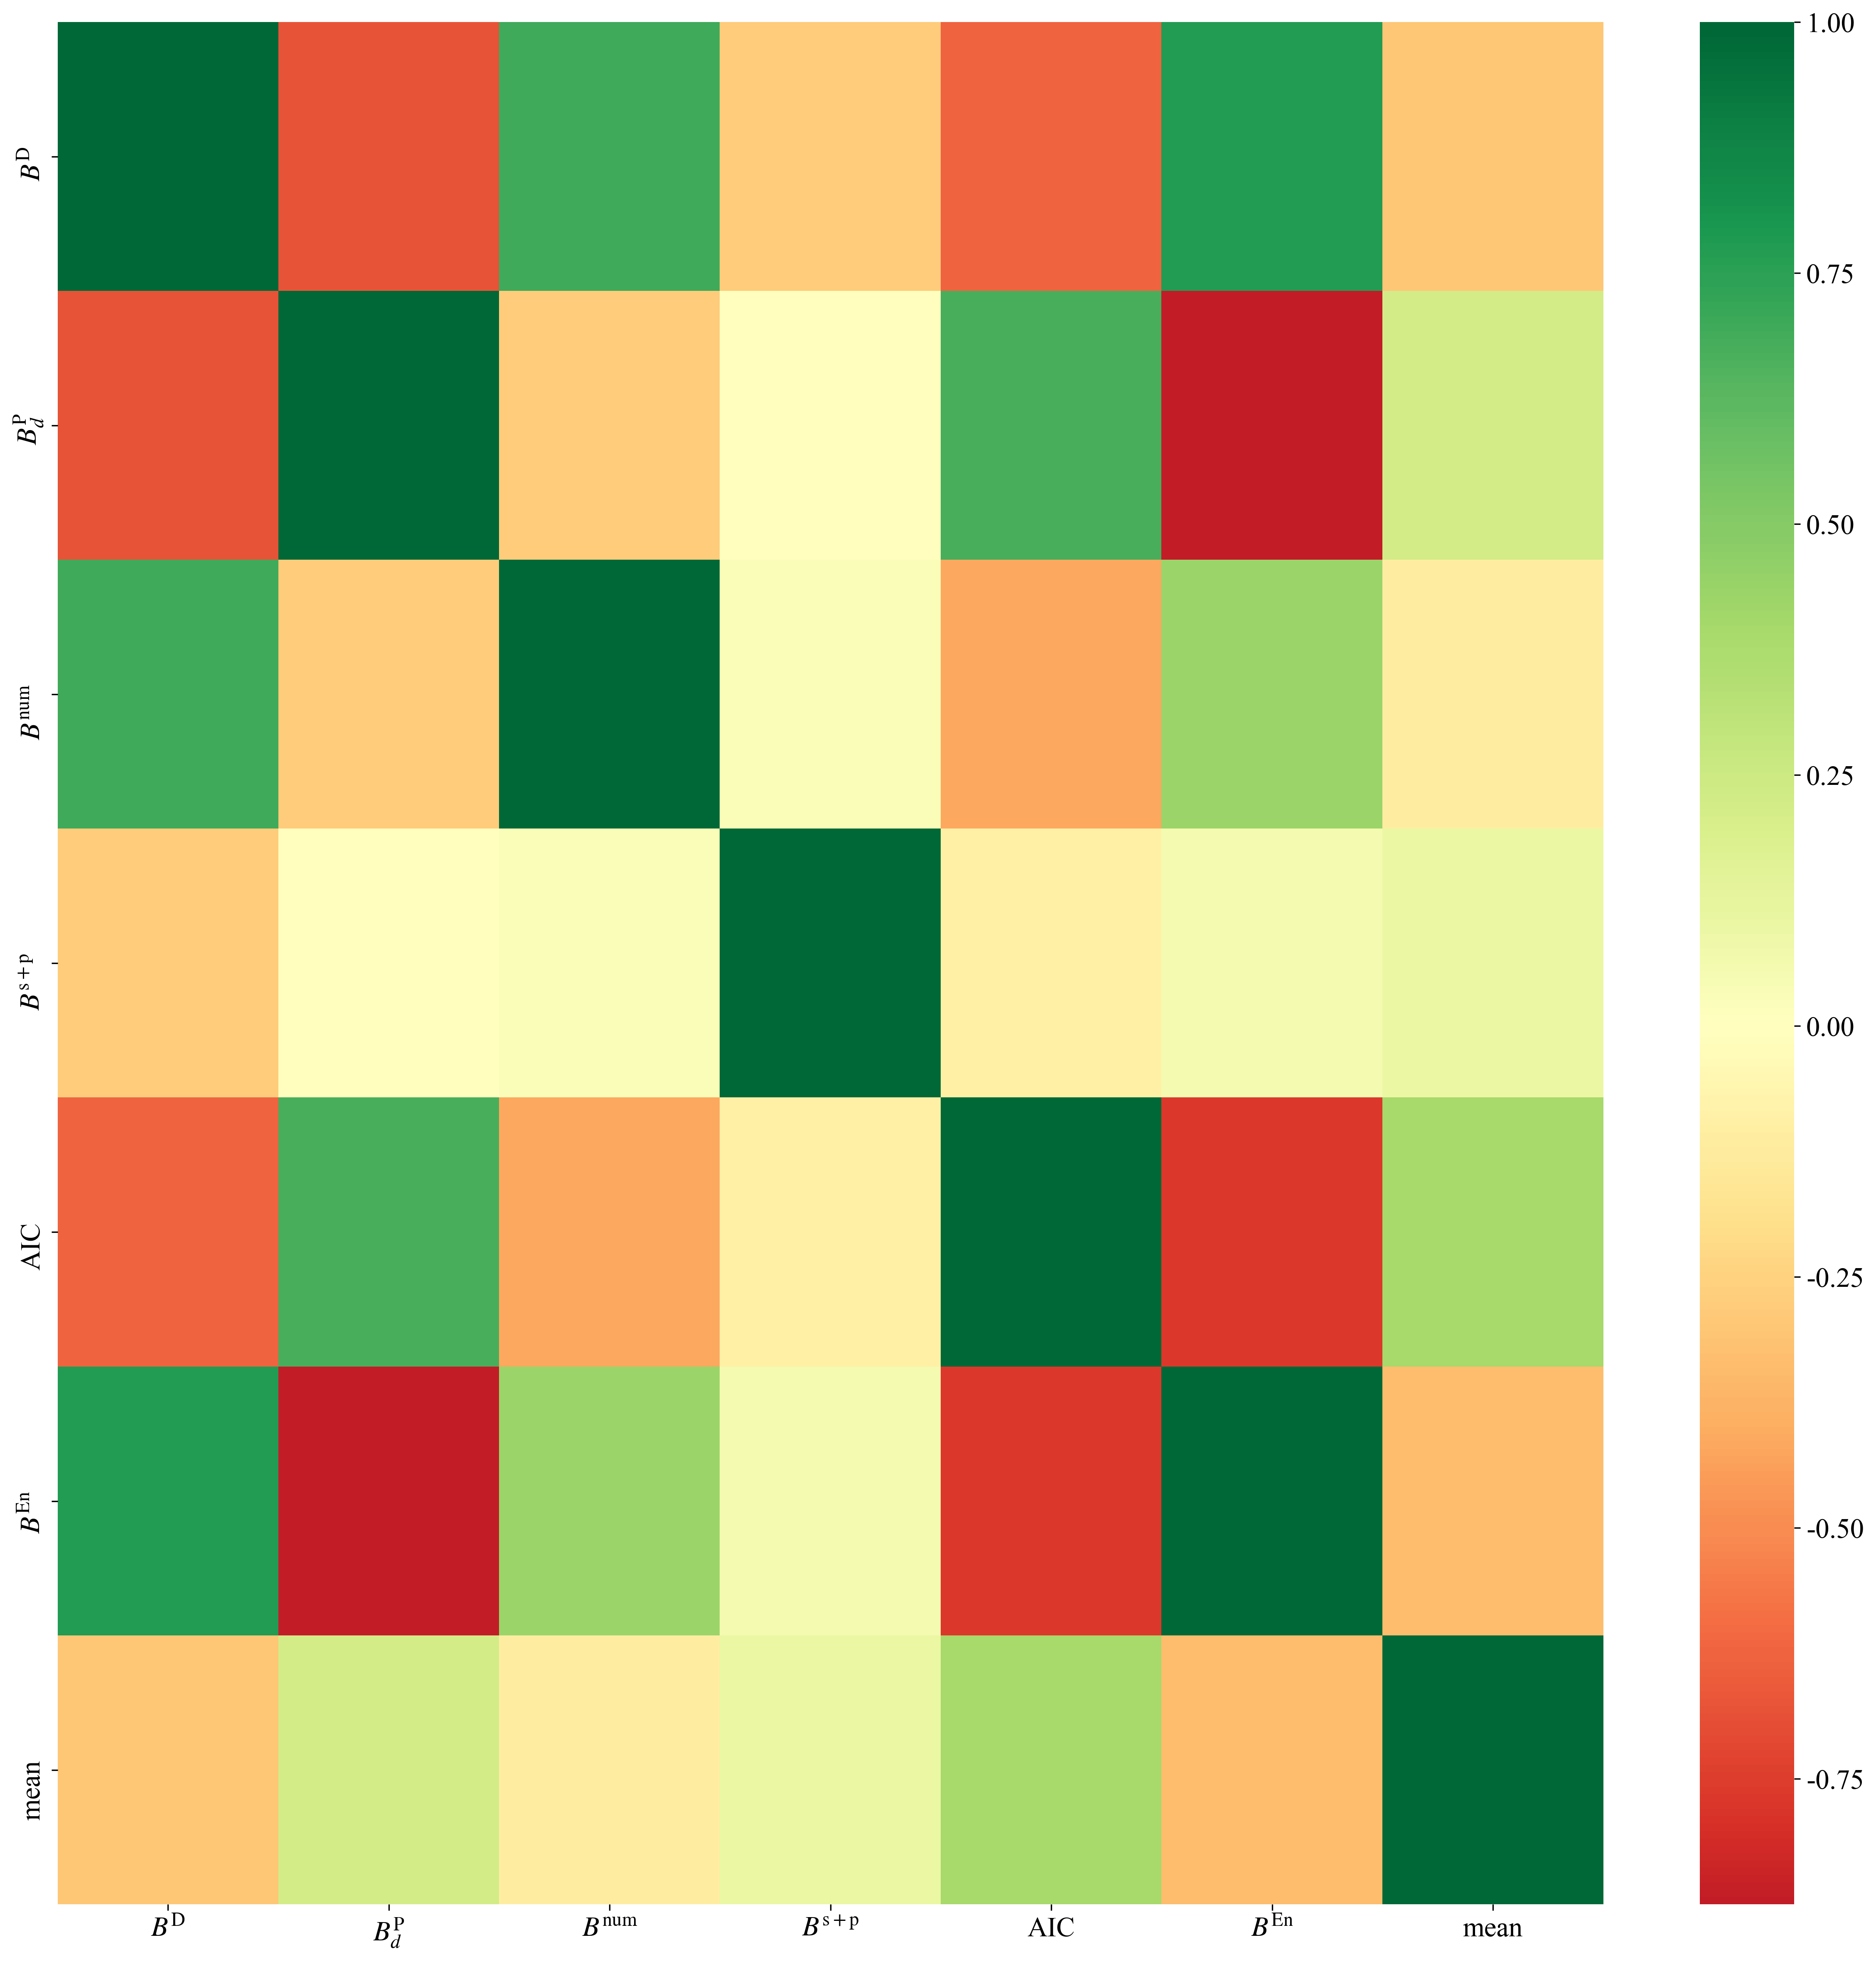

In [219]:
plt.figure(figsize=(20,20), dpi= 300)
sns.heatmap(pd.concat([X_train,y_train],axis=1).corr(method='spearman' ,min_periods=1), 
            cmap='RdYlGn', center=0, annot=False)
plt.show()

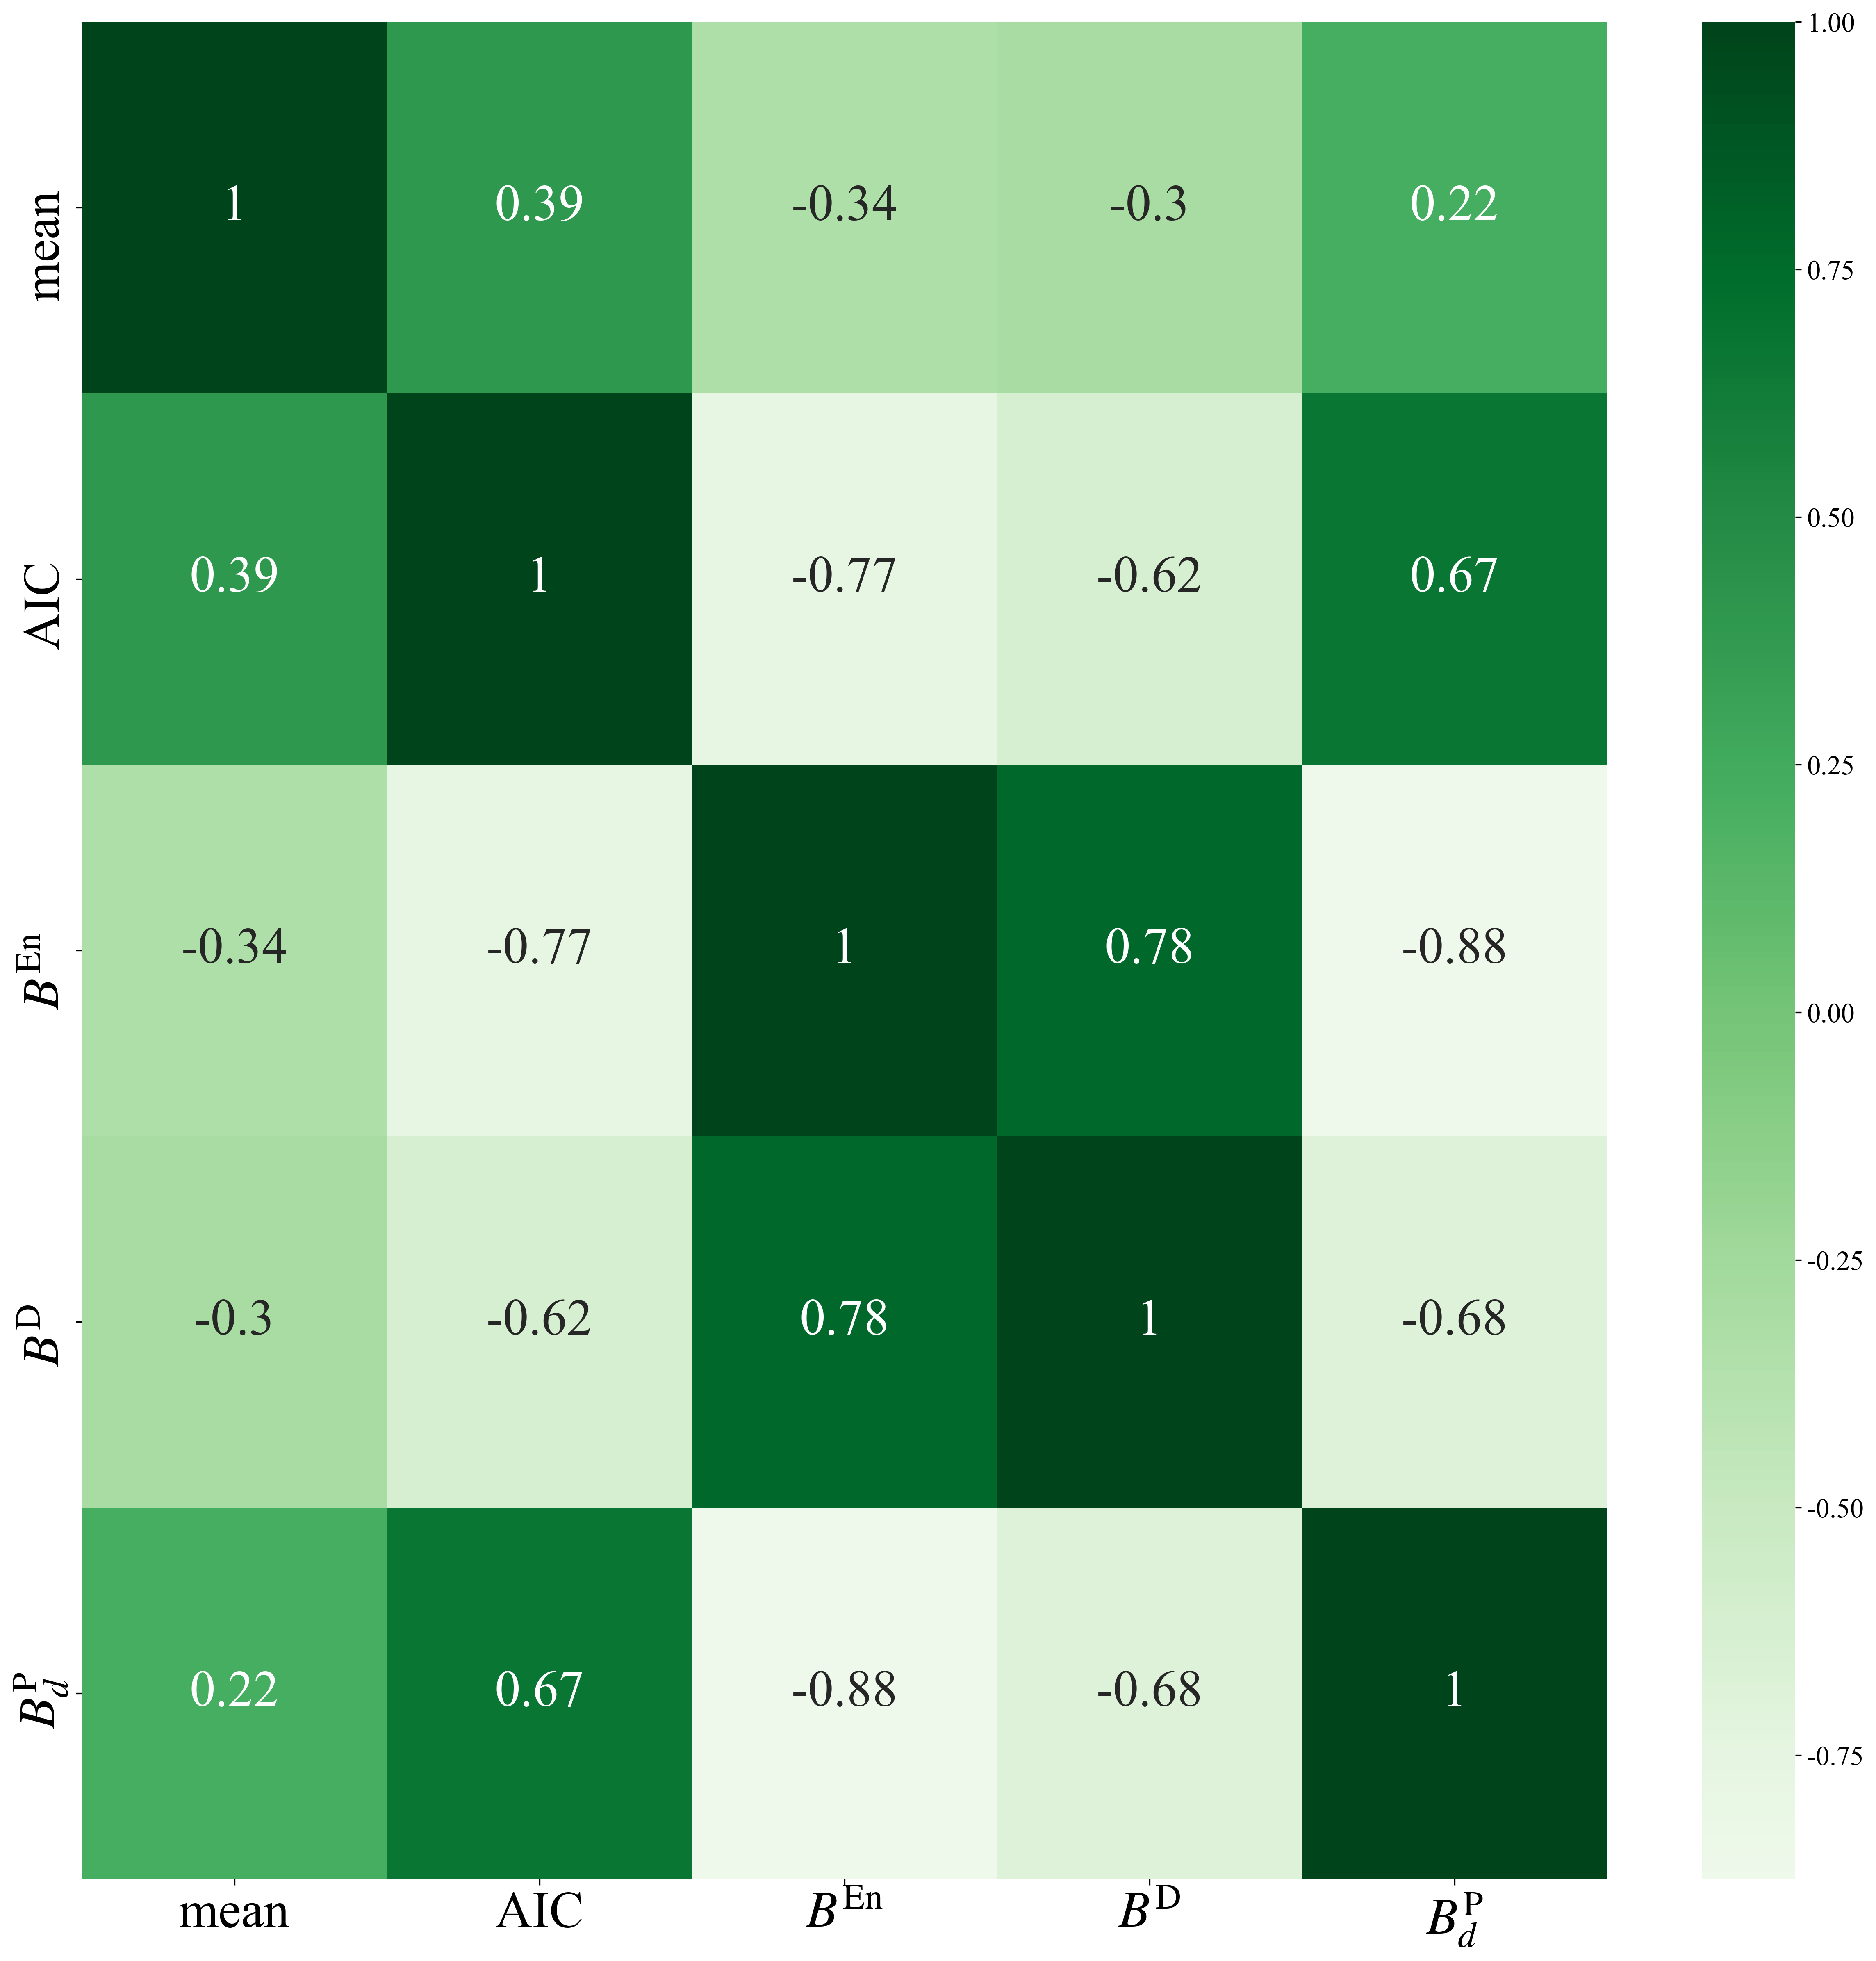

In [265]:
plt.figure(figsize=(20,20), dpi= 300)
corr = pd.concat([X_train,y_train],axis=1).corr(method='spearman' ,min_periods=1)
tmp = np.abs(corr['mean'])
to_plot = tmp.sort_values(ascending=False)[0:5]
sns.heatmap(corr.loc[to_plot.index, to_plot.index], cmap='Greens', center=0, annot=True, annot_kws={'size': 30})
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.savefig('./figures/6_feature_Correlation coefficient matrix.png')
plt.show()

In [208]:
from interpret import show
from interpret.perf import RegressionPerf
blackbox_model = ExtraTreesRegressor(n_jobs=-1,random_state=42)
blackbox_model.fit(X_train, y_train)
blackbox_perf = RegressionPerf(blackbox_model).explain_perf(X_test, y_test, name='Blackbox')
blackbox_perf.visualize()

In [209]:
y_pred = blackbox_model.predict(X_test)
print('Performance on the test set: MAE = %0.4f' % mean_absolute_error(y_test,y_pred))
print('Performance on the test set: RMSE = %0.4f' % np.sqrt(mean_squared_error(y_test, y_pred)))
print('Performance on the test set: R2 SCORE = %0.4f' % r2_score(y_test,y_pred))

Performance on the test set: MAE = 0.3171
Performance on the test set: RMSE = 0.5335
Performance on the test set: R2 SCORE = 0.8921


In [210]:
y_pred = blackbox_model.predict(X_train)
print('Performance on the train set: MAE = %0.4f' % mean_absolute_error(y_train,y_pred))
print('Performance on the train set: RMSE = %0.4f' % np.sqrt(mean_squared_error(y_train, y_pred)))
print('Performance on the train set: R2 SCORE = %0.4f' % r2_score(y_train,y_pred))

Performance on the train set: MAE = 0.0000
Performance on the train set: RMSE = 0.0000
Performance on the train set: R2 SCORE = 1.0000


In [221]:
from interpret.blackbox import MorrisSensitivity

sensitivity = MorrisSensitivity(blackbox_model, X_train)
sensitivity_global = sensitivity.explain_global(name="Global Sensitivity")

sensitivity_global.visualize()

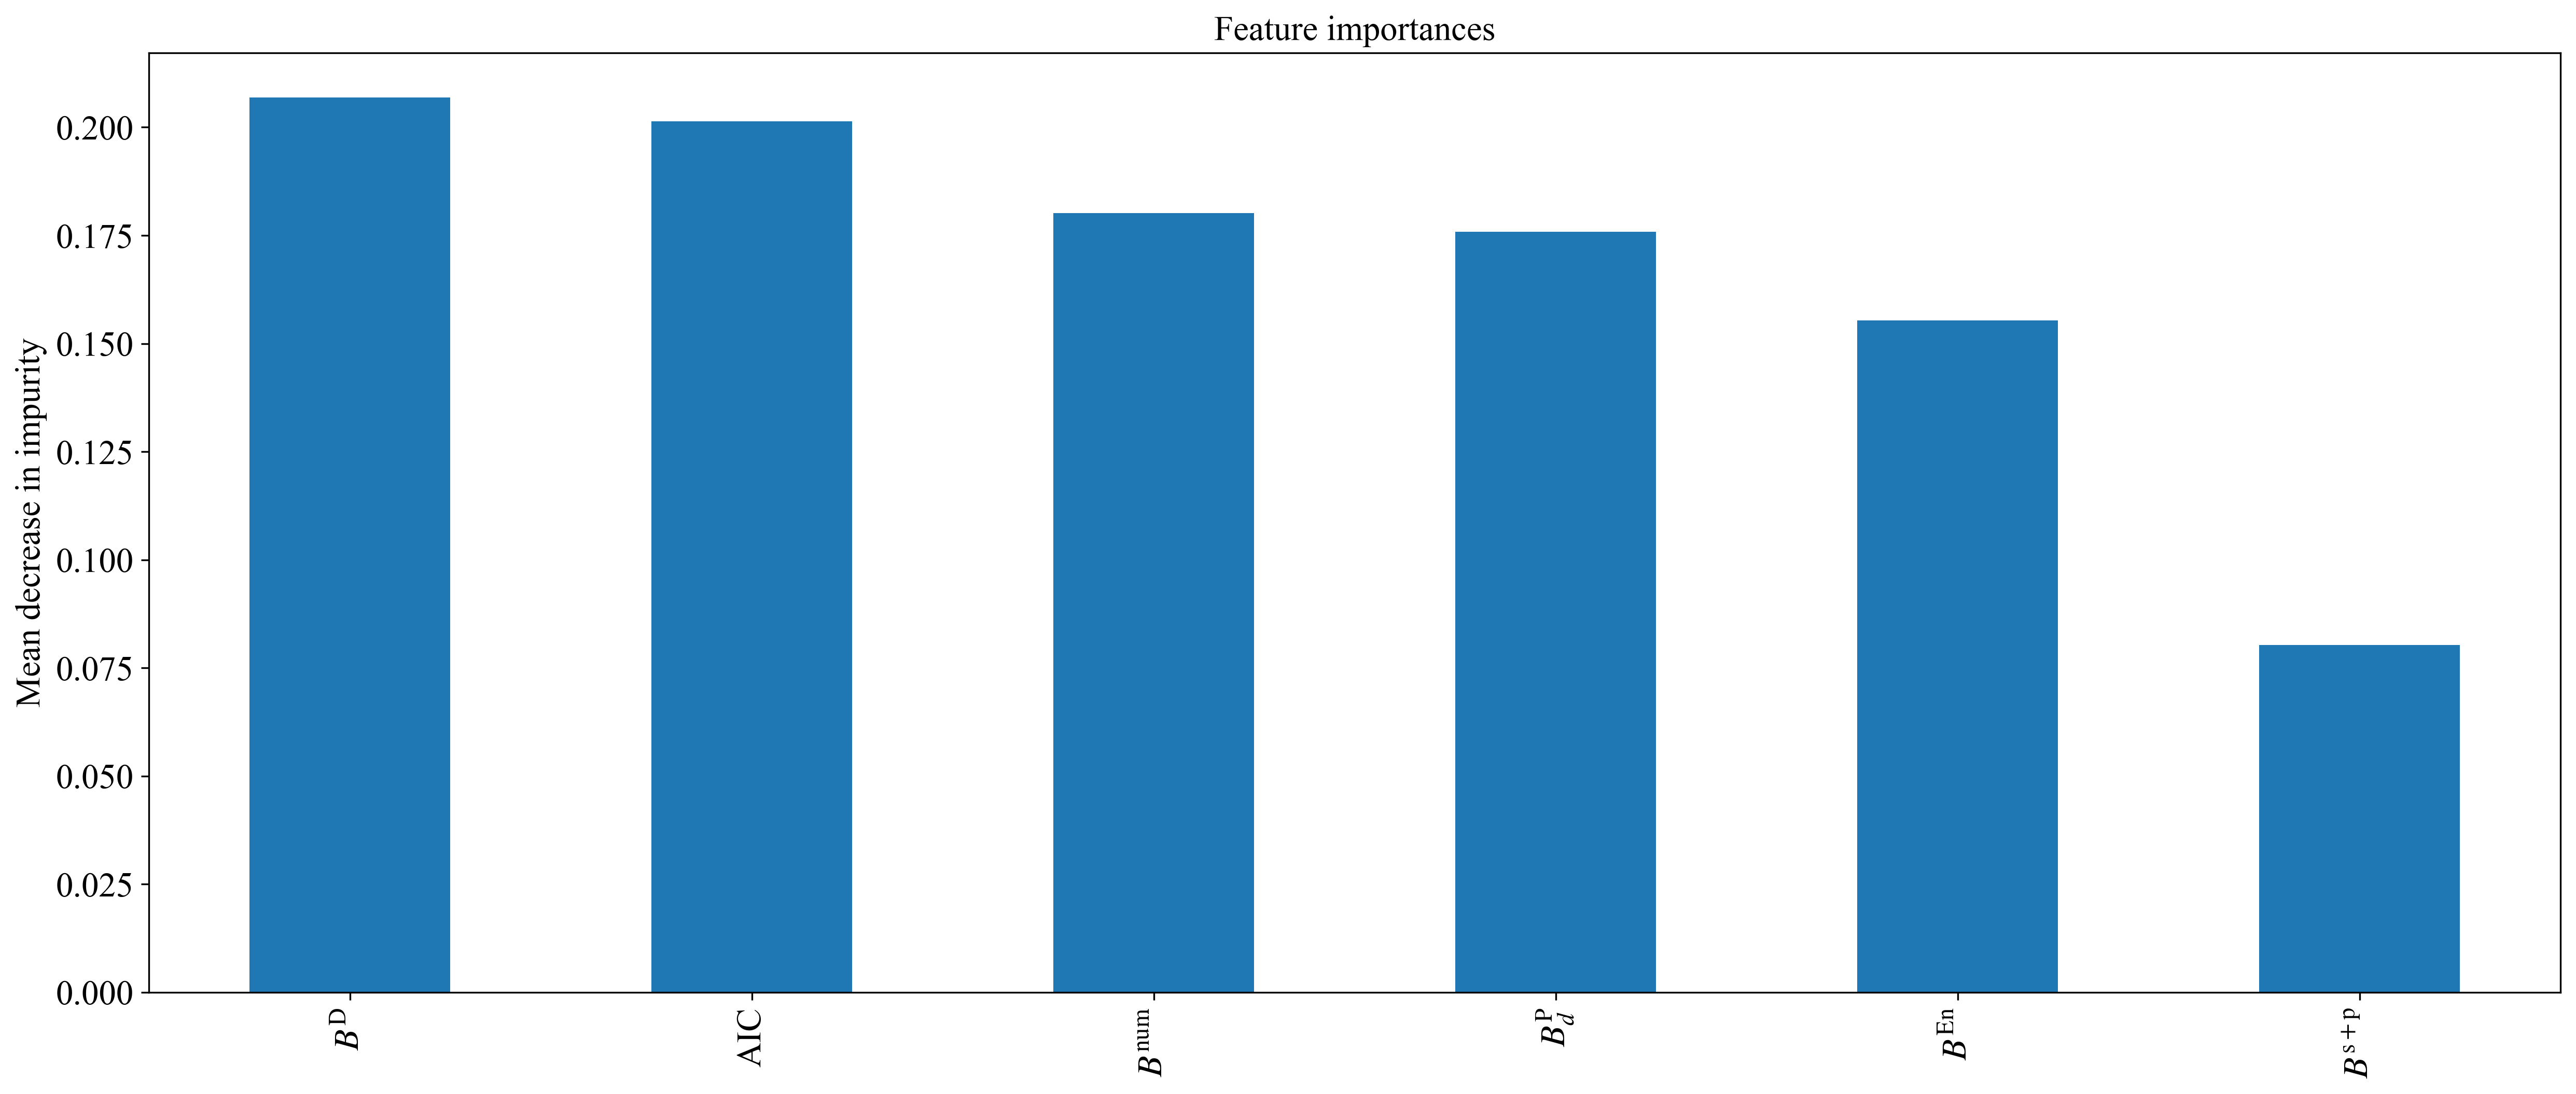

In [223]:
importances = blackbox_model.feature_importances_
# visualization
feat_with_importance = pd.Series(importances, X_train.columns)
feat_with_importance = feat_with_importance.sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(20,8))
feat_with_importance.plot.bar(ax=ax )
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
plt.savefig('./figures/6_feature_importances.png')
plt.show()

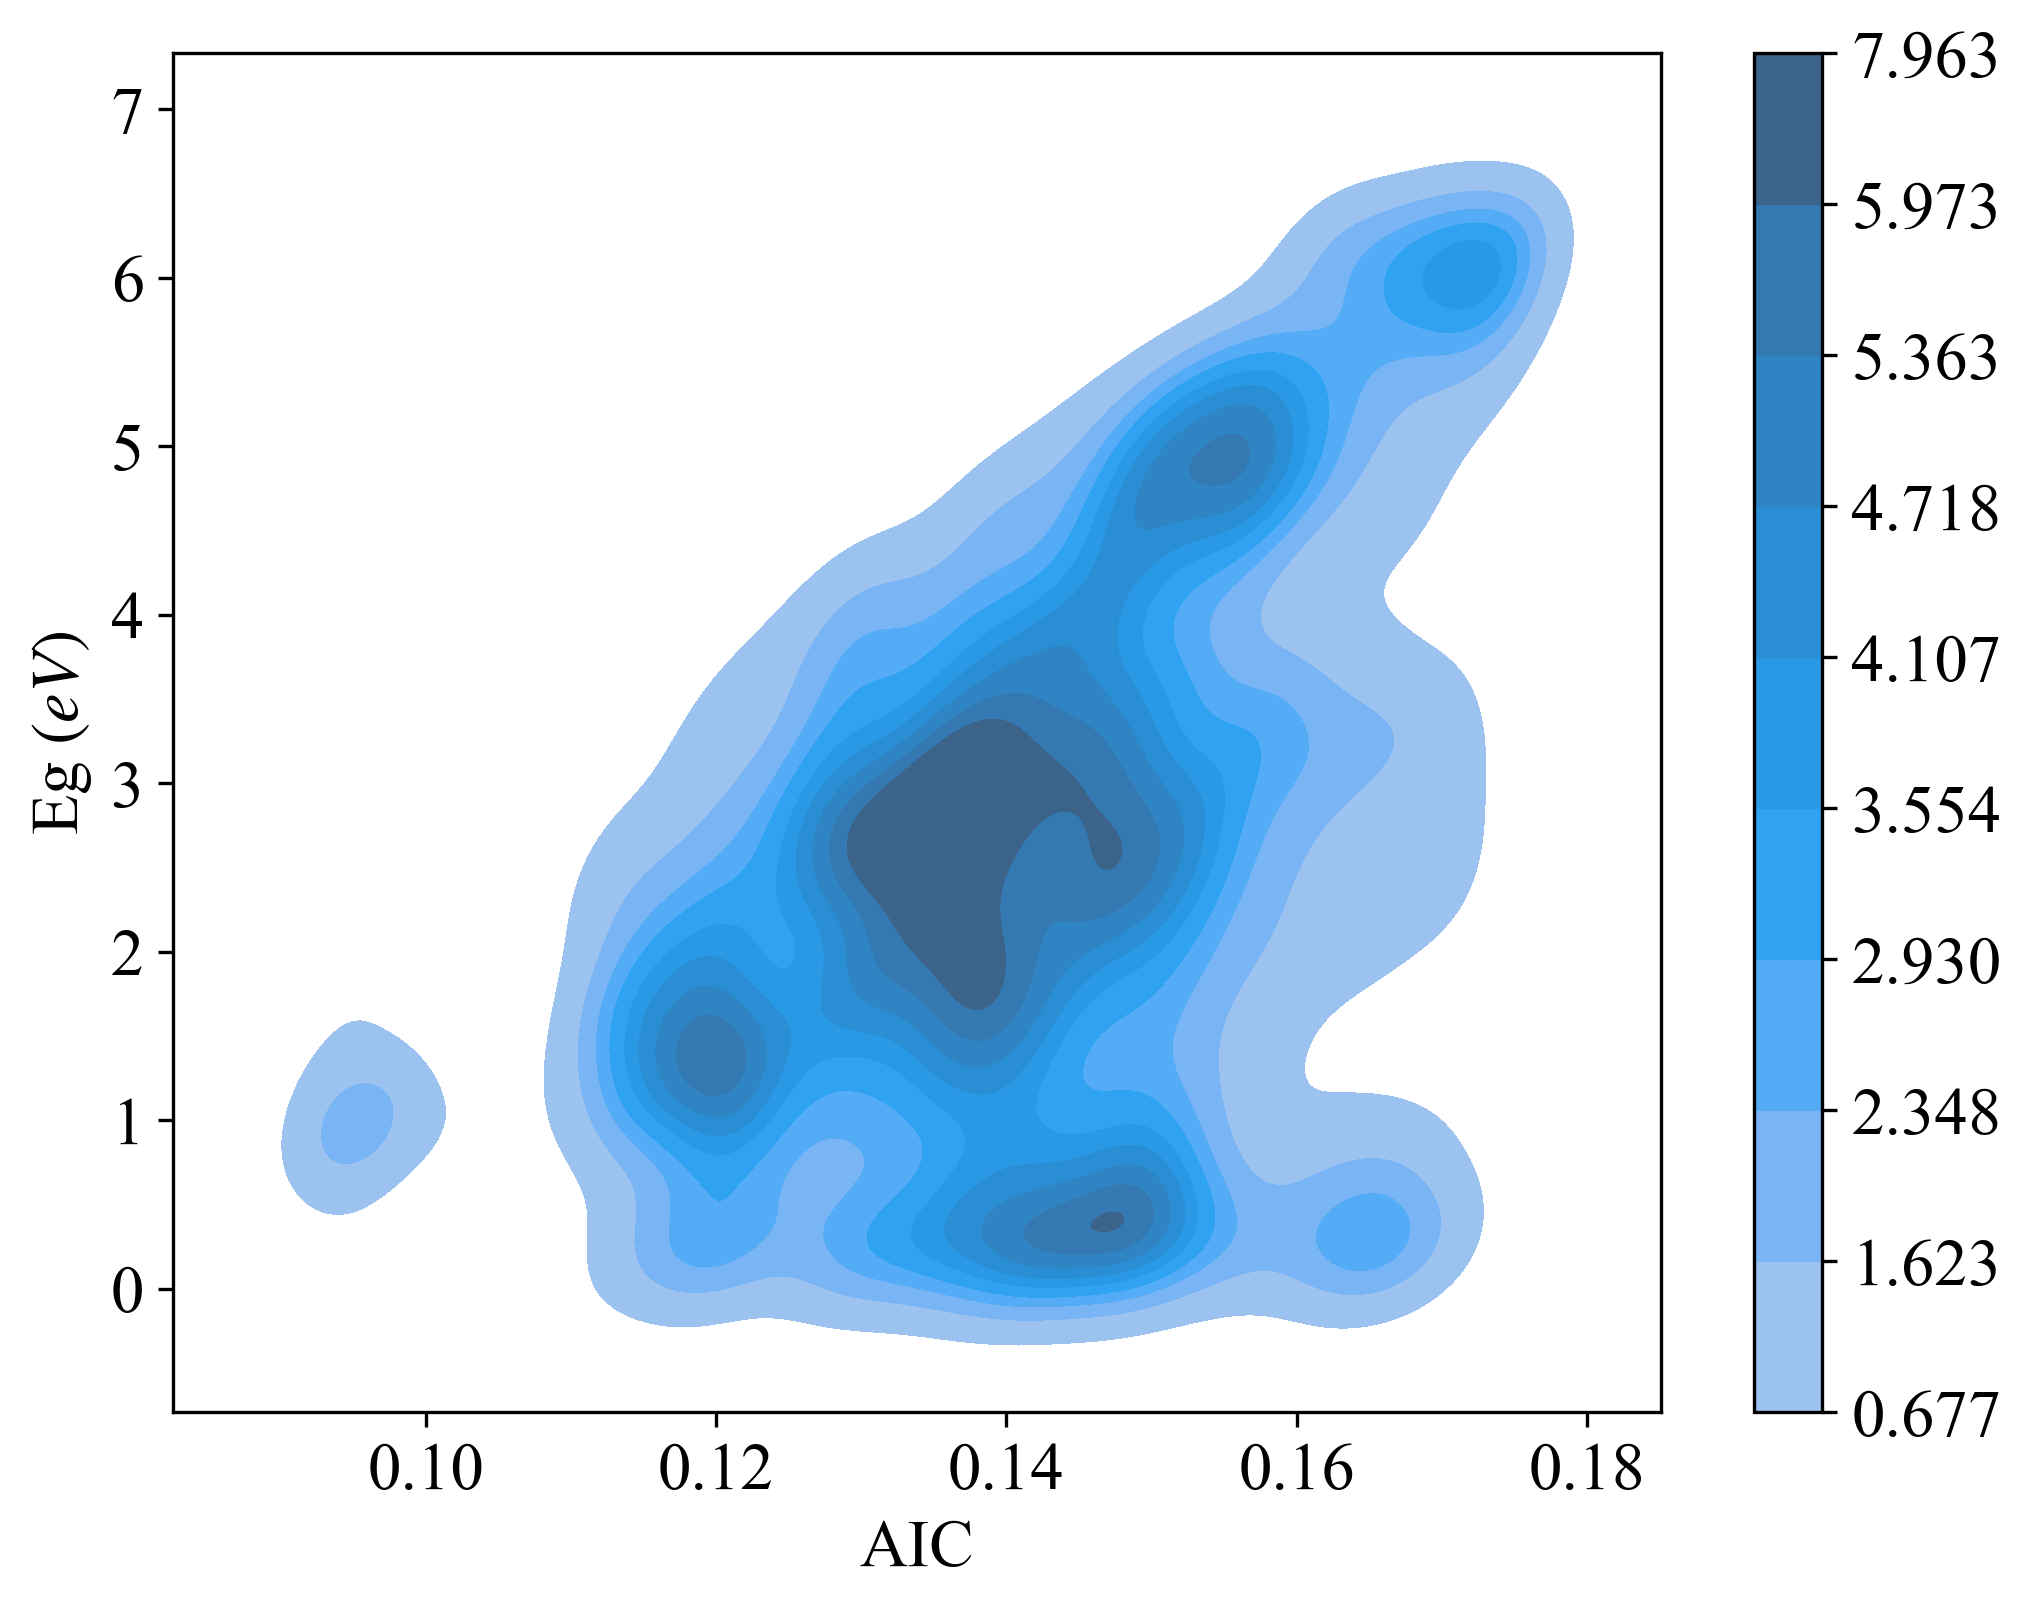

In [236]:
x=X_train[to_plot.index[1]]
sns.kdeplot(x=x, y=y_train, fill=True, cbar=True)
plt.ylabel('Eg '+r'$(eV)$')
plt.savefig('./figures/a_feature_AIC.png')

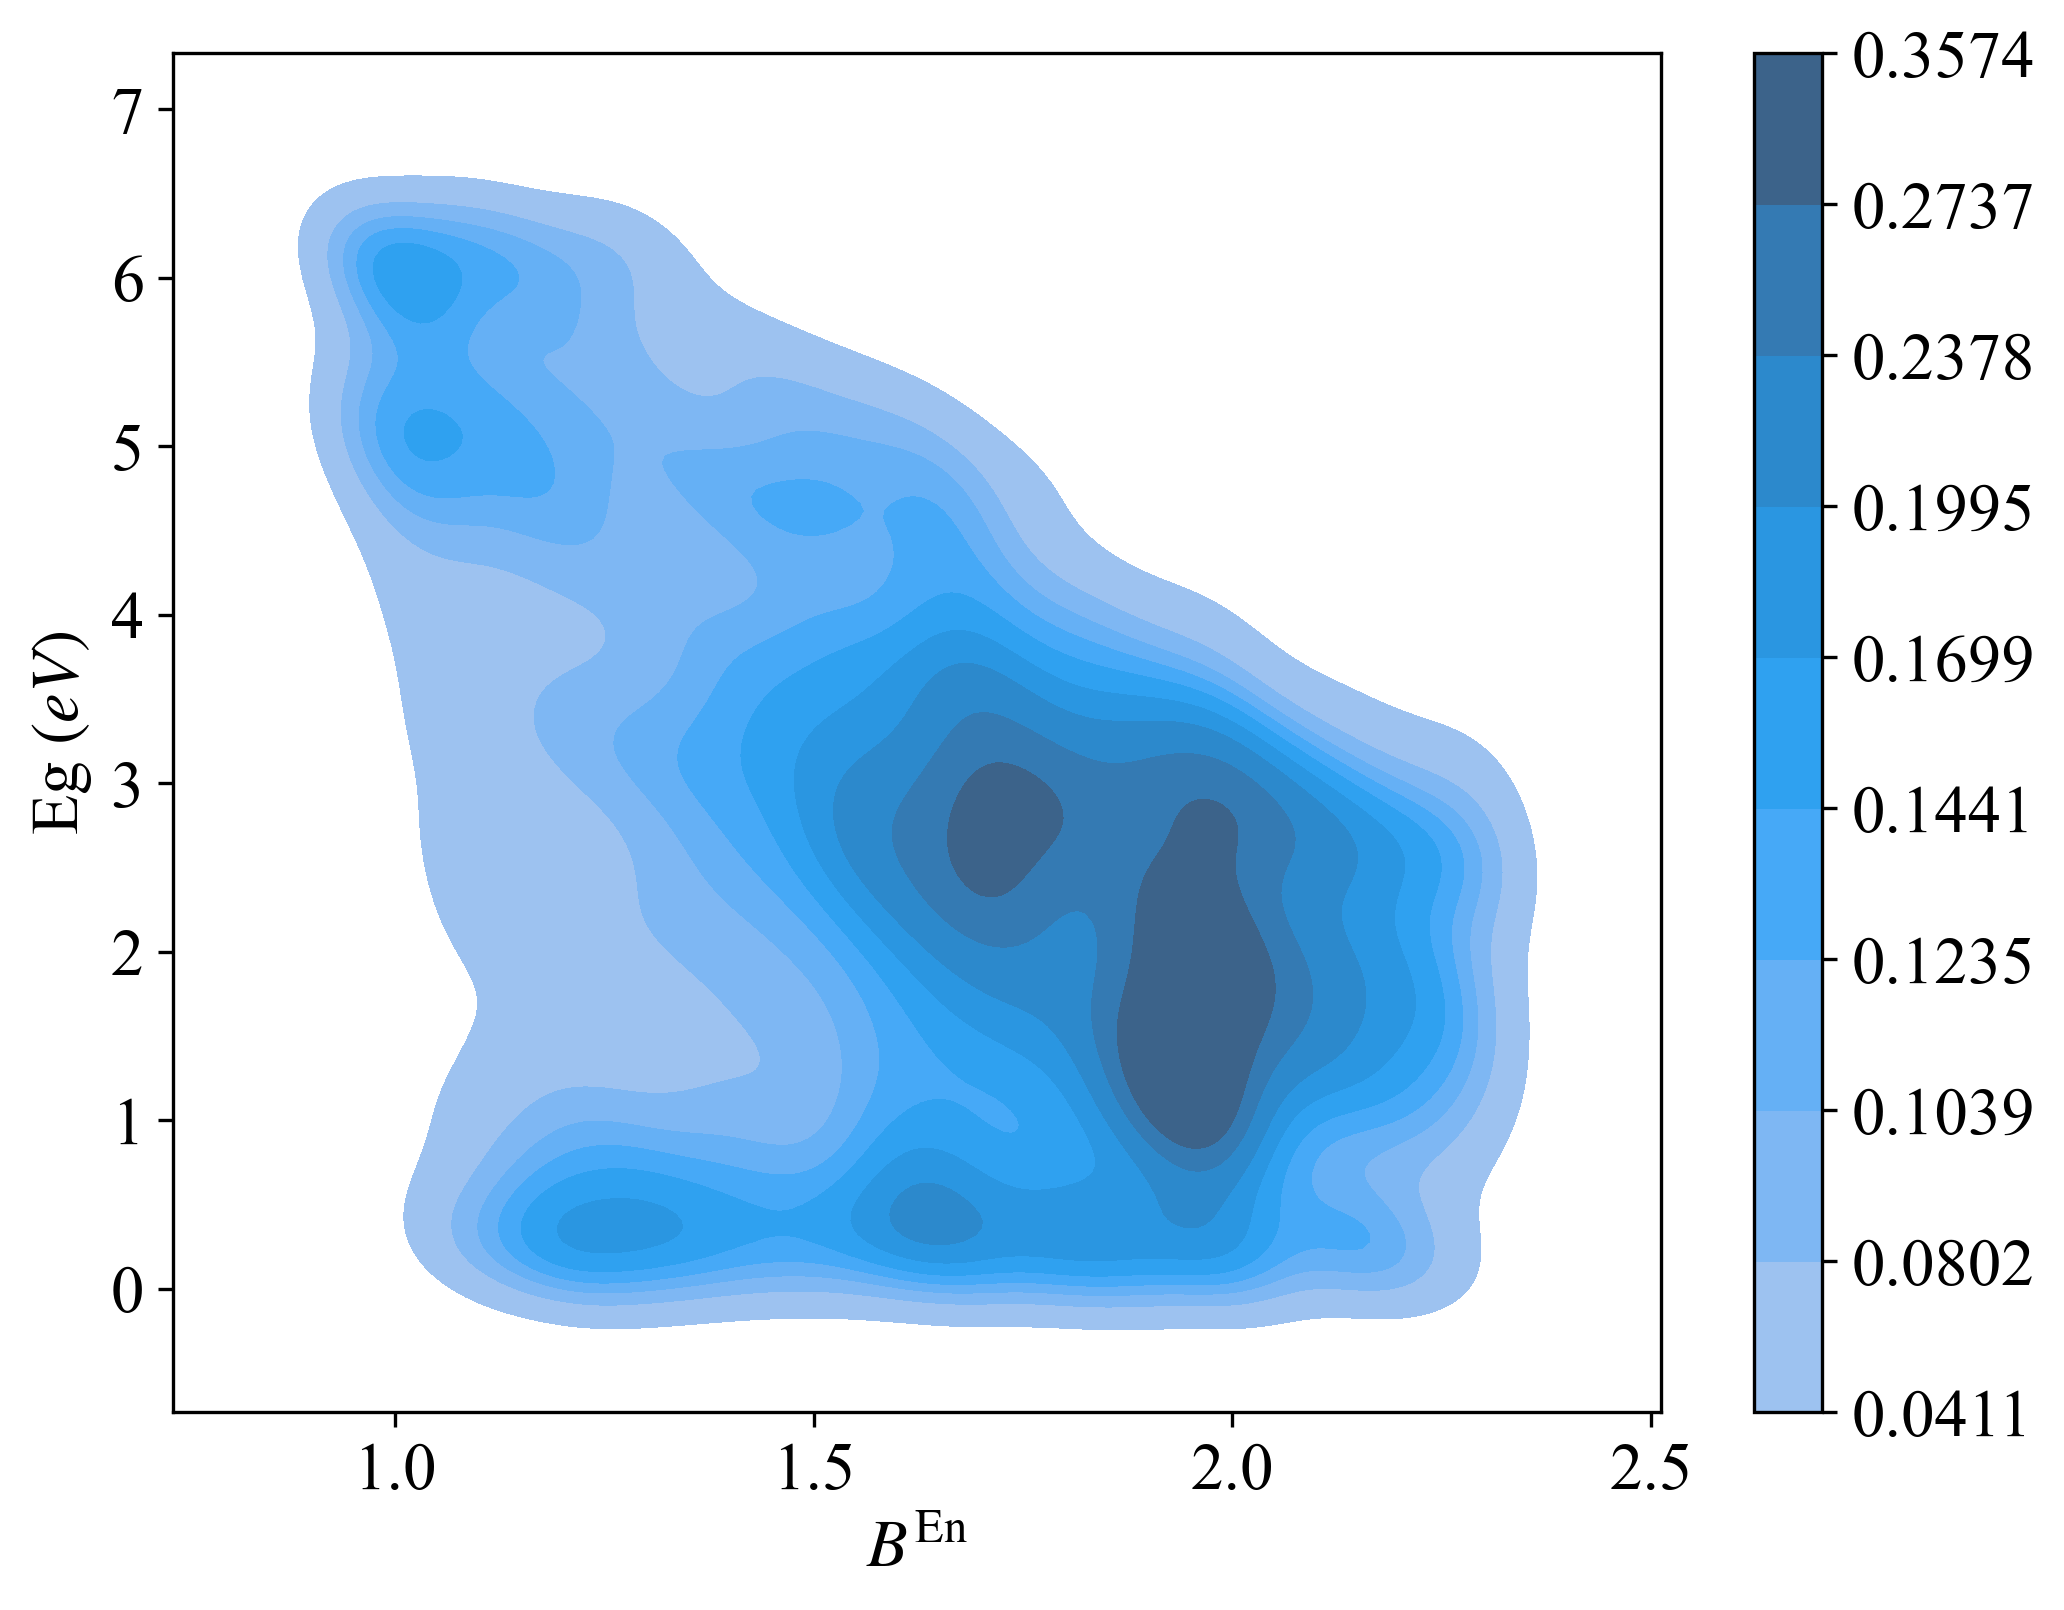

In [237]:
x=X_train[to_plot.index[2]]
sns.kdeplot(x=x, y=y_train, fill=True, cbar=True)
plt.ylabel('Eg '+r'$(eV)$')
plt.savefig('./figures/b_feature_Ben.png')

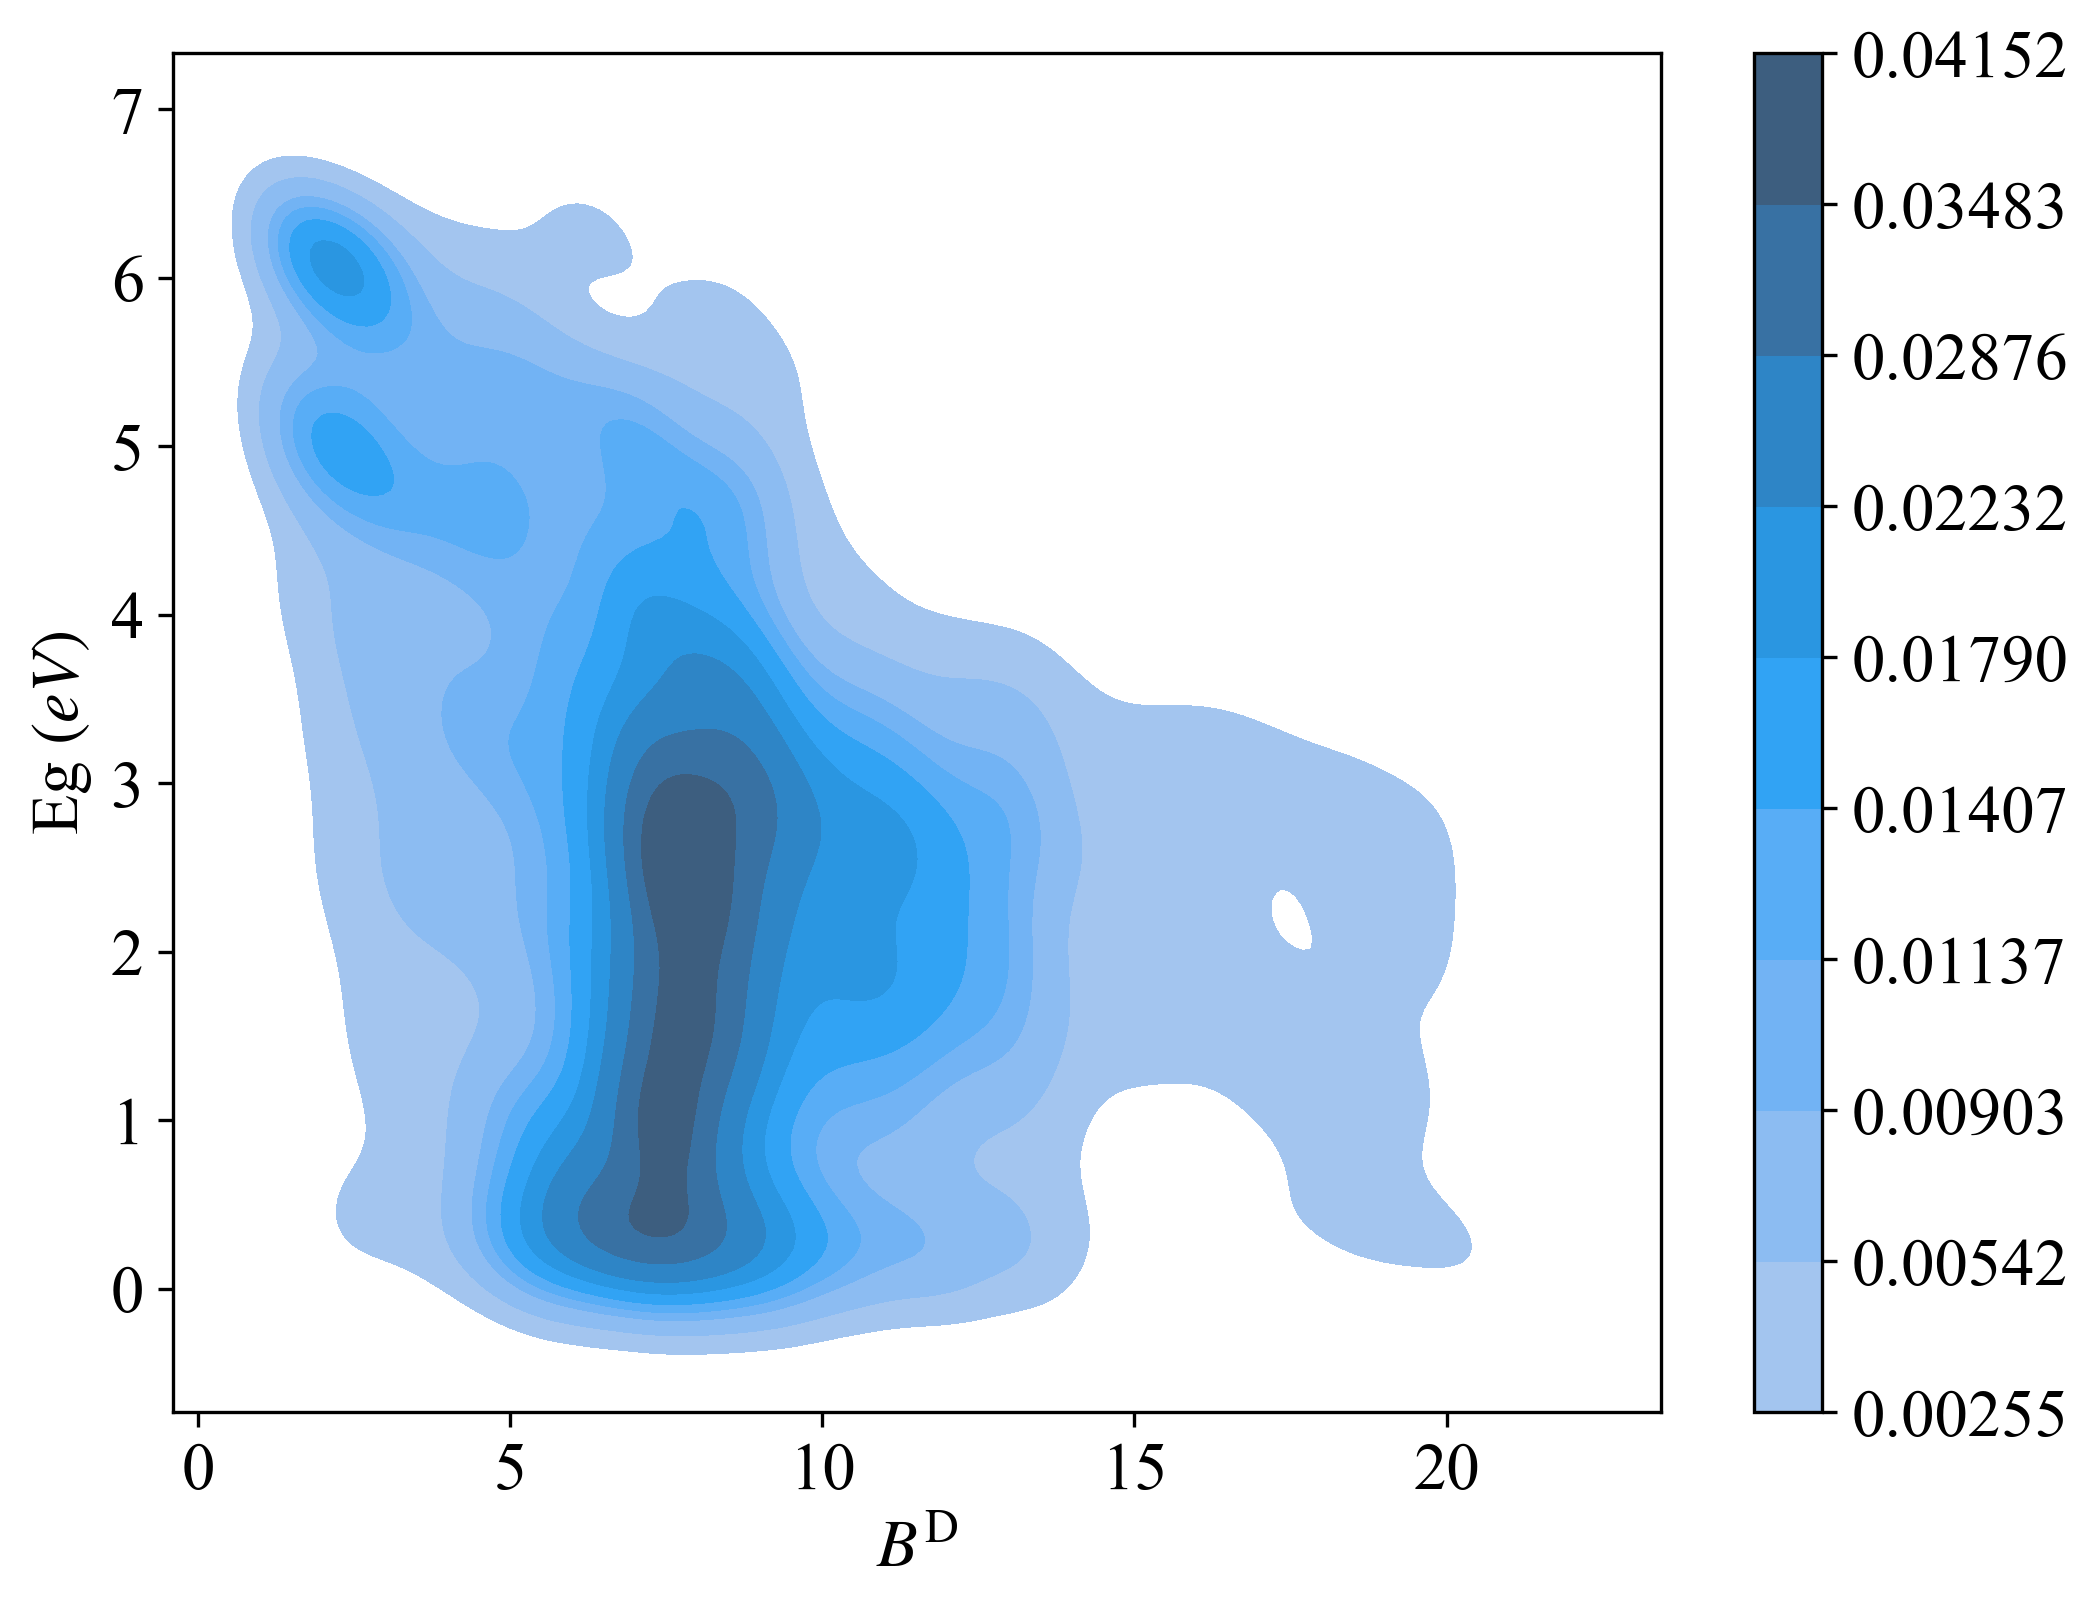

In [238]:
x=X_train[to_plot.index[3]]
sns.kdeplot(x=x, y=y_train, fill=True, cbar=True)
plt.ylabel('Eg '+r'$(eV)$')
plt.savefig('./figures/c_feature_Bd.png')

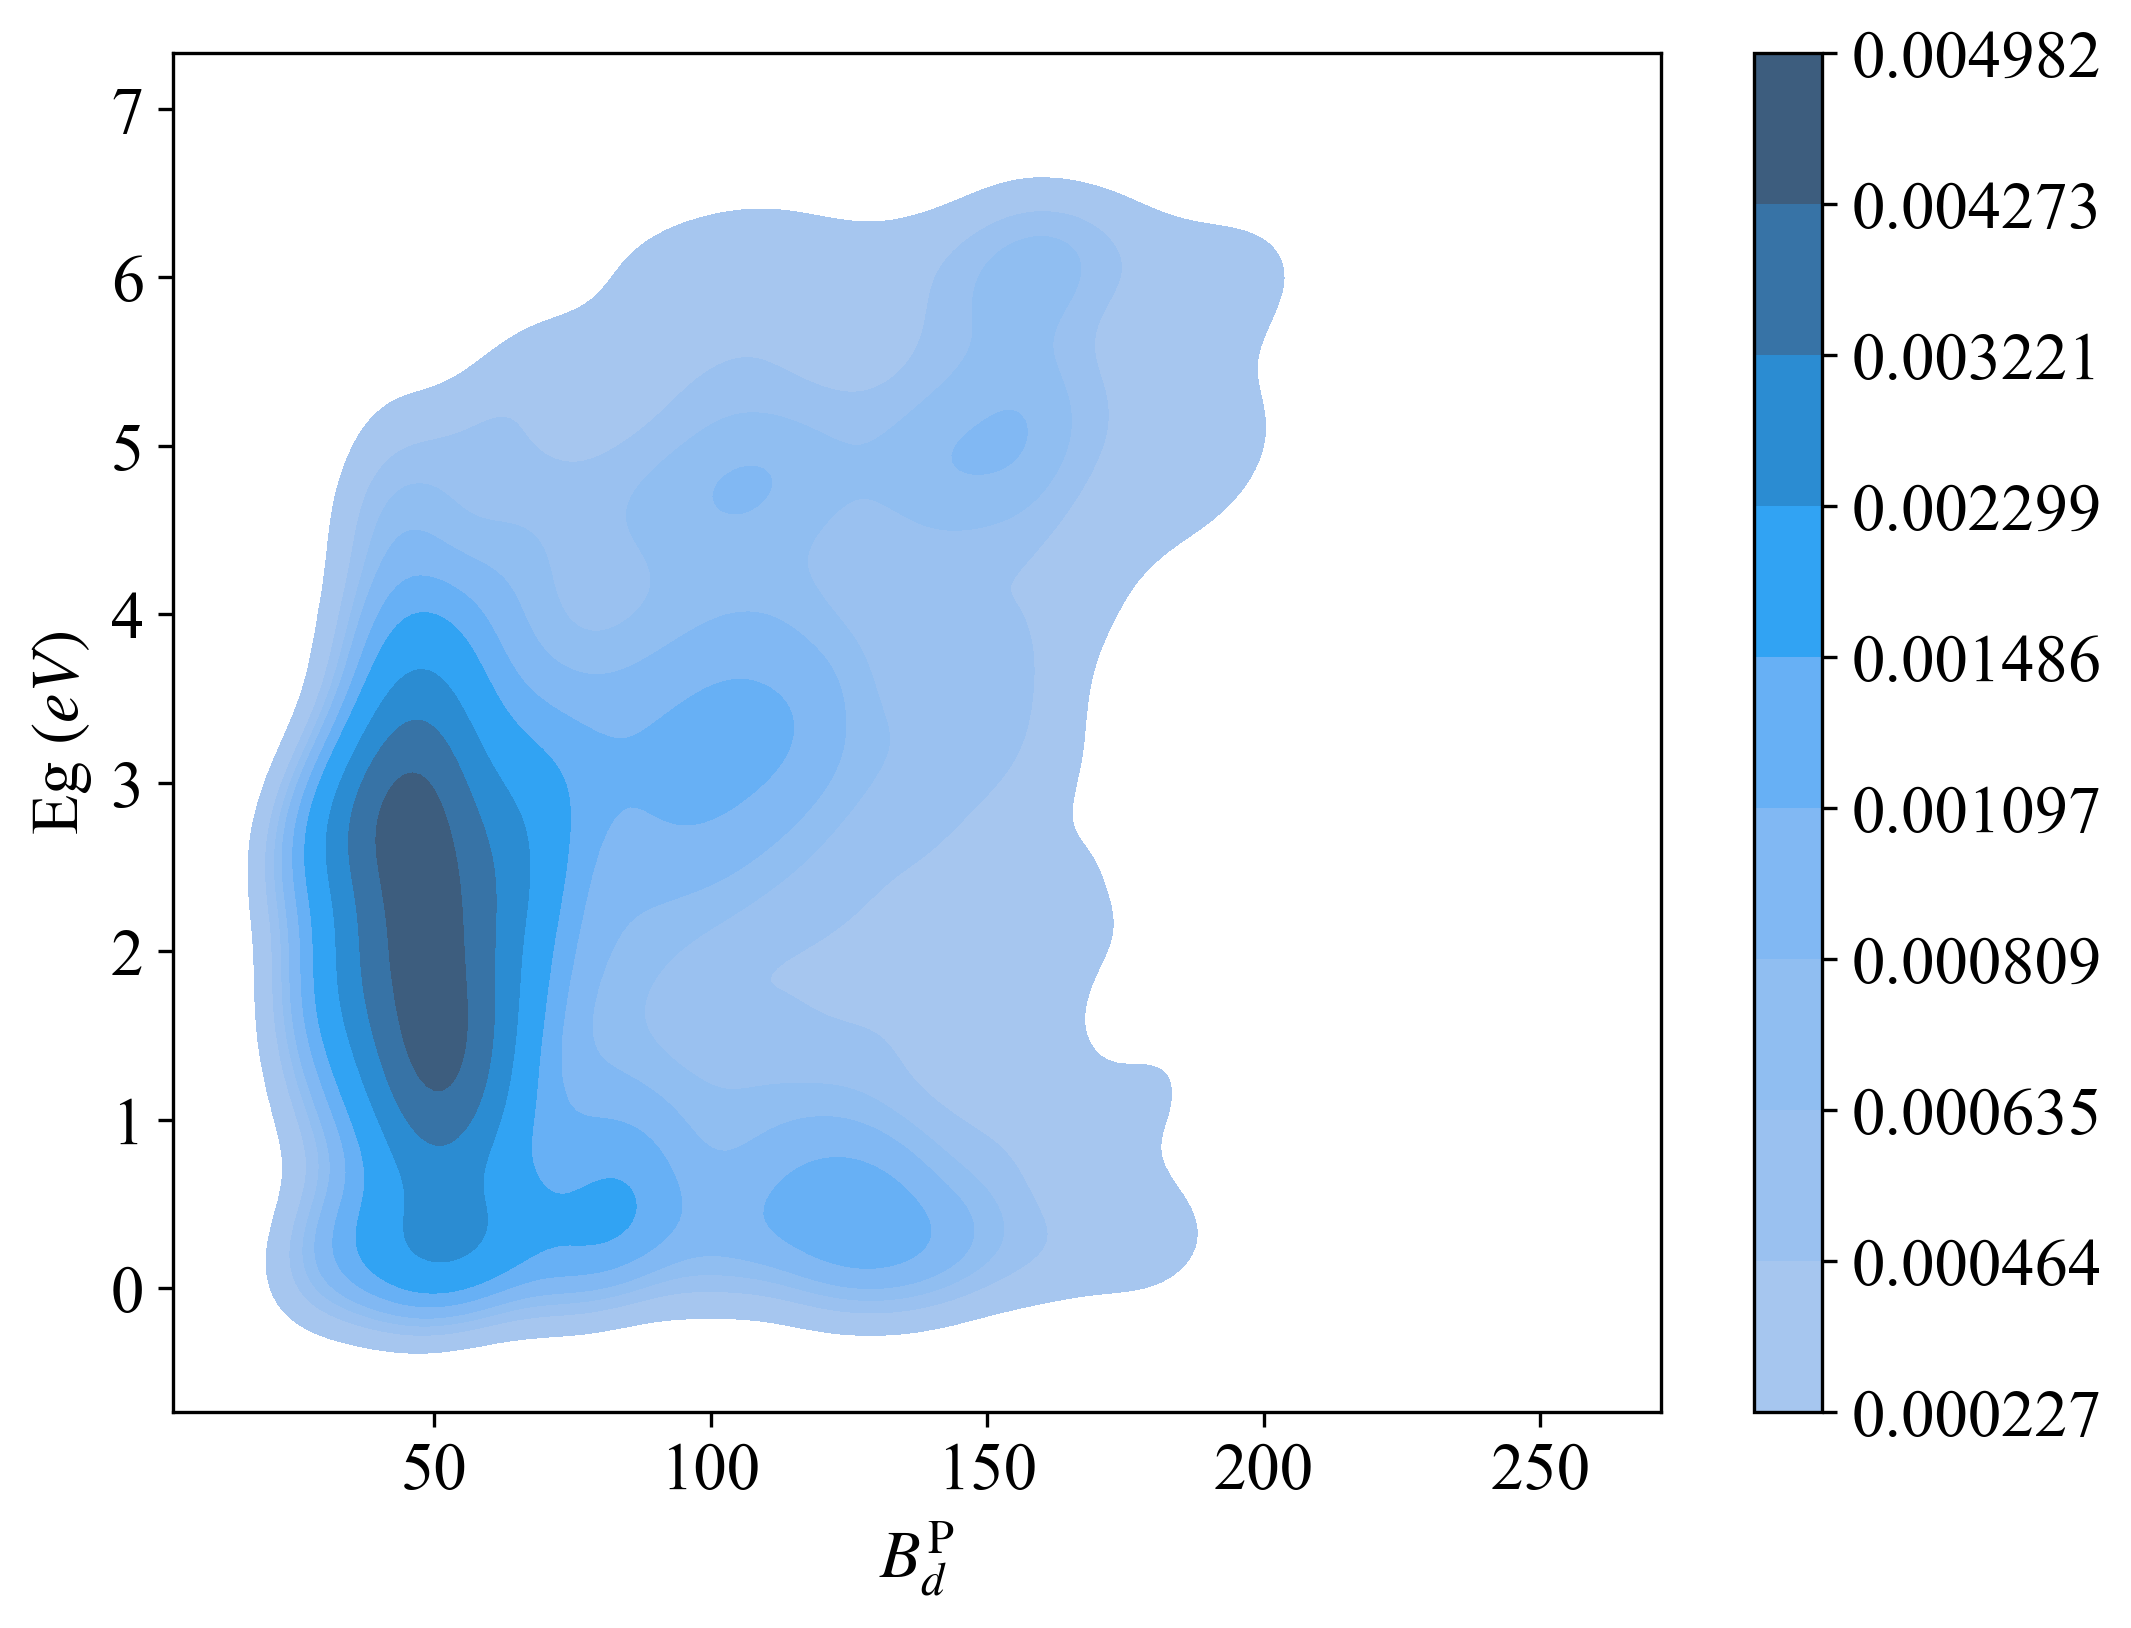

In [239]:
x=X_train[to_plot.index[4]]
sns.kdeplot(x=x, y=y_train, fill=True, cbar=True)
plt.ylabel('Eg '+r'$(eV)$')
plt.savefig('./figures/d_feature_Bdp.png')

In [228]:
import shap
explainer = shap.TreeExplainer(blackbox_model)
test = X_test.sample(2000)

In [234]:
shap_values = explainer.shap_values(test)

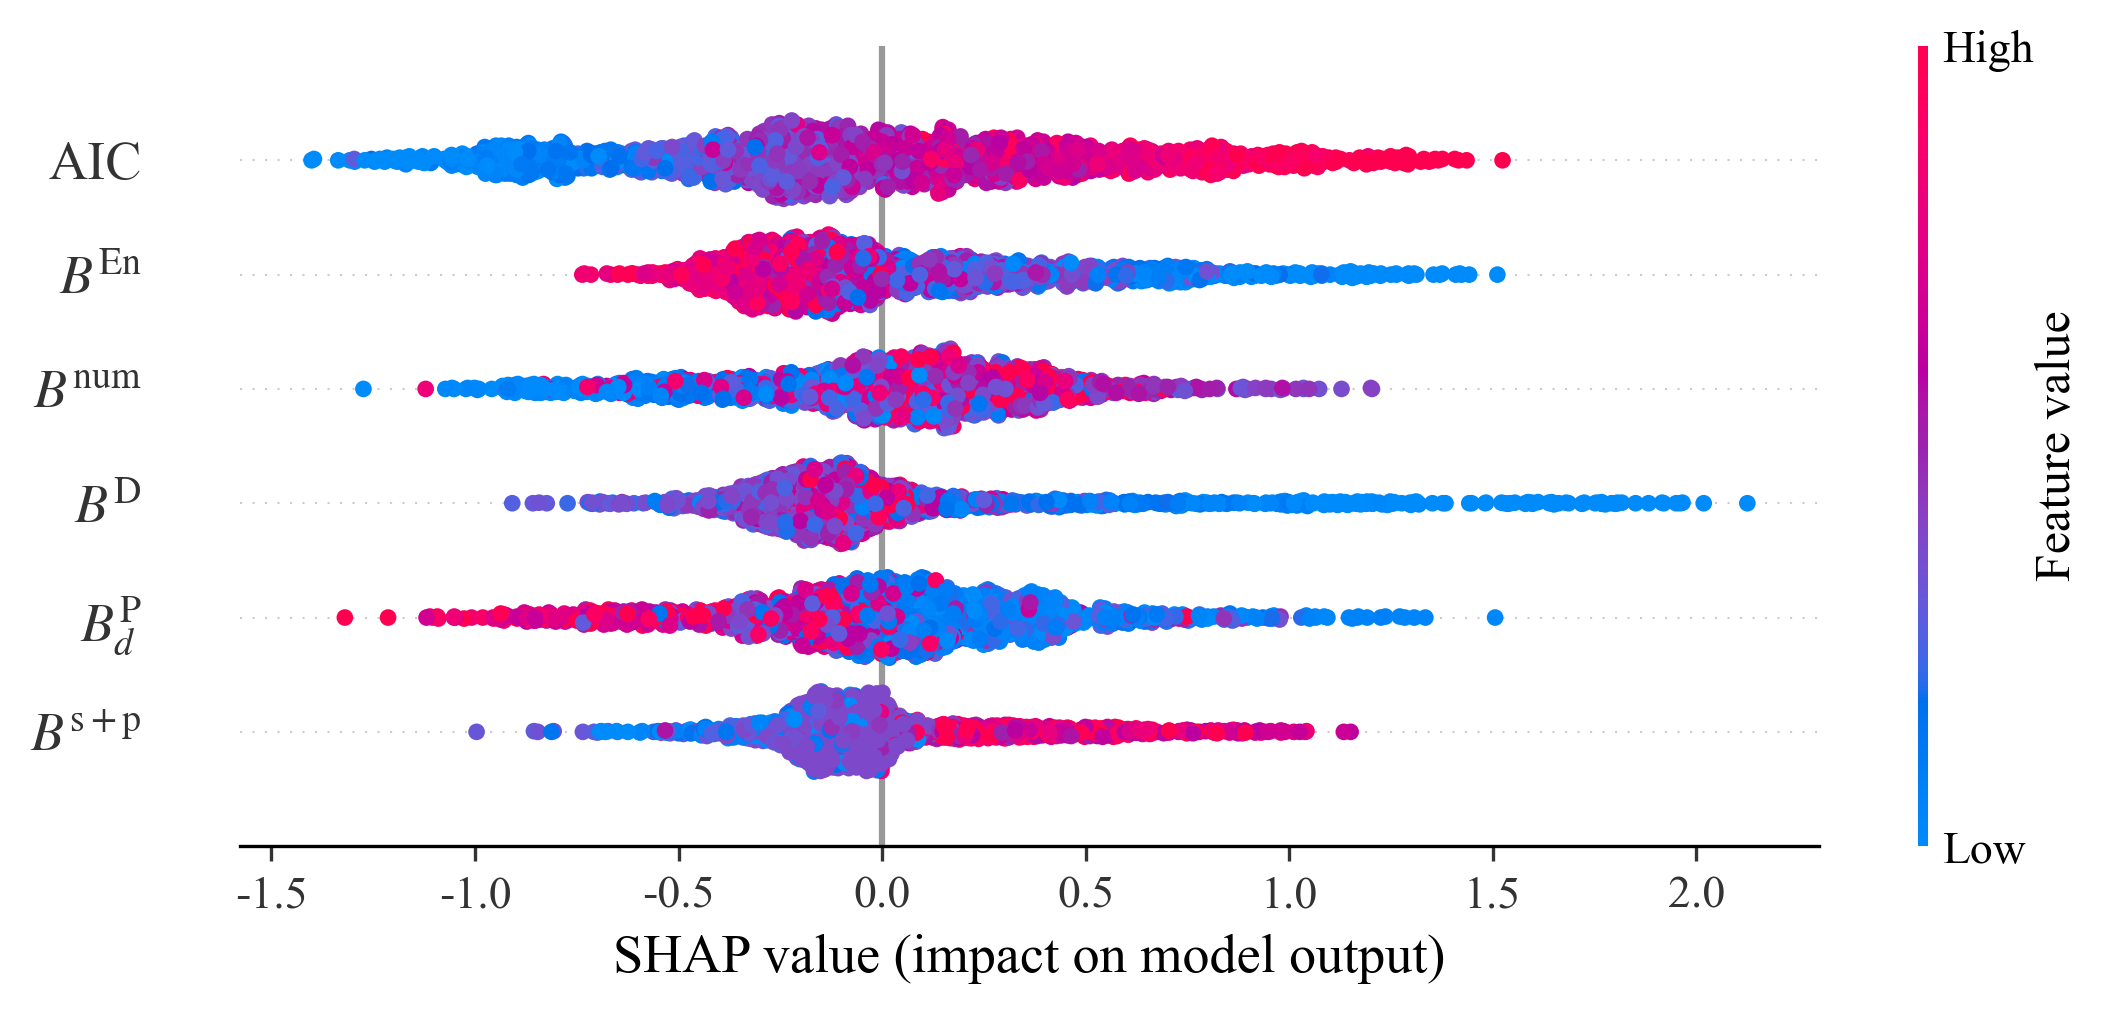

In [235]:
shap.summary_plot(shap_values = shap_values, features=test)